Projet de Machine Learning : expliquer le prix de l'électricité

Romain Foucher
Matthieu Evuort
Julie Chen


Introduction :

Le machine learning est une technique informatique qui permet à une machine d'apprendre à partir de données, sans qu'un programme spécifique lui soit directement programmé. Le principe est de fournir à l'algorithme un grand nombre d'exemples pour qu'il apprenne à identifier des modèles et à prendre des décisions à partir de ces modèles. Le machine learning est utilisé dans de nombreux domaines, tels que la reconnaissance de formes, la classification de données, la détection de fraudes, la recommandation de produits, la traduction de langues, la reconnaissance vocale ou encore la conduite autonome.

Ce projet consiste à expliquer le prix de l'électricité en France et en Allemagne selon une multitude de facteurs. On peut citer le climat, le réchauffement climatique, les événements géopolitiques... De plus, chaque pays s’appuie sur un mix  énergétique qui lui est propre (nucléaire, solaire, hydrolique, gaz, charbon, etc).

 Pour cela, nous allons utiliser plusieurs méthodes afin de préparer nos données, de les analyser et de les modéliser grâce aux cours et aux TP que nous avons pu effectuer en cours, mais ainsi qu'à la documentation d'internet.

Sommaire :

A) Préparation des données
B) Analyse exploratoire des données
C) Modélisation des données
D) Evaluation des modèles


A) Préparation des données

Afin de préparer nos données, nous allons remplir les cases vides par la médiane de la colonne. La médiane est une mesure de tendance centrale qui représente la valeur au milieu de l'ensemble de données trié. Contrairement à la moyenne, qui peut être sensible aux valeurs aberrantes, la médiane est une mesure qui est moins sensible aux valeurs extrêmes. Cela permet la distribution des valeurs de la colonne et minimiser les effets des valeurs aberrantes. En effet, si nous supprimons les lignes ou les colonnes, nous perdrons des informations et nous réduisons la taille de l'échantillon. Cependant, nous n'allons pas supprimer ou remplacer les données "0.0" car elles sont utiles. En effet, il est possible que la variation du prix du charbon ou du gaz d'un pays ne change pas d'une journée à l'autre.

In [31]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
data_x = pd.read_csv('Data_X.csv')
data_y = pd.read_csv('Data_Y.csv')
data_new_x = pd.read_csv('DataNew_X.csv')

# remplacement des valeurs null par la moyenne de la colonne
for col in data_x.columns[data_x.isnull().any()]:
    data_x[col].fillna(data_x[col].median(), inplace=True)
print(data_x)

        ID  DAY_ID COUNTRY  DE_CONSUMPTION  FR_CONSUMPTION  DE_FR_EXCHANGE   
0     1054     206      FR        0.210099       -0.427458       -0.606523  \
1     2049     501      FR       -0.022399       -1.003452       -0.022063   
2     1924     687      FR        1.395035        1.978665        1.021305   
3      297     720      DE       -0.983324       -0.849198       -0.839586   
4     1101     818      FR        0.143807       -0.617038       -0.924990   
...    ...     ...     ...             ...             ...             ...   
1489   459     809      DE        1.529204        1.106682       -1.855327   
1490  1674     887      FR        1.618582        1.752840        0.611392   
1491   748    1083      DE        0.856399        0.489199       -0.255778   
1492  1454    1133      FR        0.560689       -0.343777       -0.830239   
1493   359    1118      DE        0.226730       -0.711005        0.873016   

      FR_DE_EXCHANGE  DE_NET_EXPORT  FR_NET_EXPORT  DE_NET_IMPO

Ensuite, nous fusionnons data_x et data_y pour comparer nos valeurs d'entrées avec nos valeurs de sorties en joignant sur l'ID. Puis, nous trions sur DAY_ID et COUNTRY pour une meilleure lisibilité.

In [32]:
# fusion de data_x et data_y
merged_X_Y = pd.merge(data_x, data_y, on='ID', how='inner')

# triage des données
merged_X_Y = merged_X_Y.sort_values(by=['DAY_ID', 'COUNTRY'])
print(merged_X_Y)

        ID  DAY_ID COUNTRY  DE_CONSUMPTION  FR_CONSUMPTION  DE_FR_EXCHANGE   
742   1057       0      FR        0.048418       -0.465067       -0.079296  \
1211  1179       1      FR        0.966997        1.222131        0.331356   
1468   111       2      DE       -0.068972       -0.667390       -1.102015   
1408  1327       2      FR       -0.068972       -0.667390       -1.102015   
680    800       3      DE       -0.134670       -0.834564       -1.051716   
...    ...     ...     ...             ...             ...             ...   
986    771    1212      DE       -0.046100       -0.520506       -0.270515   
1007  1987    1212      FR       -0.046100       -0.520506       -0.270515   
1465   472    1213      DE        1.407027        1.313254       -0.456126   
873   1688    1213      FR        1.407027        1.313254       -0.456126   
1437  1049    1215      FR        0.544810       -0.378158       -0.065993   

      FR_DE_EXCHANGE  DE_NET_EXPORT  FR_NET_EXPORT  DE_NET_IMPO

Puisque nous étudions la France et l'Allemagne, nous créons deux datas : data_FR et data_DE et nous ajoutons leurs colonnes respectives sans oublier de mettre TARGET qui est notre variable cible.

In [33]:
# création de deux datas pour la France et l'Allemagne
data_FR = merged_X_Y.loc[merged_X_Y['COUNTRY'] == 'FR']
data_DE = merged_X_Y.loc[merged_X_Y['COUNTRY'] == 'DE']

# triage des deux datas avec leurs valeurs correspondantes
data_FR = data_FR.filter(regex='FR|GAS_RET|COAL_RET|TARGET', axis=1)
print(data_FR)

data_DE = data_DE.filter(regex='DE|GAS_RET|COAL_RET|TARGET', axis=1)
print(data_DE)


      FR_CONSUMPTION  DE_FR_EXCHANGE  FR_DE_EXCHANGE  FR_NET_EXPORT   
742        -0.465067       -0.079296        0.079296       0.650577  \
1211        1.222131        0.331356       -0.331356       0.778627   
1408       -0.667390       -1.102015        1.102015       0.256736   
329        -0.834564       -1.051716        1.051716      -0.612133   
512        -0.470371        0.144615       -0.144615      -1.811403   
...              ...             ...             ...            ...   
479        -0.709011        0.427976       -0.427976      -1.678101   
1451        1.301061        1.565552       -1.565552       0.099455   
1007       -0.520506       -0.270515        0.270515      -0.789824   
873         1.313254       -0.456126        0.456126      -0.069222   
1437       -0.378158       -0.065993        0.065993       0.257829   

      FR_NET_IMPORT    FR_GAS   FR_COAL  FR_HYDRO  FR_NUCLEAR  FR_SOLAR   
742       -0.650577 -0.261565  0.095197  0.677089   -0.357168  1.185155 

Les valeurs des différents attributs sont comparables, car ce sont toutes des variations dans le temps. Nous n'avons pas besoin de normaliser les données.

B) Analyse exploratoire des données

Afin de faire un aperçu des données, nous utilisons plusieurs fonctions :


In [34]:
# affiche le type de chaque colonne et si elles sont nulles ou non
data_FR.info()
data_DE.info()

# affiche la distribution, la plage de valeurs et la signification de chaque colonne
data_FR.describe()
data_DE.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 851 entries, 742 to 1437
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   FR_CONSUMPTION    851 non-null    float64
 1   DE_FR_EXCHANGE    851 non-null    float64
 2   FR_DE_EXCHANGE    851 non-null    float64
 3   FR_NET_EXPORT     851 non-null    float64
 4   FR_NET_IMPORT     851 non-null    float64
 5   FR_GAS            851 non-null    float64
 6   FR_COAL           851 non-null    float64
 7   FR_HYDRO          851 non-null    float64
 8   FR_NUCLEAR        851 non-null    float64
 9   FR_SOLAR          851 non-null    float64
 10  FR_WINDPOW        851 non-null    float64
 11  FR_RESIDUAL_LOAD  851 non-null    float64
 12  FR_RAIN           851 non-null    float64
 13  FR_WIND           851 non-null    float64
 14  FR_TEMP           851 non-null    float64
 15  GAS_RET           851 non-null    float64
 16  COAL_RET          851 non-null    float64
 17 

DE_CONSUMPTION  DE_FR_EXCHANGE  FR_DE_EXCHANGE  DE_NET_EXPORT   
count      643.000000      643.000000      643.000000     643.000000  \
mean         0.379809       -0.172616        0.172616      -0.327798   
std          0.682092        0.988550        0.988550       0.930585   
min         -2.265563       -2.856874       -2.634831      -2.464849   
25%         -0.069473       -0.979886       -0.640639      -1.026464   
50%          0.288112       -0.172069        0.172069      -0.404441   
75%          0.895751        0.640639        0.979886       0.365121   
max          2.033851        2.634831        2.856874       2.279619   

       DE_NET_IMPORT      DE_GAS     DE_COAL    DE_HYDRO  DE_NUCLEAR   
count     643.000000  643.000000  643.000000  643.000000  643.000000  \
mean        0.327798    0.814385   -0.255720    0.606018   -0.601507   
std         0.930585    0.848854    0.773450    1.083933    0.882778   
min        -2.279619   -1.004008   -1.491593   -1.373985   -2.689387   
25%        -0.365121    0.166714   -0.907156   -0.227007   -1.339070   
50%         0.404441    0.809862   -0.325659    0.402352   -0.343602   
75%         1.026464    1.445299    0.283322    1.342489    0.070503   
max         2.464849    3.118082    1.902490    4.181936    0.842046   

         DE_SOLAR  DE_WINDPOW  DE_LIGNITE  DE_RESIDUAL_LOAD     DE_RAIN   
count  643.000000  643.000000  643.000000        643.000000  643.000000  \
mean     0.301190    0.154515   -0.448017          0.011554   -0.055495   
std      1.088365    1.070344    0.789194          0.844800    0.969135   
min     -1.442296   -1.235802   -2.879041         -2.613569   -2.128531   
25%     -0.689997   -0.688578   -0.904350         -0.482059   -0.621853   
50%      0.296254   -0.078279   -0.289221          0.071007   -0.274901   
75%      1.224825    0.643680    0.119871          0.575759    0.268913   
max      2.696571    3.509017    1.070902          2.254155    7.756118   

          DE_WIND     DE_TEMP     GAS_RET    COAL_RET      TARGET  
count  643.000000  643.000000  643.000000  643.000000  643.000000  
mean     0.198430    0.003489    0.082186    0.051654    0.148044  
std      1.053595    0.909655    1.105919    1.022188    1.047022  
min     -1.880419   -4.549638   -5.349463   -5.392852   -3.075929  
25%     -0.561814   -0.568777   -0.604950   -0.455707   -0.324693  
50%     -0.228061   -0.026306    0.034673    0.047114    0.005057  
75%      0.741858    0.519411    0.691052    0.634172    0.386596  
max      5.085624    2.858758    5.674778    3.607281    7.138604

info() permet d'afficher le type de chaque colonne et si elles sont nulles ou non.
describe() permet d'afficher la somme de toutes les lignes de chaque colonne avec "count", la moyenne de la colonne avec "mean", l'écart-type de la colonne avec "std", le minimum et le maximum de chaque colonne avec "min" et "max". De plus, nous avons les 25%, les 50% et les 75% premières valeurs de chaque colonne.


Pour examiner la relation entre les variables caractéristiques (chaque colonne) et la variable cible (TARGET) on utilise des techniques graphiques telles que des histogrammes, pour data_DE, on n'oublie pas de prendre en compte la colonne en plus dans nos paramètres :

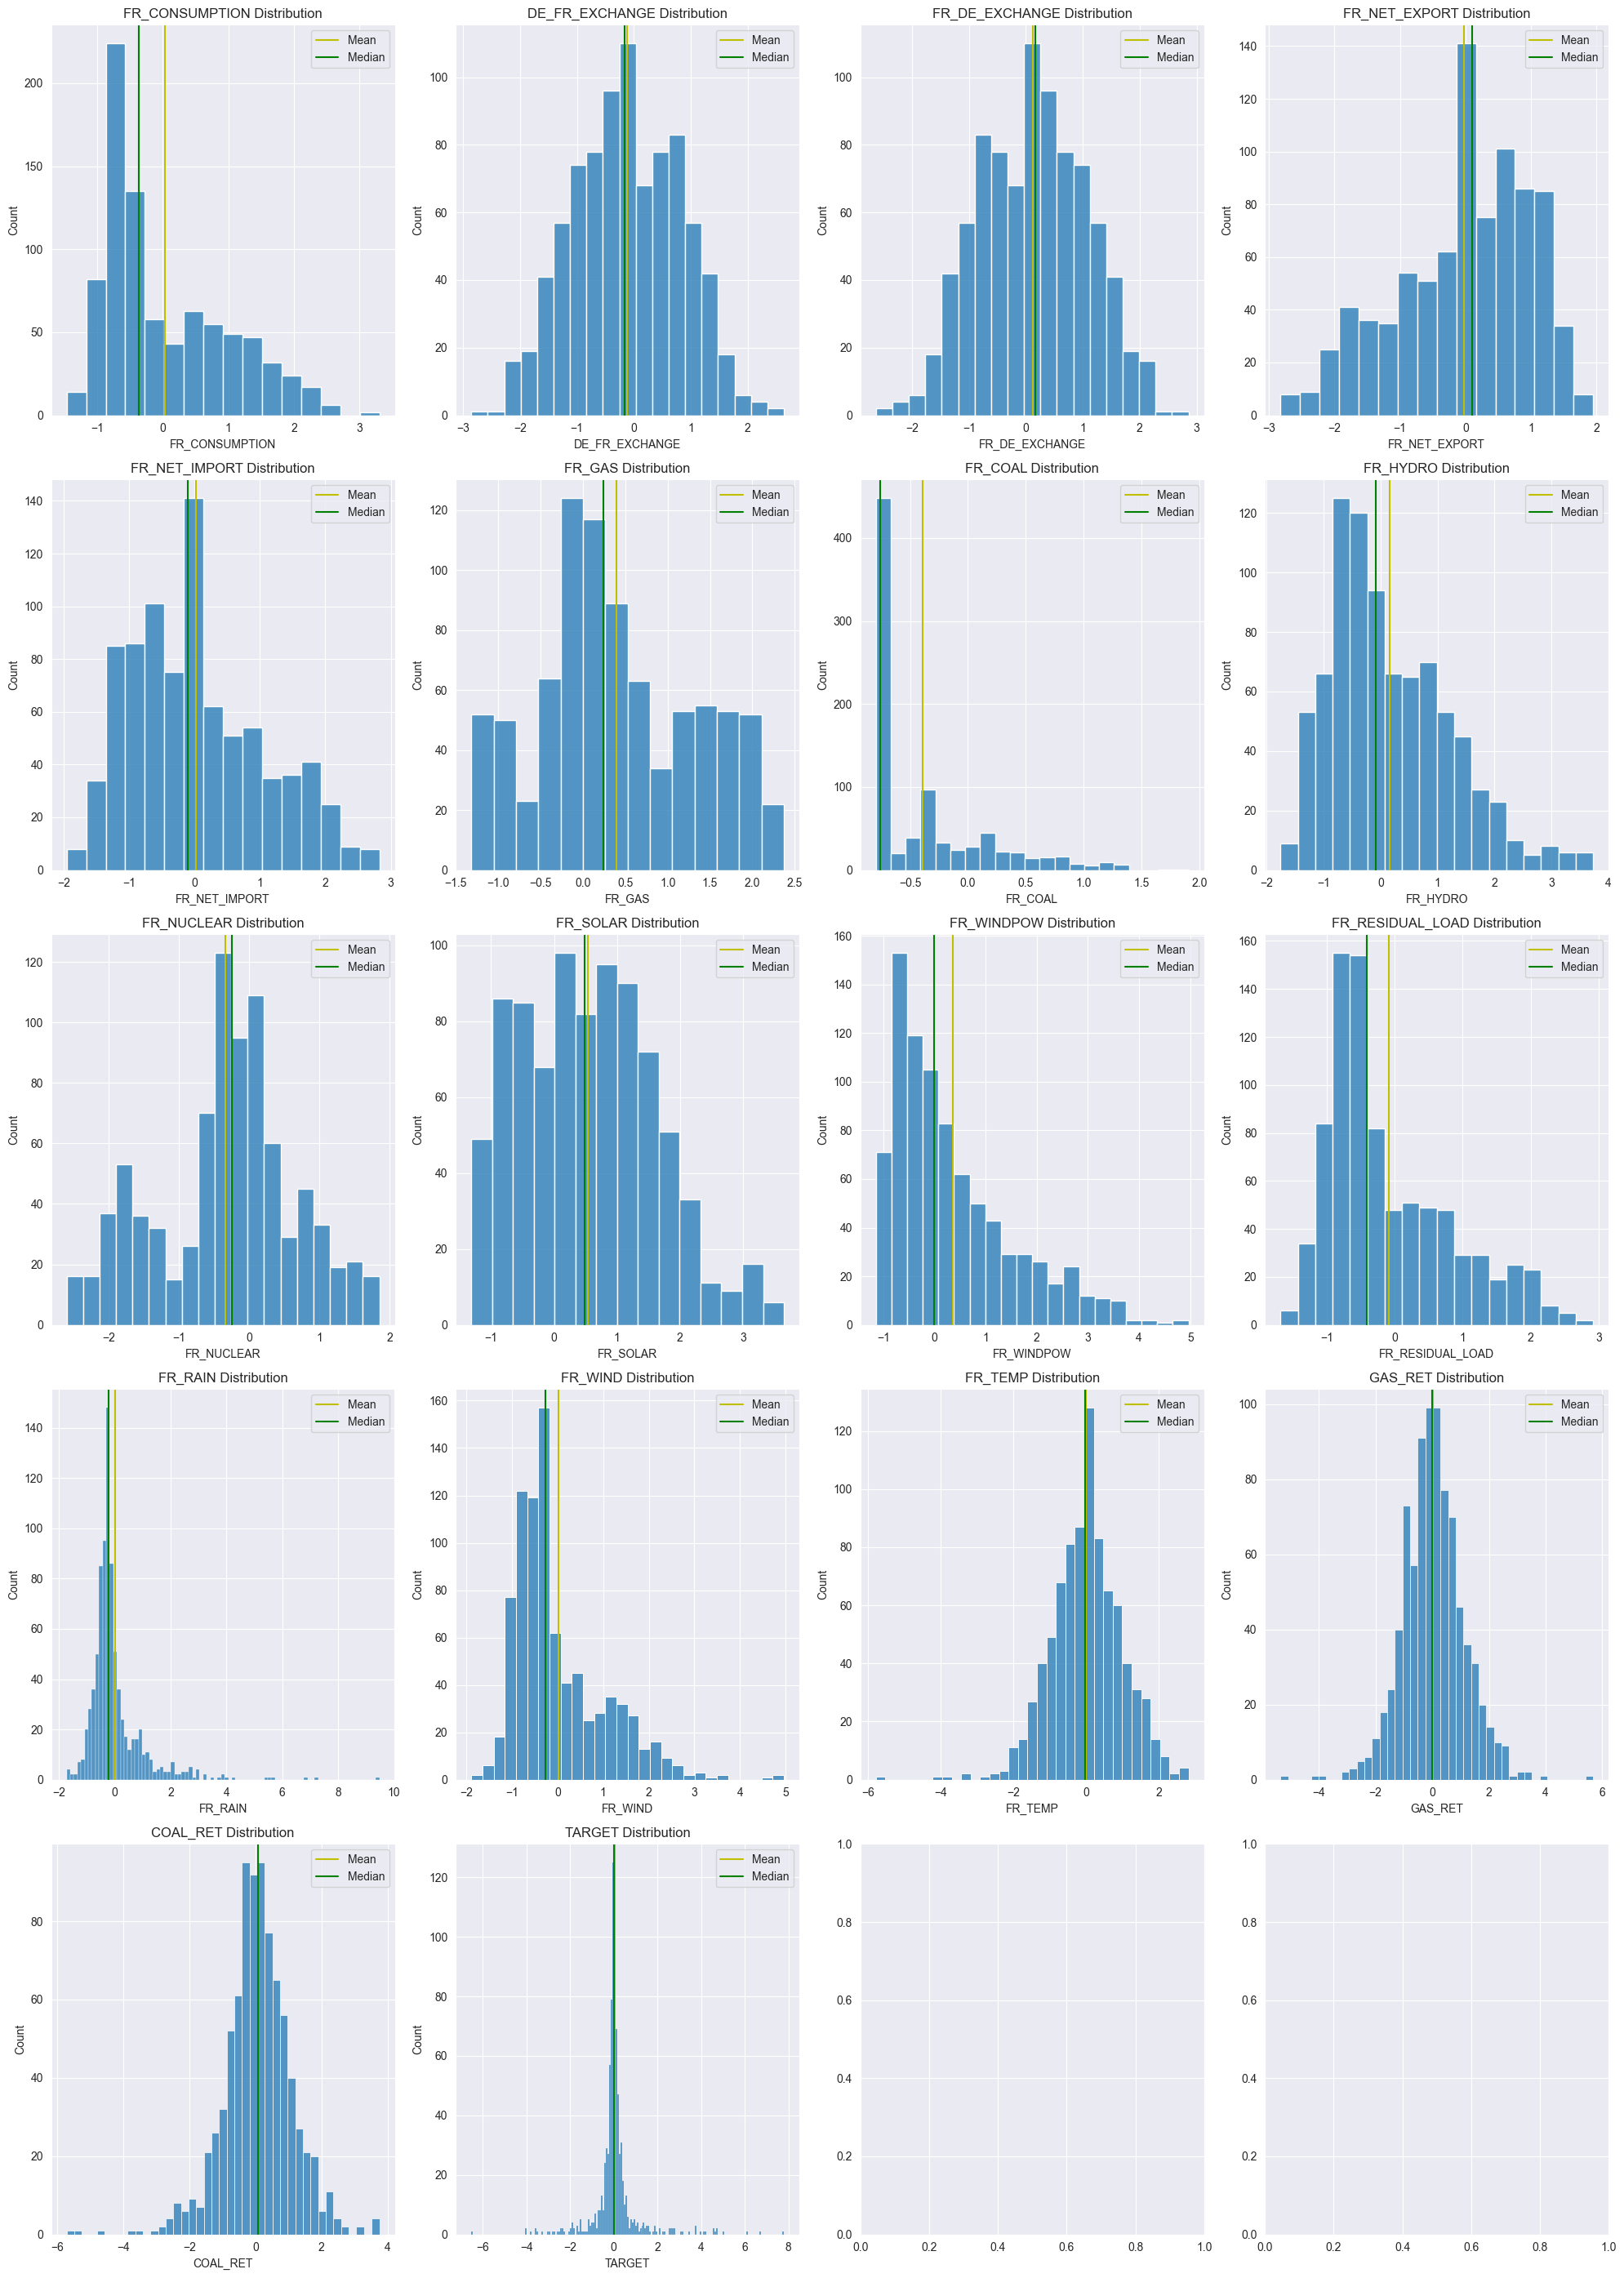

In [35]:
# CREATION DES HISTOGRAMMES

# POUR LA FRANCE

fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(20, 28))
fig.subplots_adjust(hspace=0.5, wspace=0.3)

for i, ax in enumerate(axes.flatten()):
    if i < len(data_FR.describe().columns):
        j = data_FR.describe().columns[i]
        sns.histplot(data_FR[j], ax=ax)
        ax.axvline(data_FR[j].mean(), color='y', linestyle='-', label='Mean')
        ax.axvline(data_FR[j].median(), color='g', linestyle='-', label='Median')
        ax.set_xlabel(j)
        ax.set_title(f'{j} Distribution')
        ax.legend()

plt.tight_layout()
plt.show(block=True)

On peut remarquer sur les diagrammes de la France :

FR_CONSUMPTION : distribution asymétrique droite
DE_FR_EXCHANGE : distribution asymétrique droite
FR_DE_EXCHANGE : distribution symétrique gauche
FR_NET_EXPORT : distribution asymétrique gauche
FR_NET_IMPORT : distribution asymétrique droite
FR_GAS : distribution asymétrique droite
FR_COAL : distribution asymétrique
FR_HYDRO : distribution asymétrique droite
FR_NUCLEAR : distribution asymétrique gauche
FR_SOLAR : distribution asymétrique droite
FR_WINDPOW : distribution asymétrique droite
FR_RESIDUAL_LOAD : distribution asymétrique droite
FR_RAIN : distribution asymétrique droite
FR_WIND : distribution asymétrique droite
FR_TEMP : distribution symétrique droite
GAS_RET : distribution asymétrique droite
COAL_RET : distribution asymétrique droite
TARGET : distribution asymétrique gauche

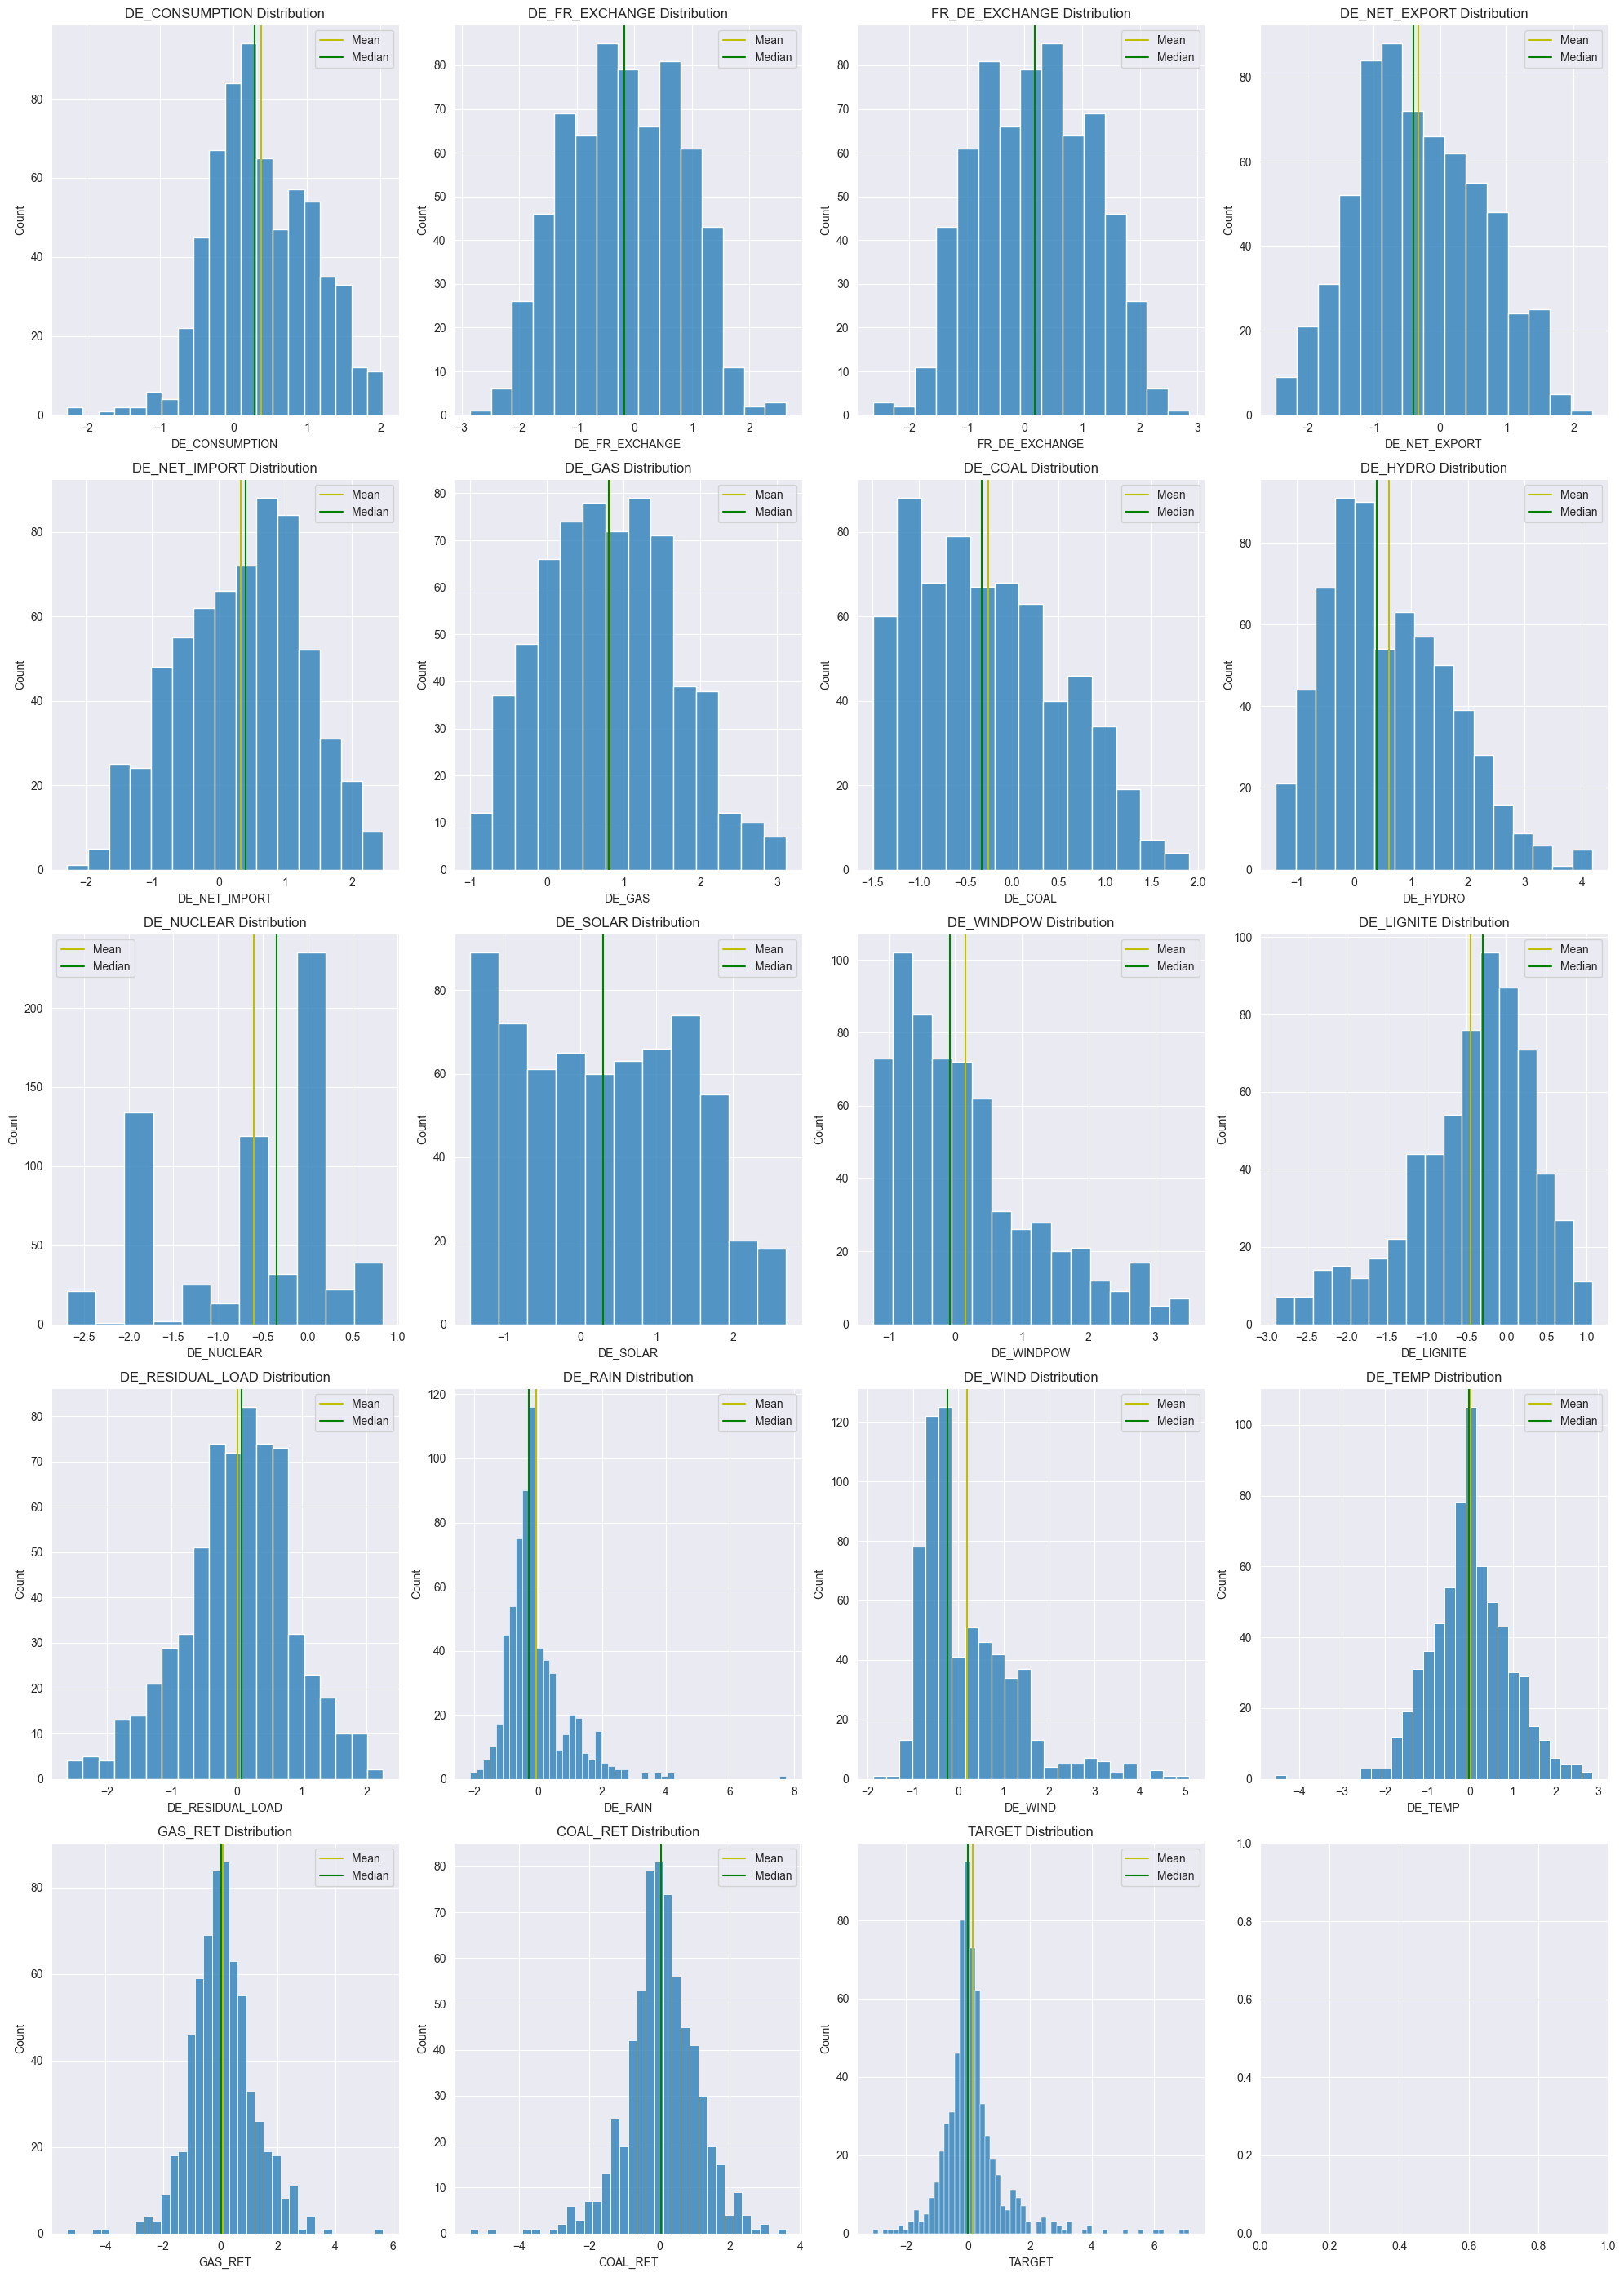

In [36]:
# POUR L'ALLEMAGNE

fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(20, 28))
fig.subplots_adjust(hspace=0.5, wspace=0.3)

for i, ax in enumerate(axes.flatten()):
    if i < len(data_DE.describe().columns):
        j = data_DE.describe().columns[i]
        sns.histplot(data_DE[j], ax=ax)
        ax.axvline(data_DE[j].mean(), color='y', linestyle='-', label='Mean')
        ax.axvline(data_DE[j].median(), color='g', linestyle='-', label='Median')
        ax.set_xlabel(j)
        ax.set_title(f'{j} Distribution')
        ax.legend()

plt.tight_layout()
plt.show(block=True)

On peut remarquer sur les diagrammes de l'Allemagne :

DE_CONSUMPTION : distribution asymétrique droite
DE_FR_EXCHANGE : distribution asymétrique droite
FR_DE_EXCHANGE : distribution asymétrique droite
DE_NET_EXPORT : distribution asymétrique droite
DE_NET_IMPORT : distribution asymétrique gauche
DE_GAS : distribution asymétrique droite
DE_COAL : distribution asymétrique droite
DE_HYDRO : distribution asymétrique droite
DE_NUCLEAR : distribution asymétrique
DE_SOLAR : distribution asymétrique droite
DE_WINDPOW : distribution asymétrique droite
DE_LIGNITE : distribution asymétrique gauche
DE_RESIDUAL_LOAD : distribution asymétrique gauche
DE_RAIN : distribution asymétrique droite
DE_WIND : distribution asymétrique droite
DE_TEMP : distribution asymétrique droite
GAS_RET : distribution asymétrique droite
COAL_RET : distribution asymétrique droite
TARGET : distribution asymétrique droite

des diagrammes en boîte :

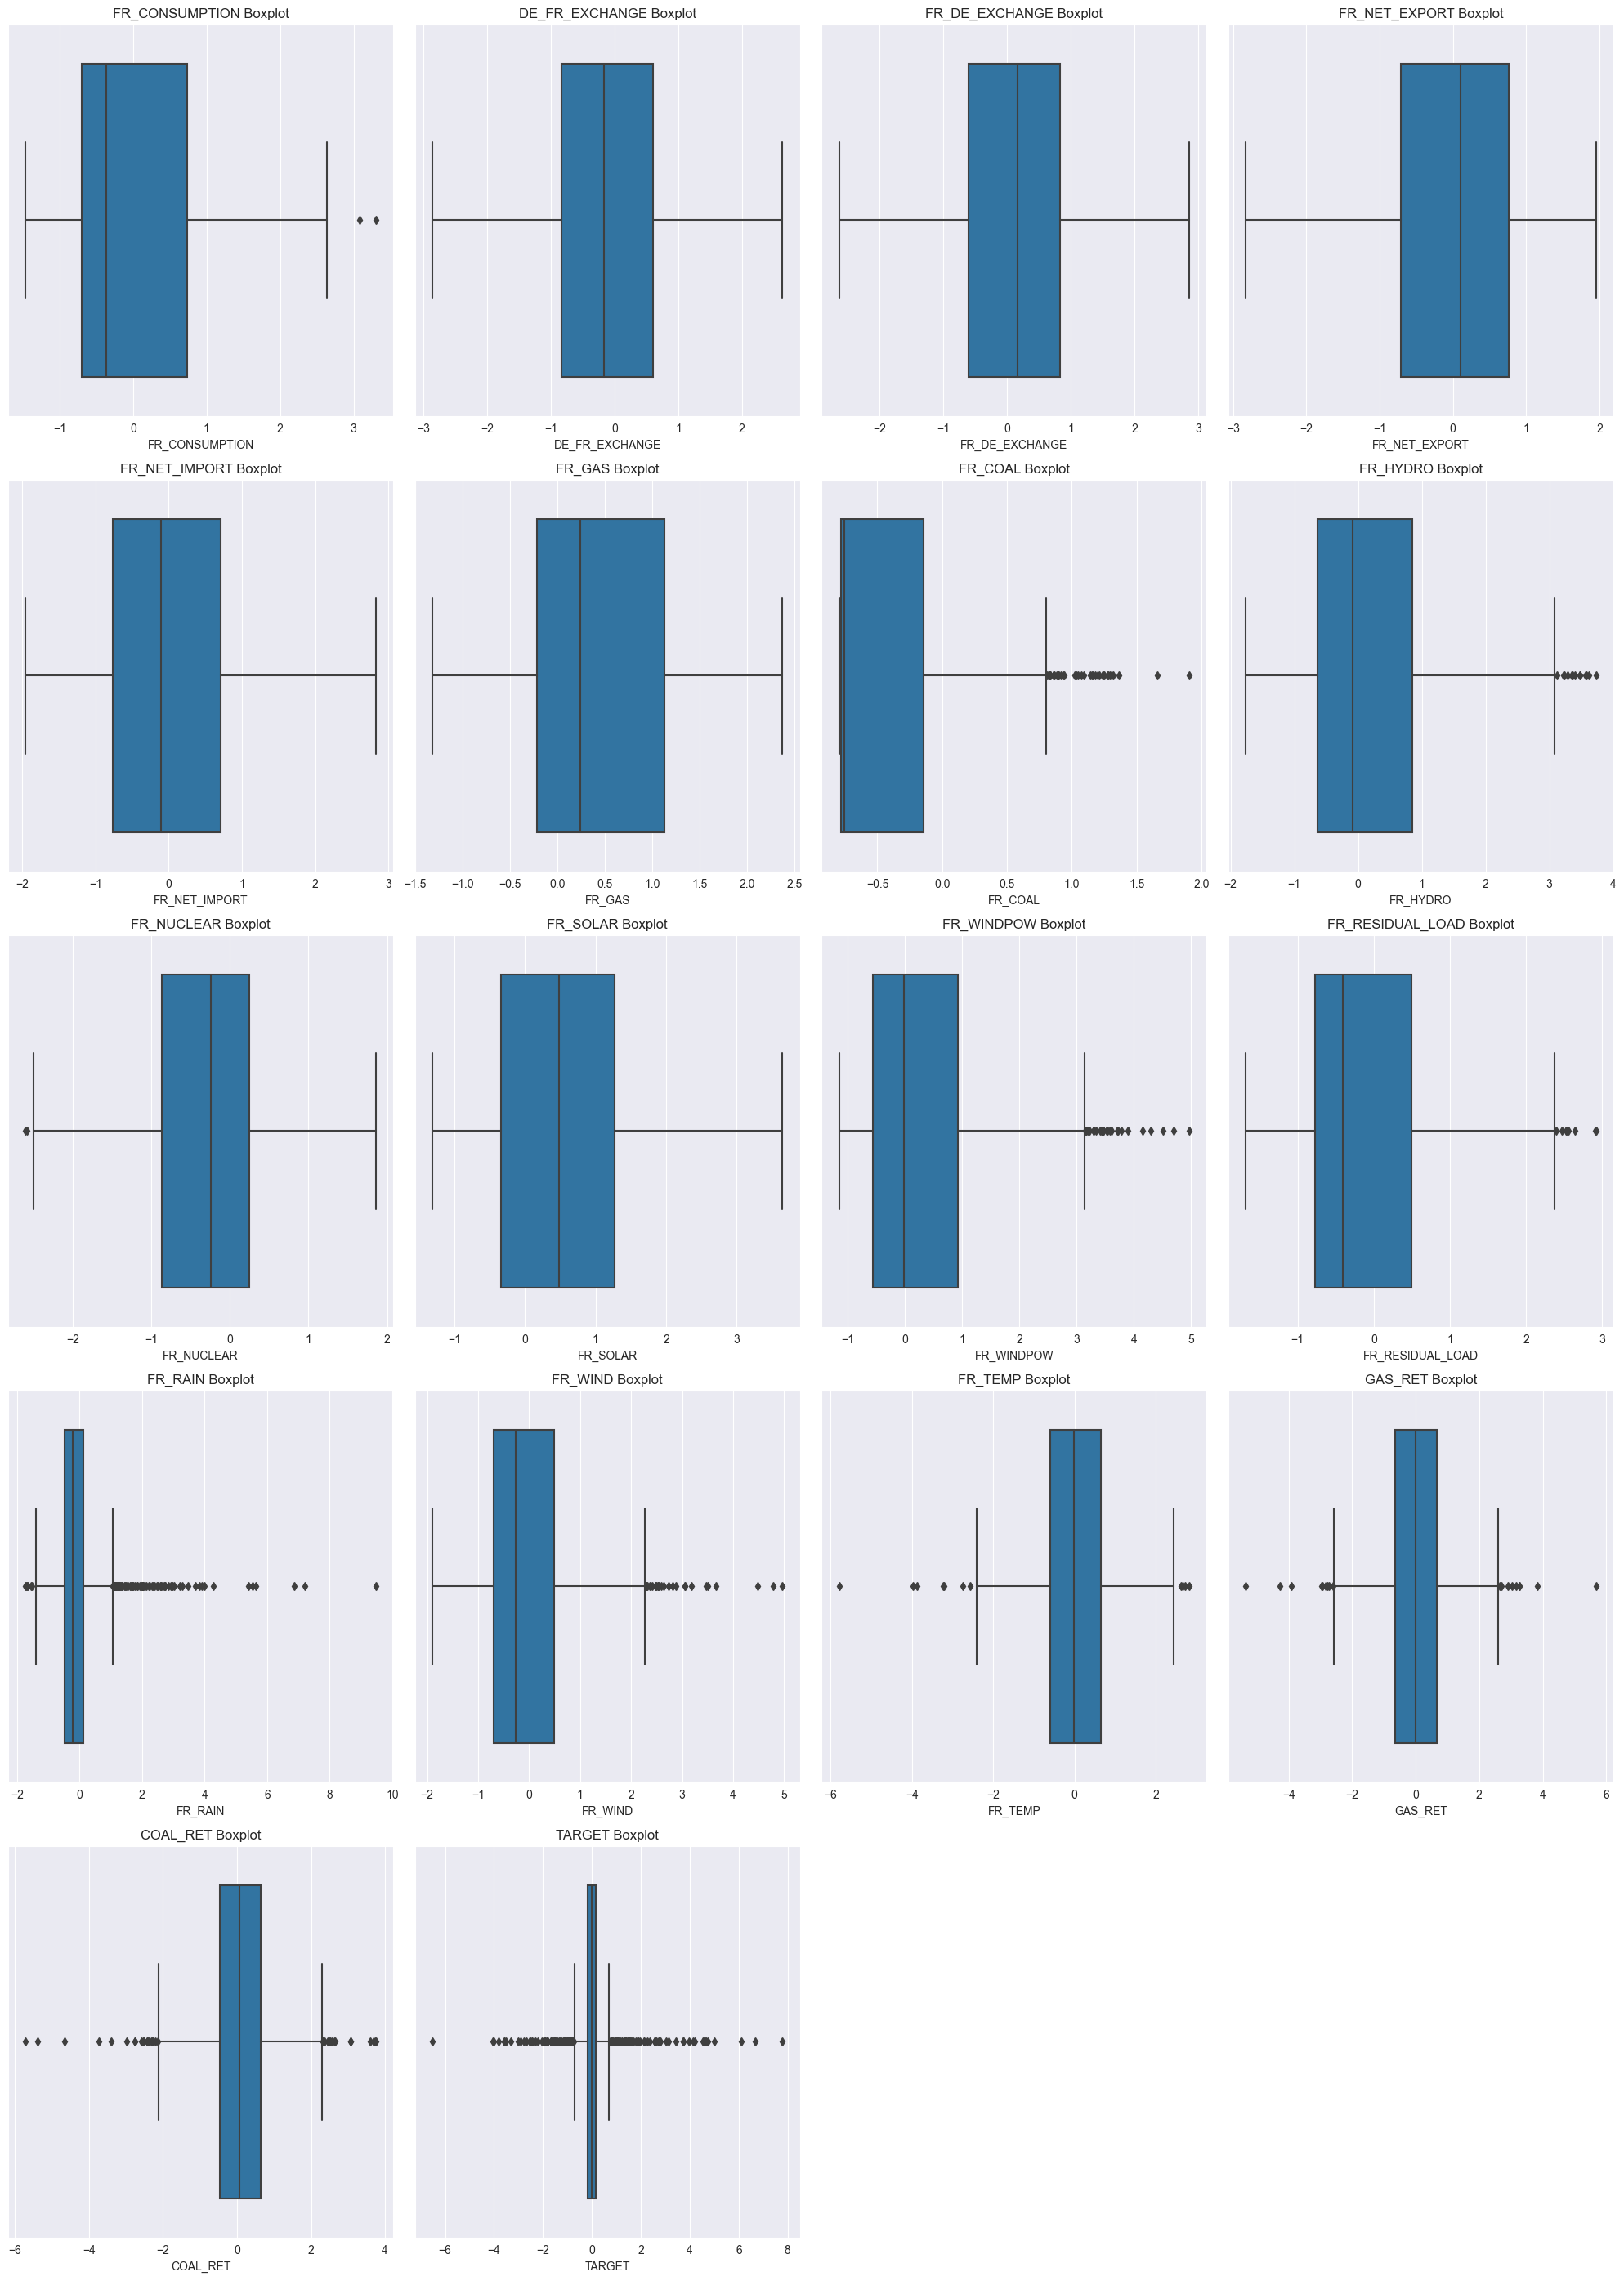

In [37]:
# CREATION DES DIAGRAMMES EN BOITE

# POUR LA FRANCE
plt.figure(figsize=(20, 28))
plt.subplots_adjust(hspace=0.5, wspace=0.3)

for i, j in enumerate(data_FR.describe().columns):
    plt.subplot(5, 4, i+1)
    sns.boxplot(x=data_FR[j])
    plt.title('{} Boxplot'.format(j))

plt.tight_layout()
plt.show()

On remarque que FR_CONSUMPTION, FR_COAL, FR_HYDRO, FR_WINDPOW, FR_RESIDUAL_LOAD, FR_RAIN, FR_WIND, FR_TEMP, GAS_RET, COAL_RET, TARGET possèdent de nombreuses valeurs aberrantes.

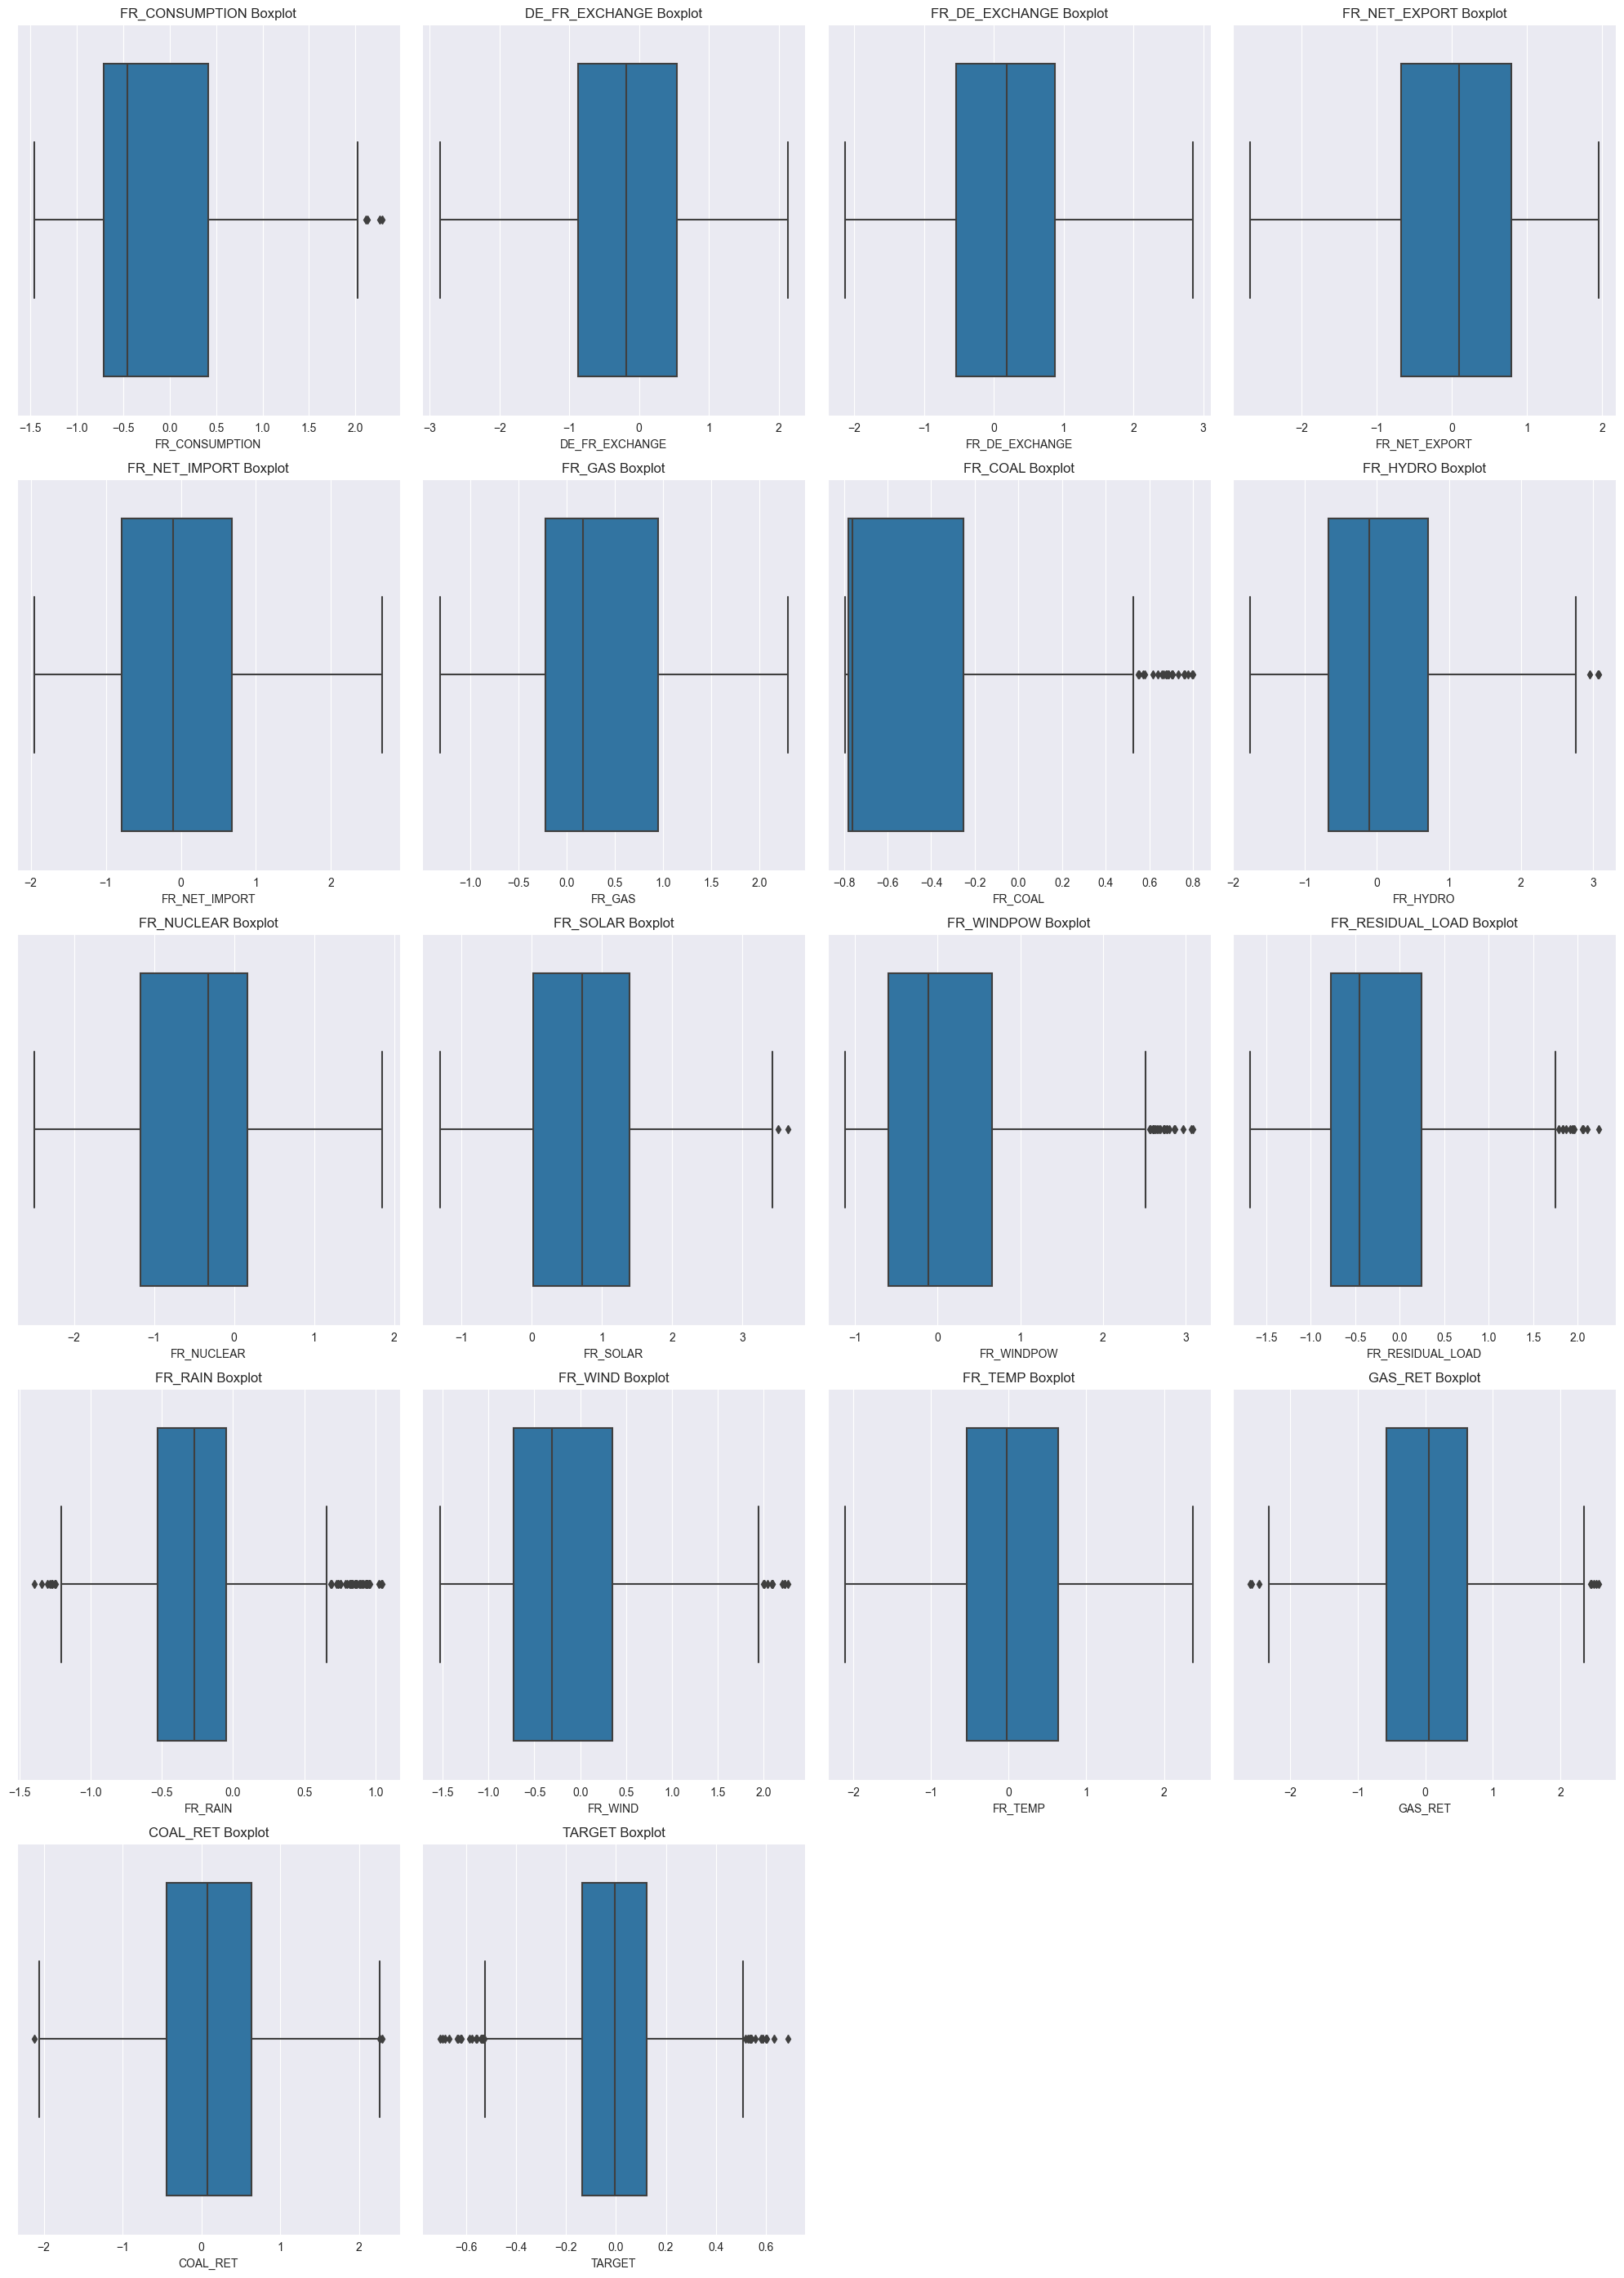

In [38]:
# APRES SUPPRESSION DES VALEURS ABERRANTES

# Calculer les limites IQR pour chaque colonne
Q1 = data_FR.quantile(0.25)
Q3 = data_FR.quantile(0.75)
IQR = Q3 - Q1

# Définir les bornes supérieure et inférieure pour détecter les valeurs aberrantes
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Supprimer les valeurs aberrantes de chaque colonne
data_FR = data_FR[~((data_FR < lower_bound) | (data_FR > upper_bound)).any(axis=1)]

plt.figure(figsize=(20, 28))
plt.subplots_adjust(hspace=0.5, wspace=0.3)

for i, j in enumerate(data_FR.describe().columns):
    plt.subplot(5, 4, i+1)
    sns.boxplot(x=data_FR[j])
    plt.title('{} Boxplot'.format(j))

plt.tight_layout()
plt.show()

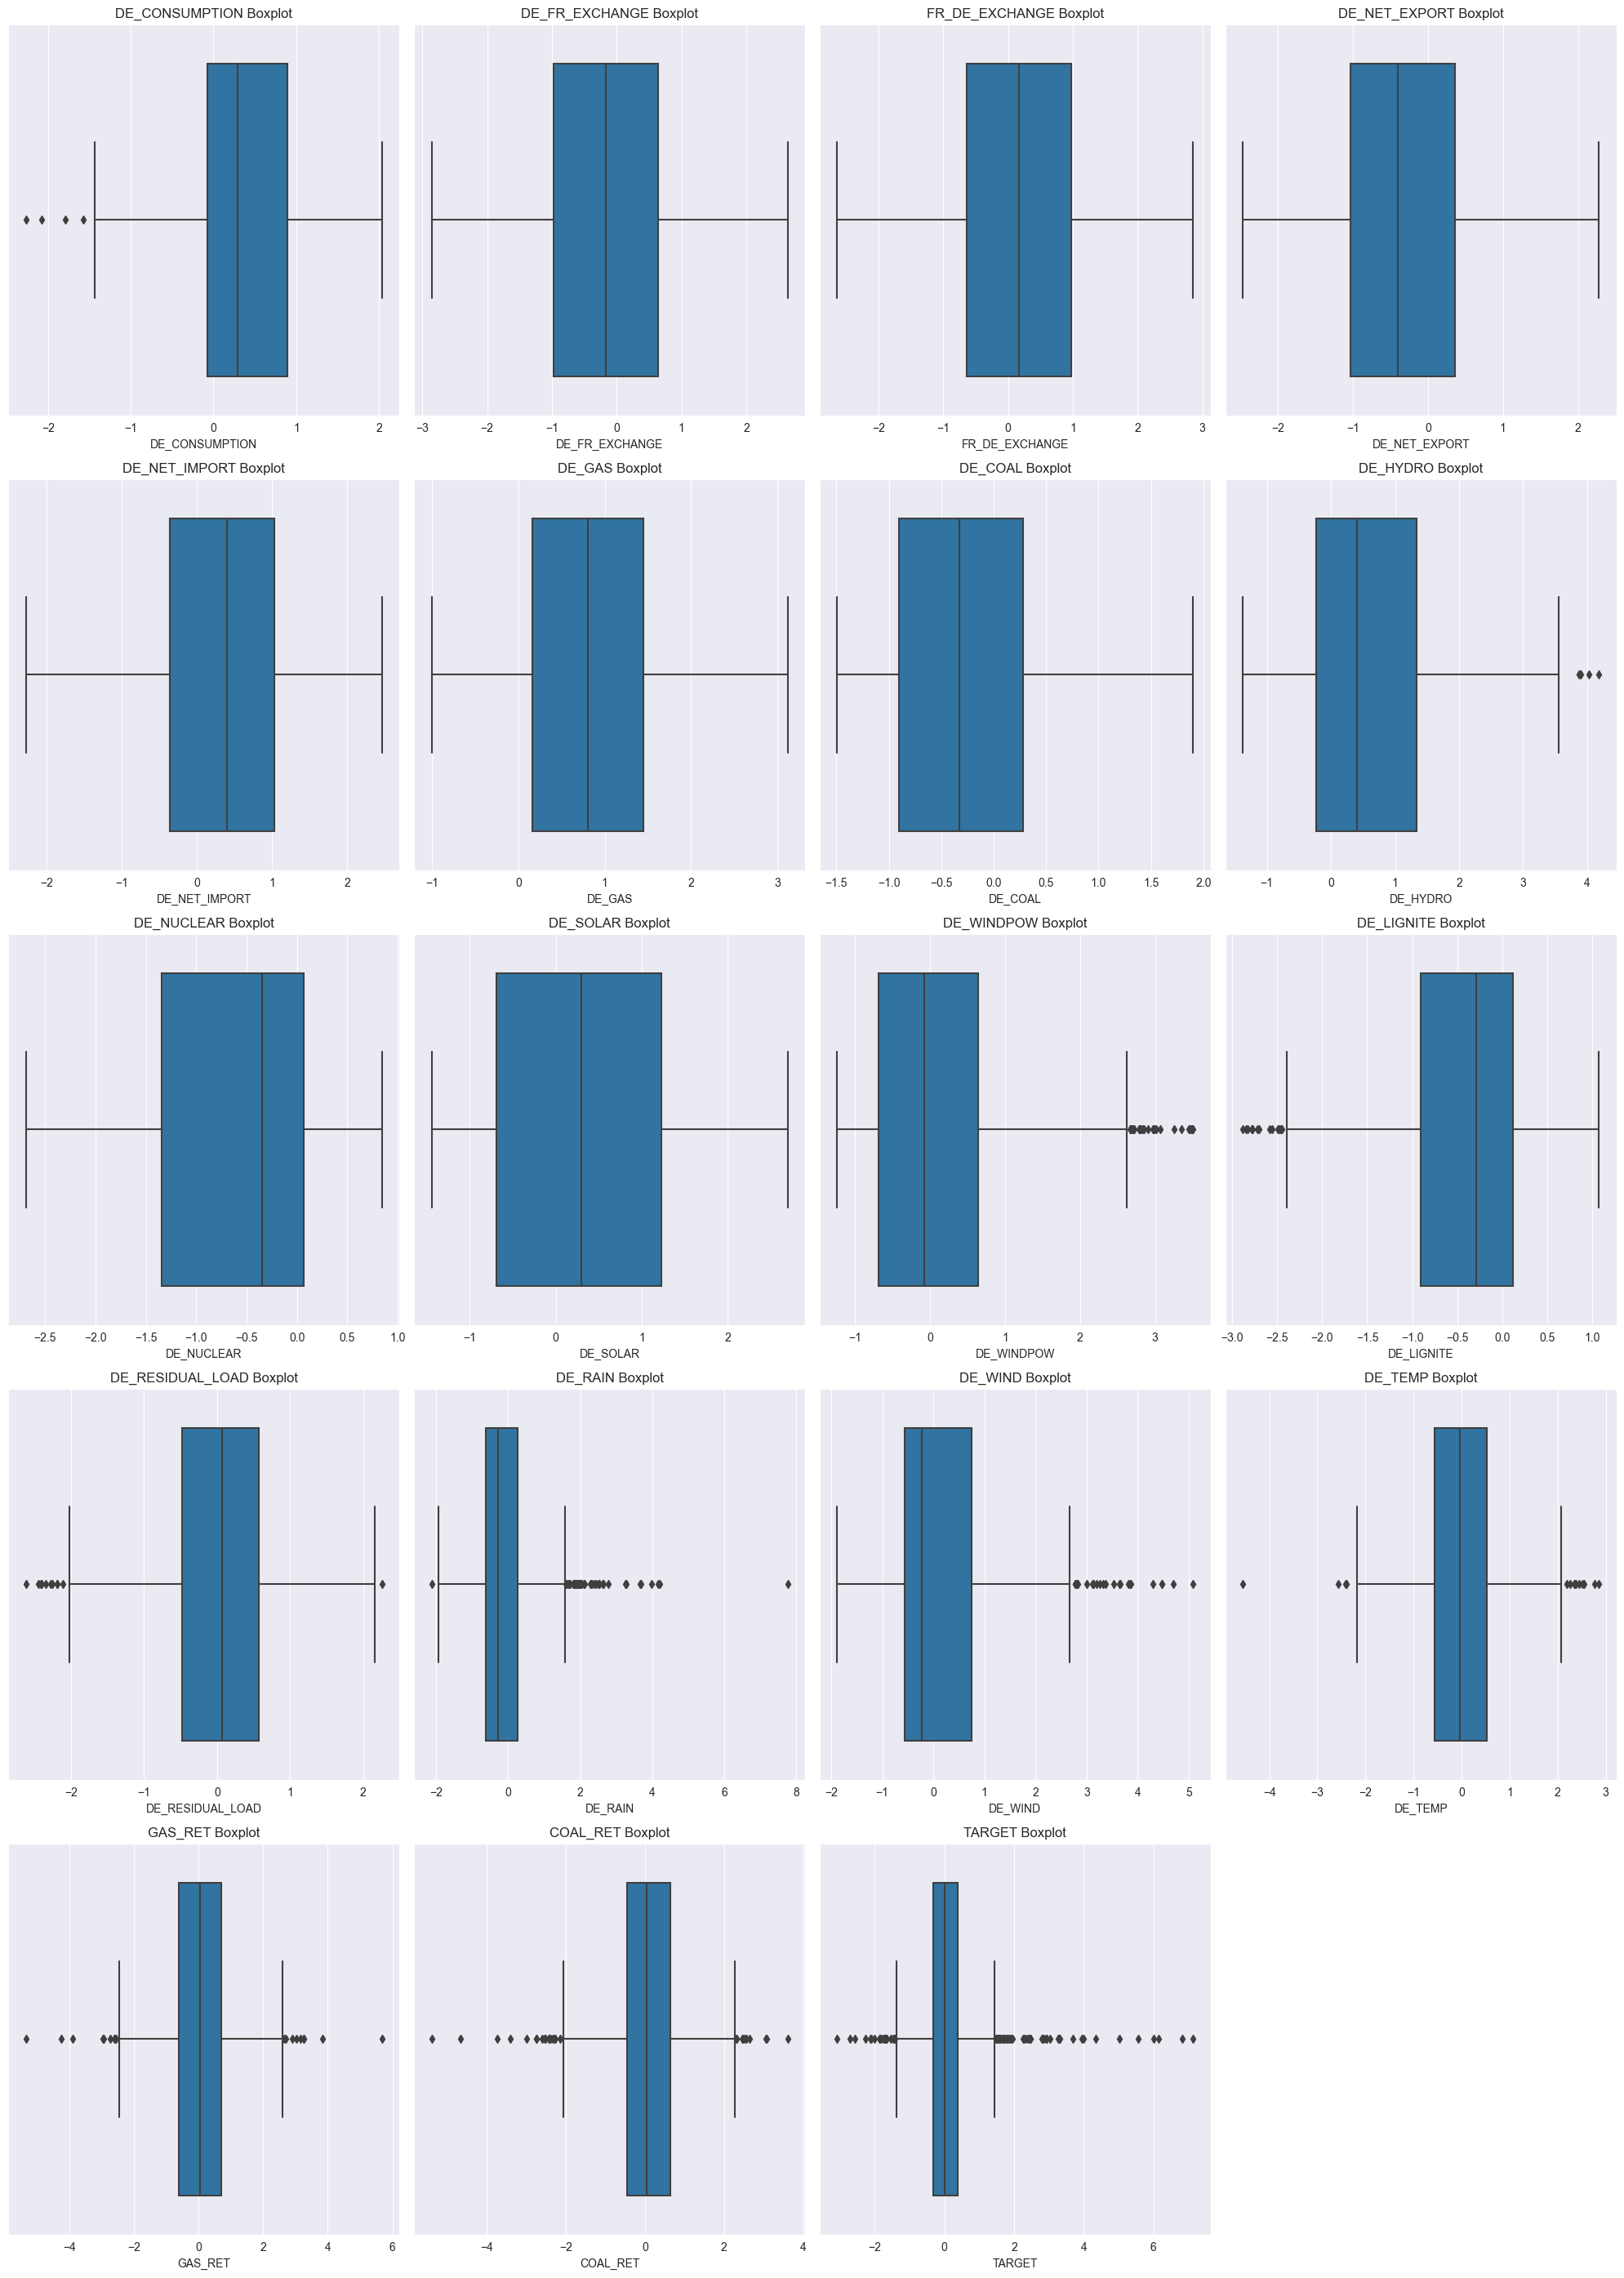

In [39]:
# POUR L'ALLEMAGNE

plt.figure(figsize=(20, 28))
plt.subplots_adjust(hspace=0.5, wspace=0.3)

for i, j in enumerate(data_DE.describe().columns):
    plt.subplot(5, 4, i+1)
    sns.boxplot(x=data_DE[j])
    plt.title('{} Boxplot'.format(j))

plt.tight_layout()
plt.show()

On remarque que DE_CONSUMPTION, DE_HYDRO, DE_WINDPOW, DE_LIGNITE, DE_RESIDUAL_LOAD, DE_RAIN, DE_WIND, DE_TEMP, GAS_RET, COAL_RET, TARGET possèdent de nombreuses valeurs aberrantes.

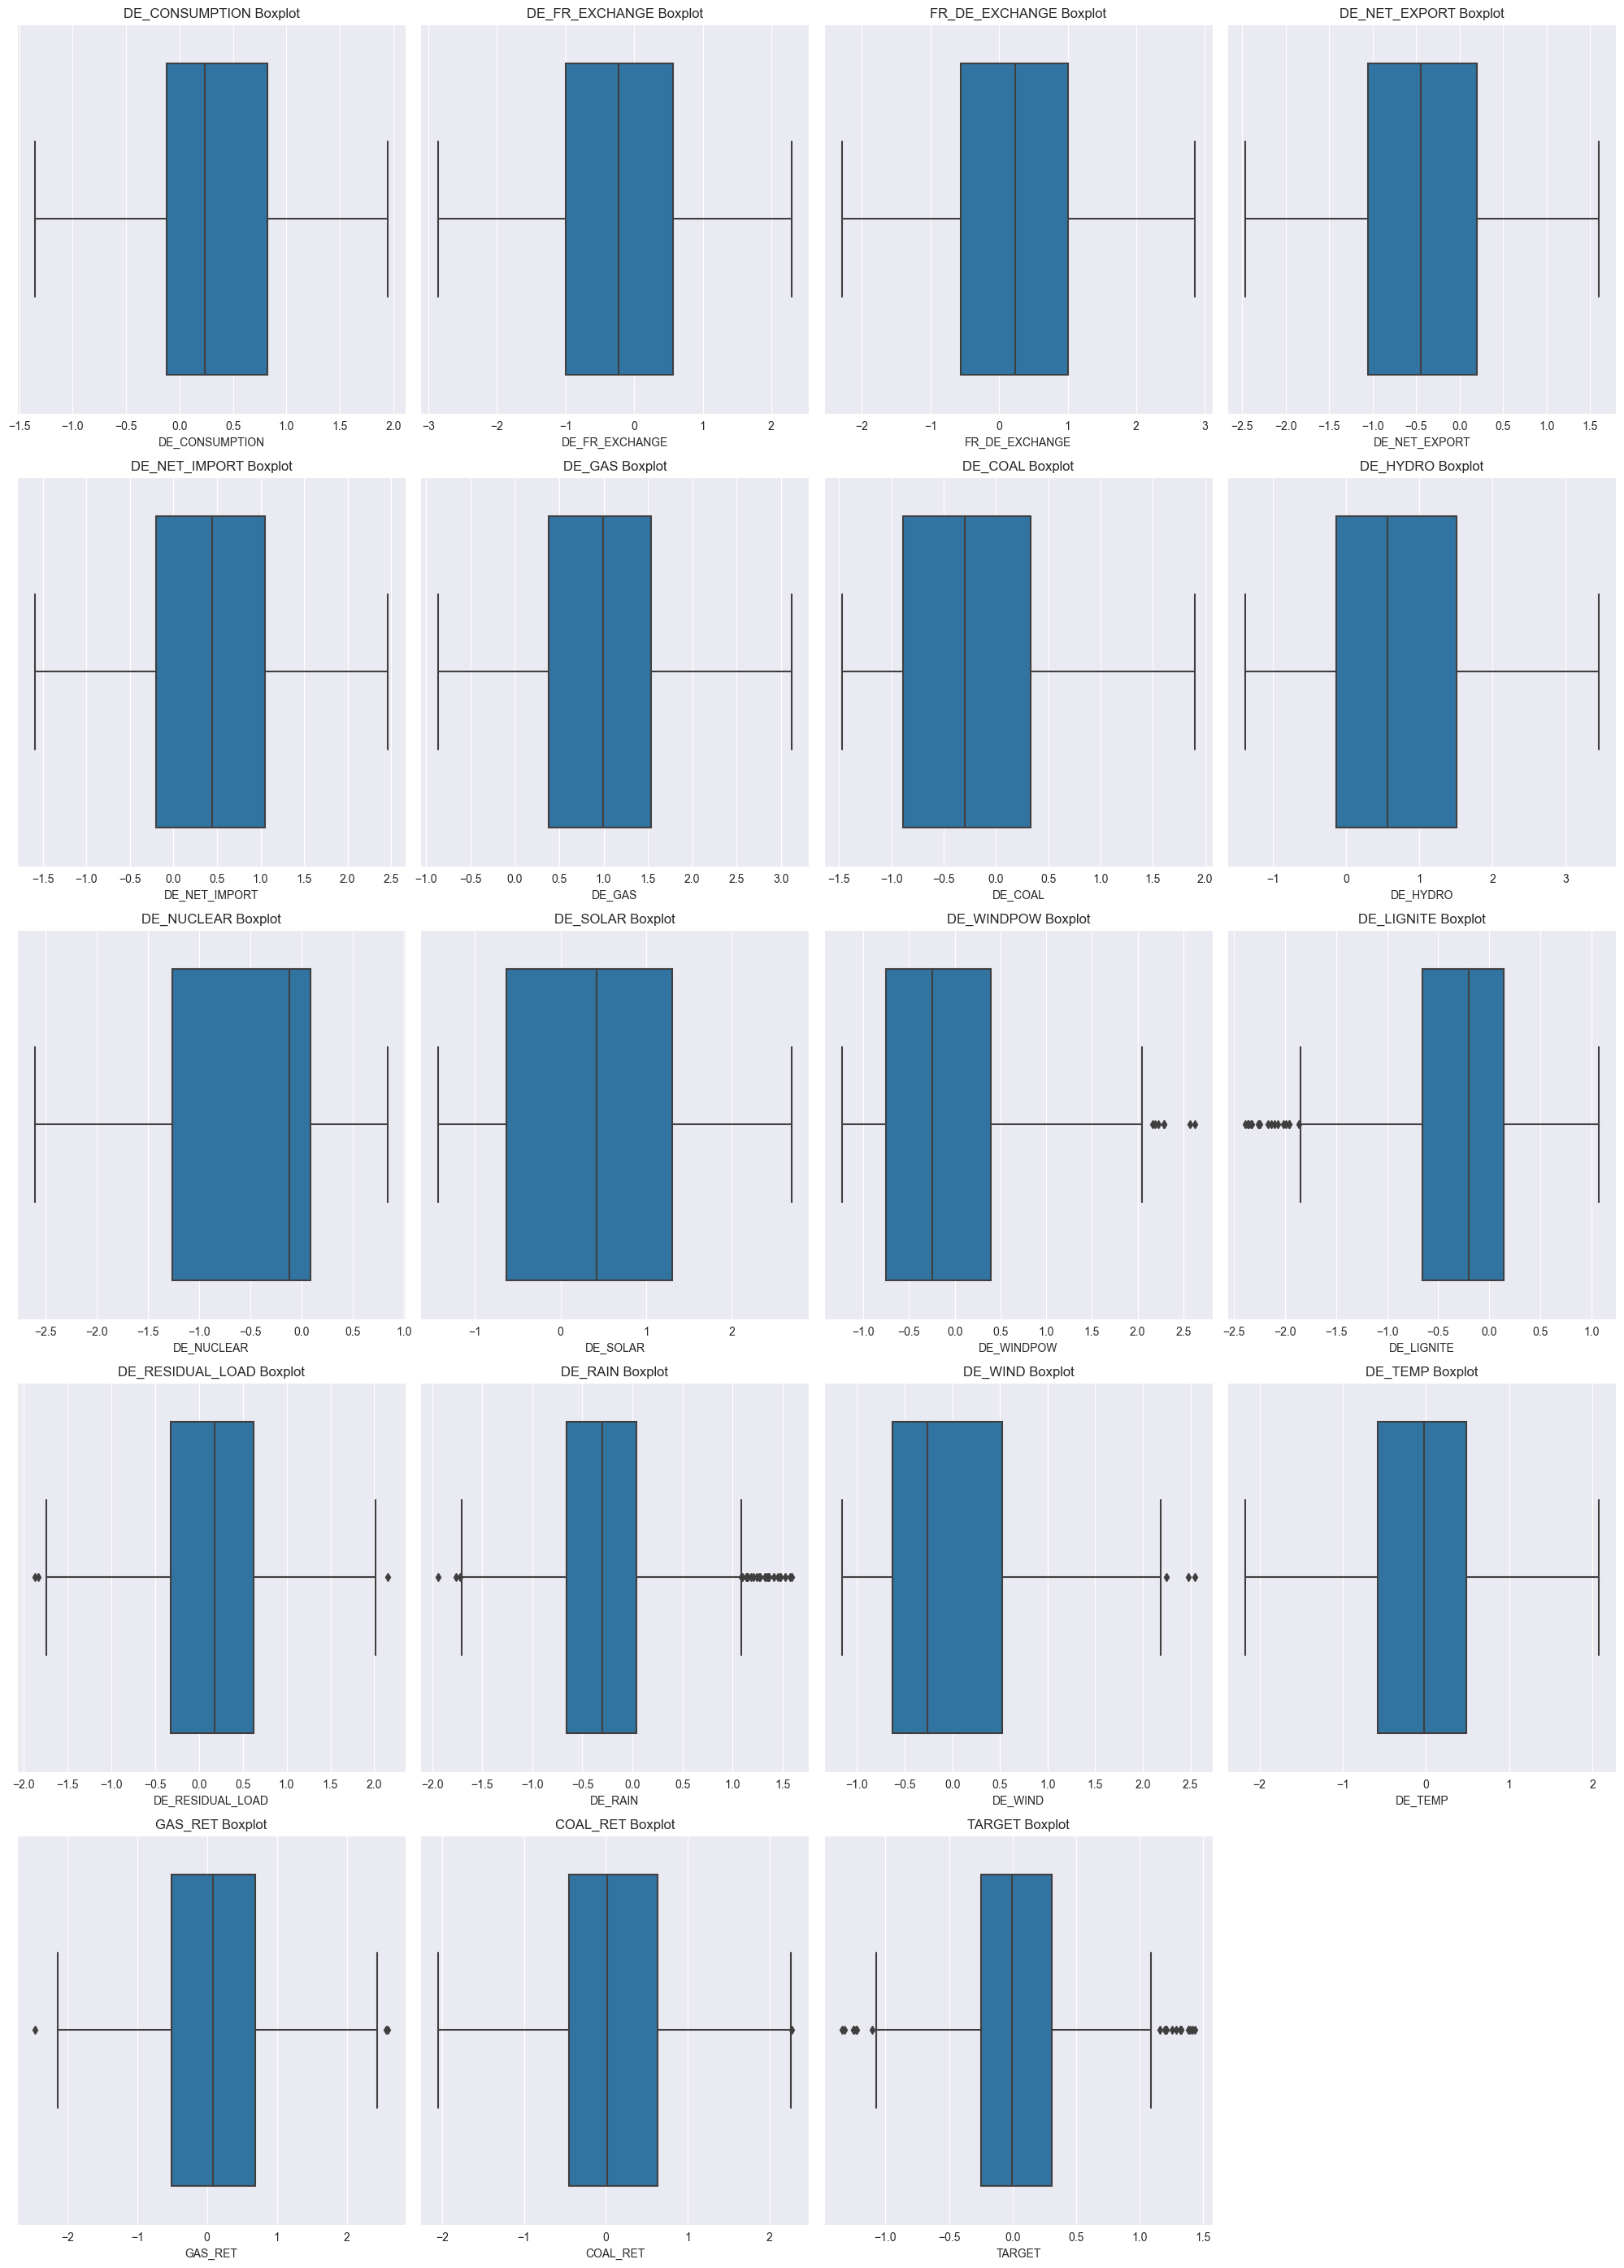

In [40]:
# APRES SUPPRESSION DES VALEURS ABERRANTES

# Calculer les limites IQR pour chaque colonne
Q1 = data_DE.quantile(0.25)
Q3 = data_DE.quantile(0.75)
IQR = Q3 - Q1

# Définir les bornes supérieure et inférieure pour détecter les valeurs aberrantes
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Supprimer les valeurs aberrantes de chaque colonne
data_DE = data_DE[~((data_DE < lower_bound) | (data_DE > upper_bound)).any(axis=1)]

plt.figure(figsize=(20, 28))
plt.subplots_adjust(hspace=0.5, wspace=0.3)

for i, j in enumerate(data_DE.describe().columns):
    plt.subplot(5, 4, i+1)
    sns.boxplot(x=data_DE[j])
    plt.title('{} Boxplot'.format(j))

plt.tight_layout()
plt.show()

 Nous avons décidé de supprimer des valeurs aberrantes afin d'améliorer la qualité des résultats de notre analyse. En effet, les valeurs aberrantes sont des observations qui s'éloignent considérablement des autres observations dans un ensemble de données. Elles peuvent être causées par des erreurs de mesure, des erreurs de saisie de données ou simplement par des événements exceptionnels. Ainsi, les valeurs aberrantes peuvent avoir un impact disproportionné sur les estimations statistiques, ce qui peut fausser les résultats de l'analyse. Pour ne pas perdre trop d'informations, nous avons décidé de ne supprimer que 10% au total de nos données. Ce pourcentage a été décidé après de nombreux tests pour optimiser au mieux notre analyse.

 et des graphiques de dispersion :

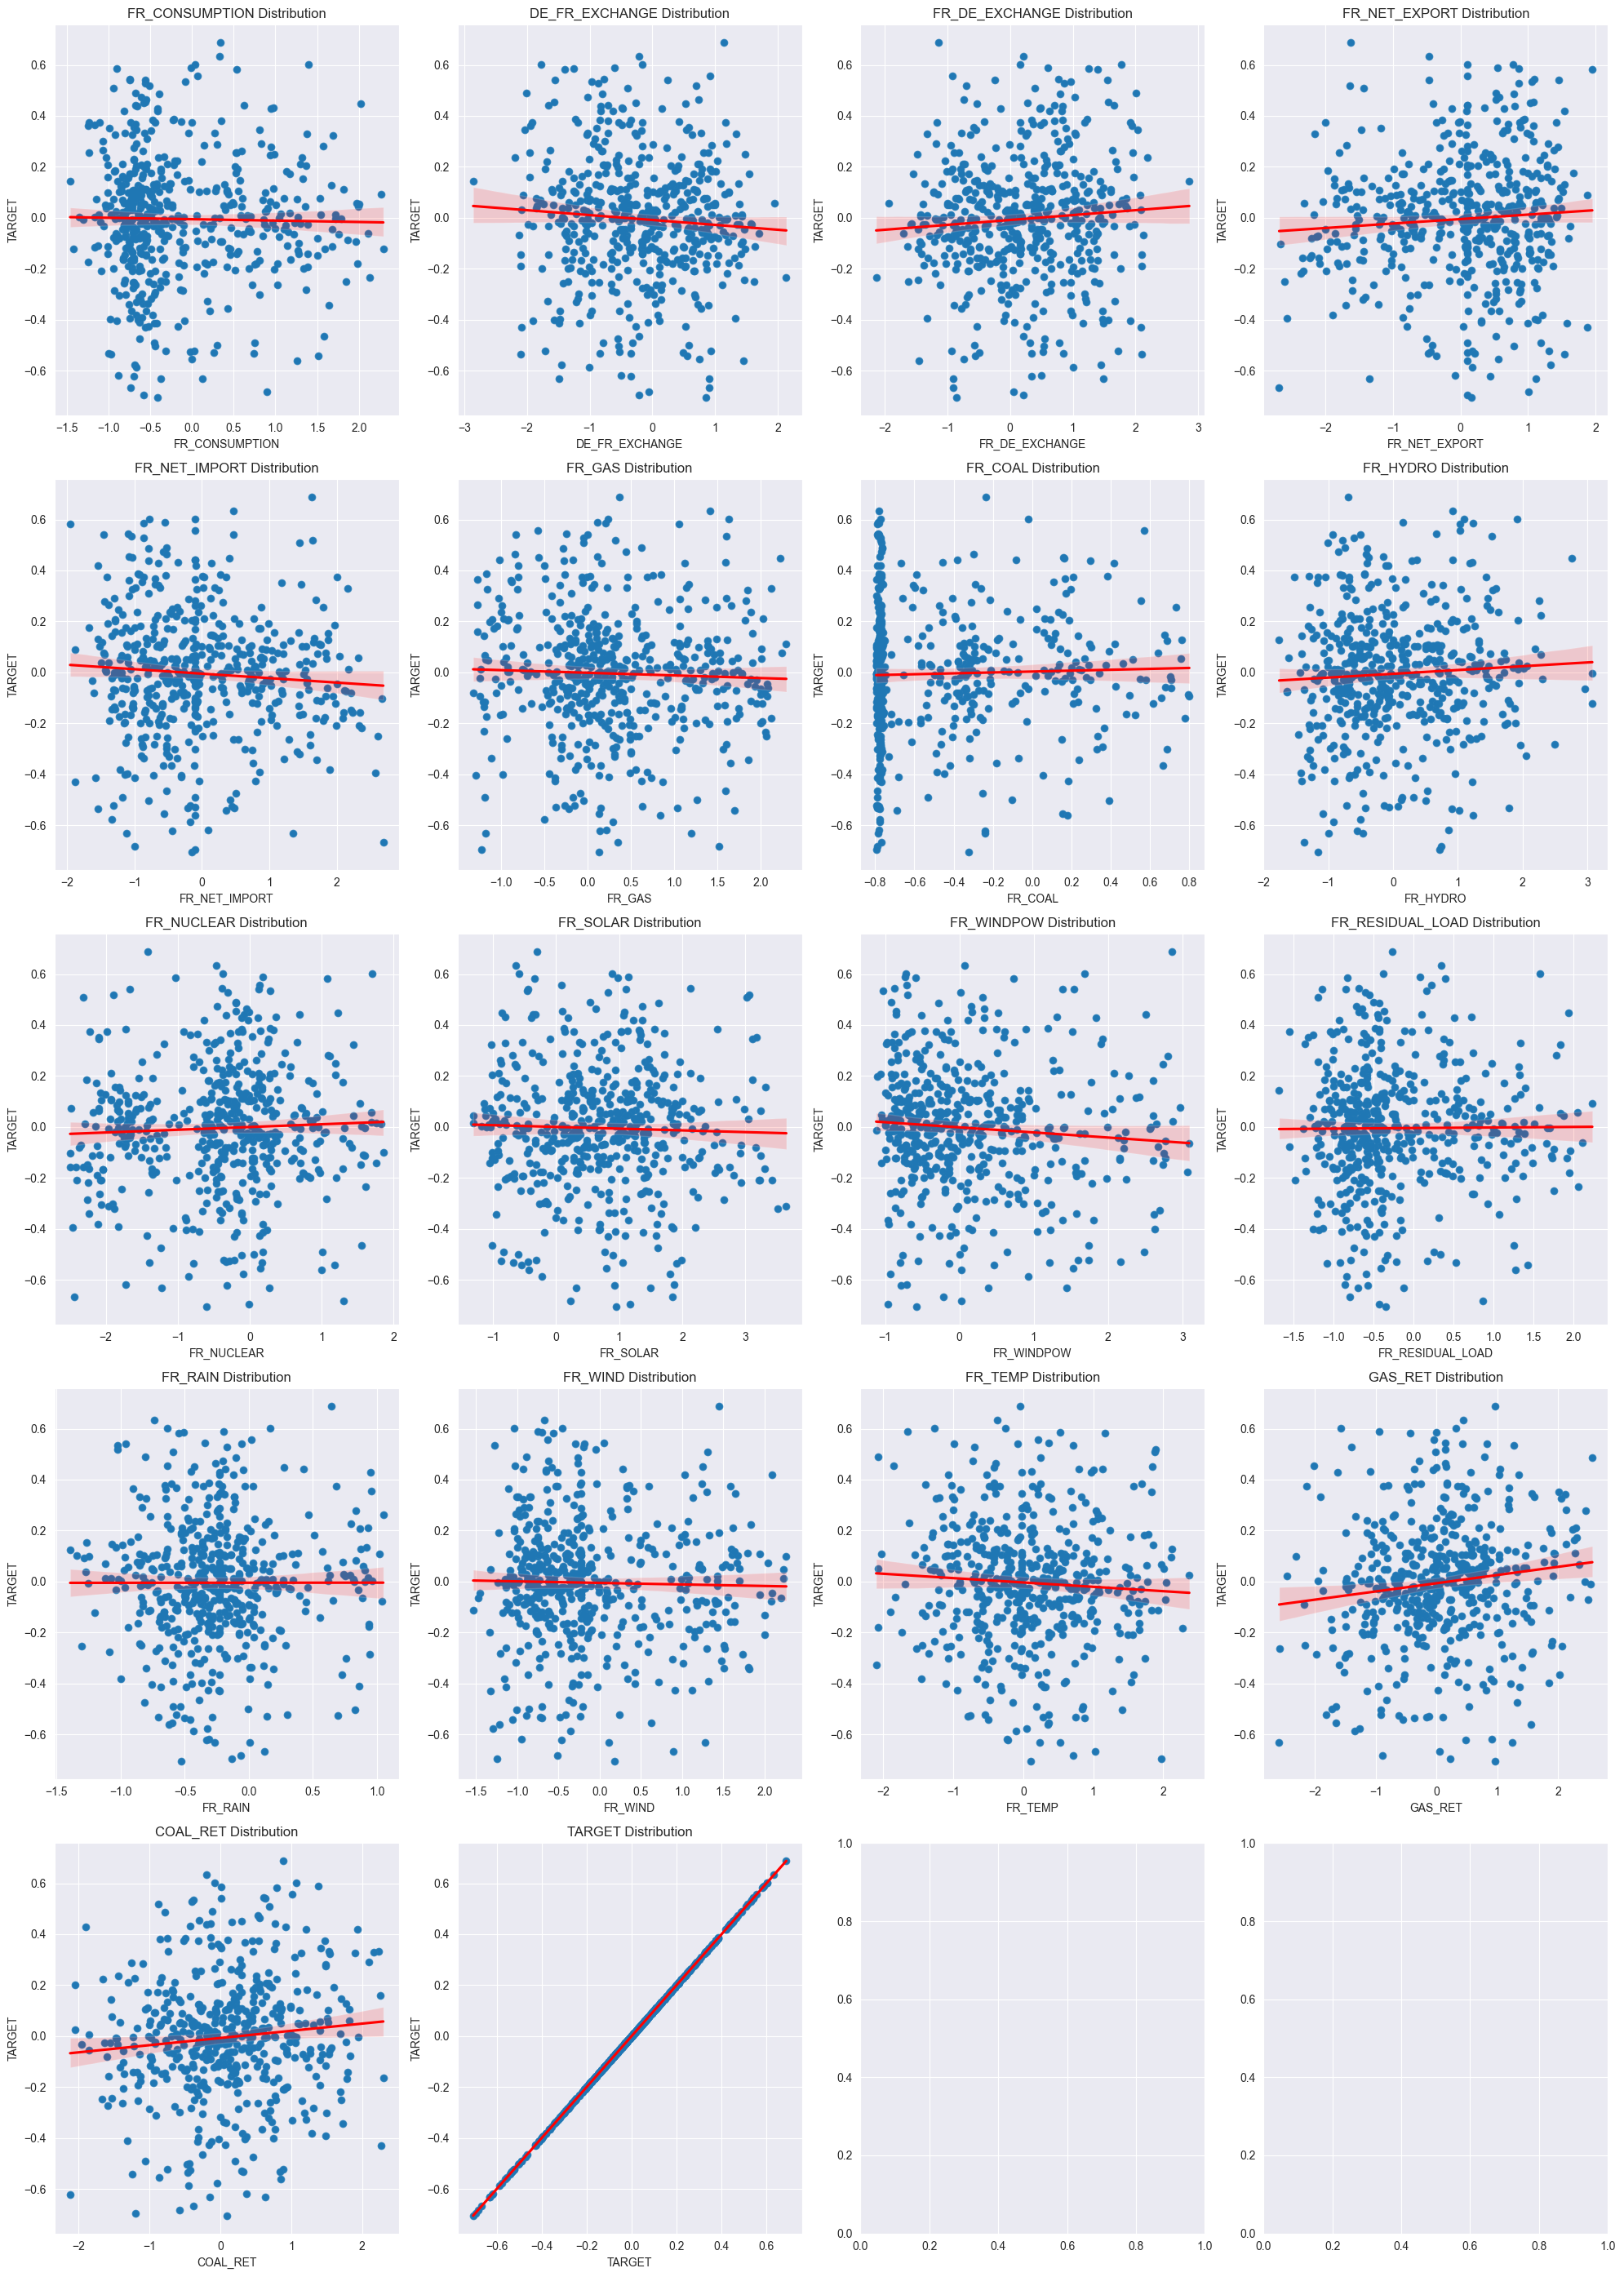

In [41]:
# CREATION DES DIAGRAMMES DE DISPERSIONS

# POUR LA FRANCE

fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(20, 28))
for i, j in enumerate(data_FR.describe().columns):
    axes.flat[i].set_xlabel(j)
    sns.scatterplot(x=data_FR[j], y=data_FR.TARGET, ax=axes.flat[i])
    axes.flat[i].set_title(f'{j} Distribution')
    sns.regplot(x=data_FR[j], y=data_FR.TARGET, ax=axes.flat[i], line_kws={"color": "red"})

plt.tight_layout()
plt.show(block=True)

Pour la France, on remarque que les variables FR_DE_EXCHANGE, GAS_RET, COAL_RET, FR_HYDRO ont une relation positive avec TARGET. En effet, sur chacun des diagrammes de dispersion de ces derniers, les points se déplacent de manière ascendante de gauche à droite. On remarque également plusieurs groupements de points autour de la ligne de tendance (droite rouge) ce qui est positif. Cependant, un grand nombre de points aberrantes sont présentes sur nos diagrammes. Ainsi, afin d'effectuer un meilleur choix, il sera pertinent d'analyser ces variables à l'aide de la matrice de corrélation de la France.

D'autres variables possédant une relation négative avec TARGET sont présentes. C'est notamment le cas de DE_WINDOW. On peut voir cela sur son diagramme où les points se déplacent de manière descendante. En revanche, par rapport aux valeurs aberrantes, ces diagrammes sont assez similaires à ceux ayant uen relation positive avec TARGET. Il sera donc intéressant d'analyser plus en détail le comportement de ce genre de variable via la matrice de corrélation de la France.

Finalement, pour le reste des diagrammes, les points n'ont ni relation positive ni négative. En effet, ces derniers sont répartis aléatoirement sans suivre de tendance particulière, cela indique donc une faible corrélation voire l'absence de relation entre les variables sélectionnées. De plus, sur ces derniers, une grande partie des points sont dispersés (donc éloignés de la droite de tendance) ce qui implique une forte présence de points aberrants dans certains cas. On peut prendre l'exemple du diagramme de FR_COAL qui illustre bien cela. Si nous regardons plus en détails le diagramme, nous voyons distinctement les points ne pas suivre la droite de tendance (droite rouge). Au lieu d'être représentés tout le long de cette droite donc horizontalement (parallèle à l'axe des abscisses donc suivant la tendance générale), les points sont regroupés sur le côté gauche du diagramme formant une droite verticale parallèle à l'axe des ordonnées. Ici, il est clair qu'il y a une absence de relation entre ce genre de variable et TARGET.

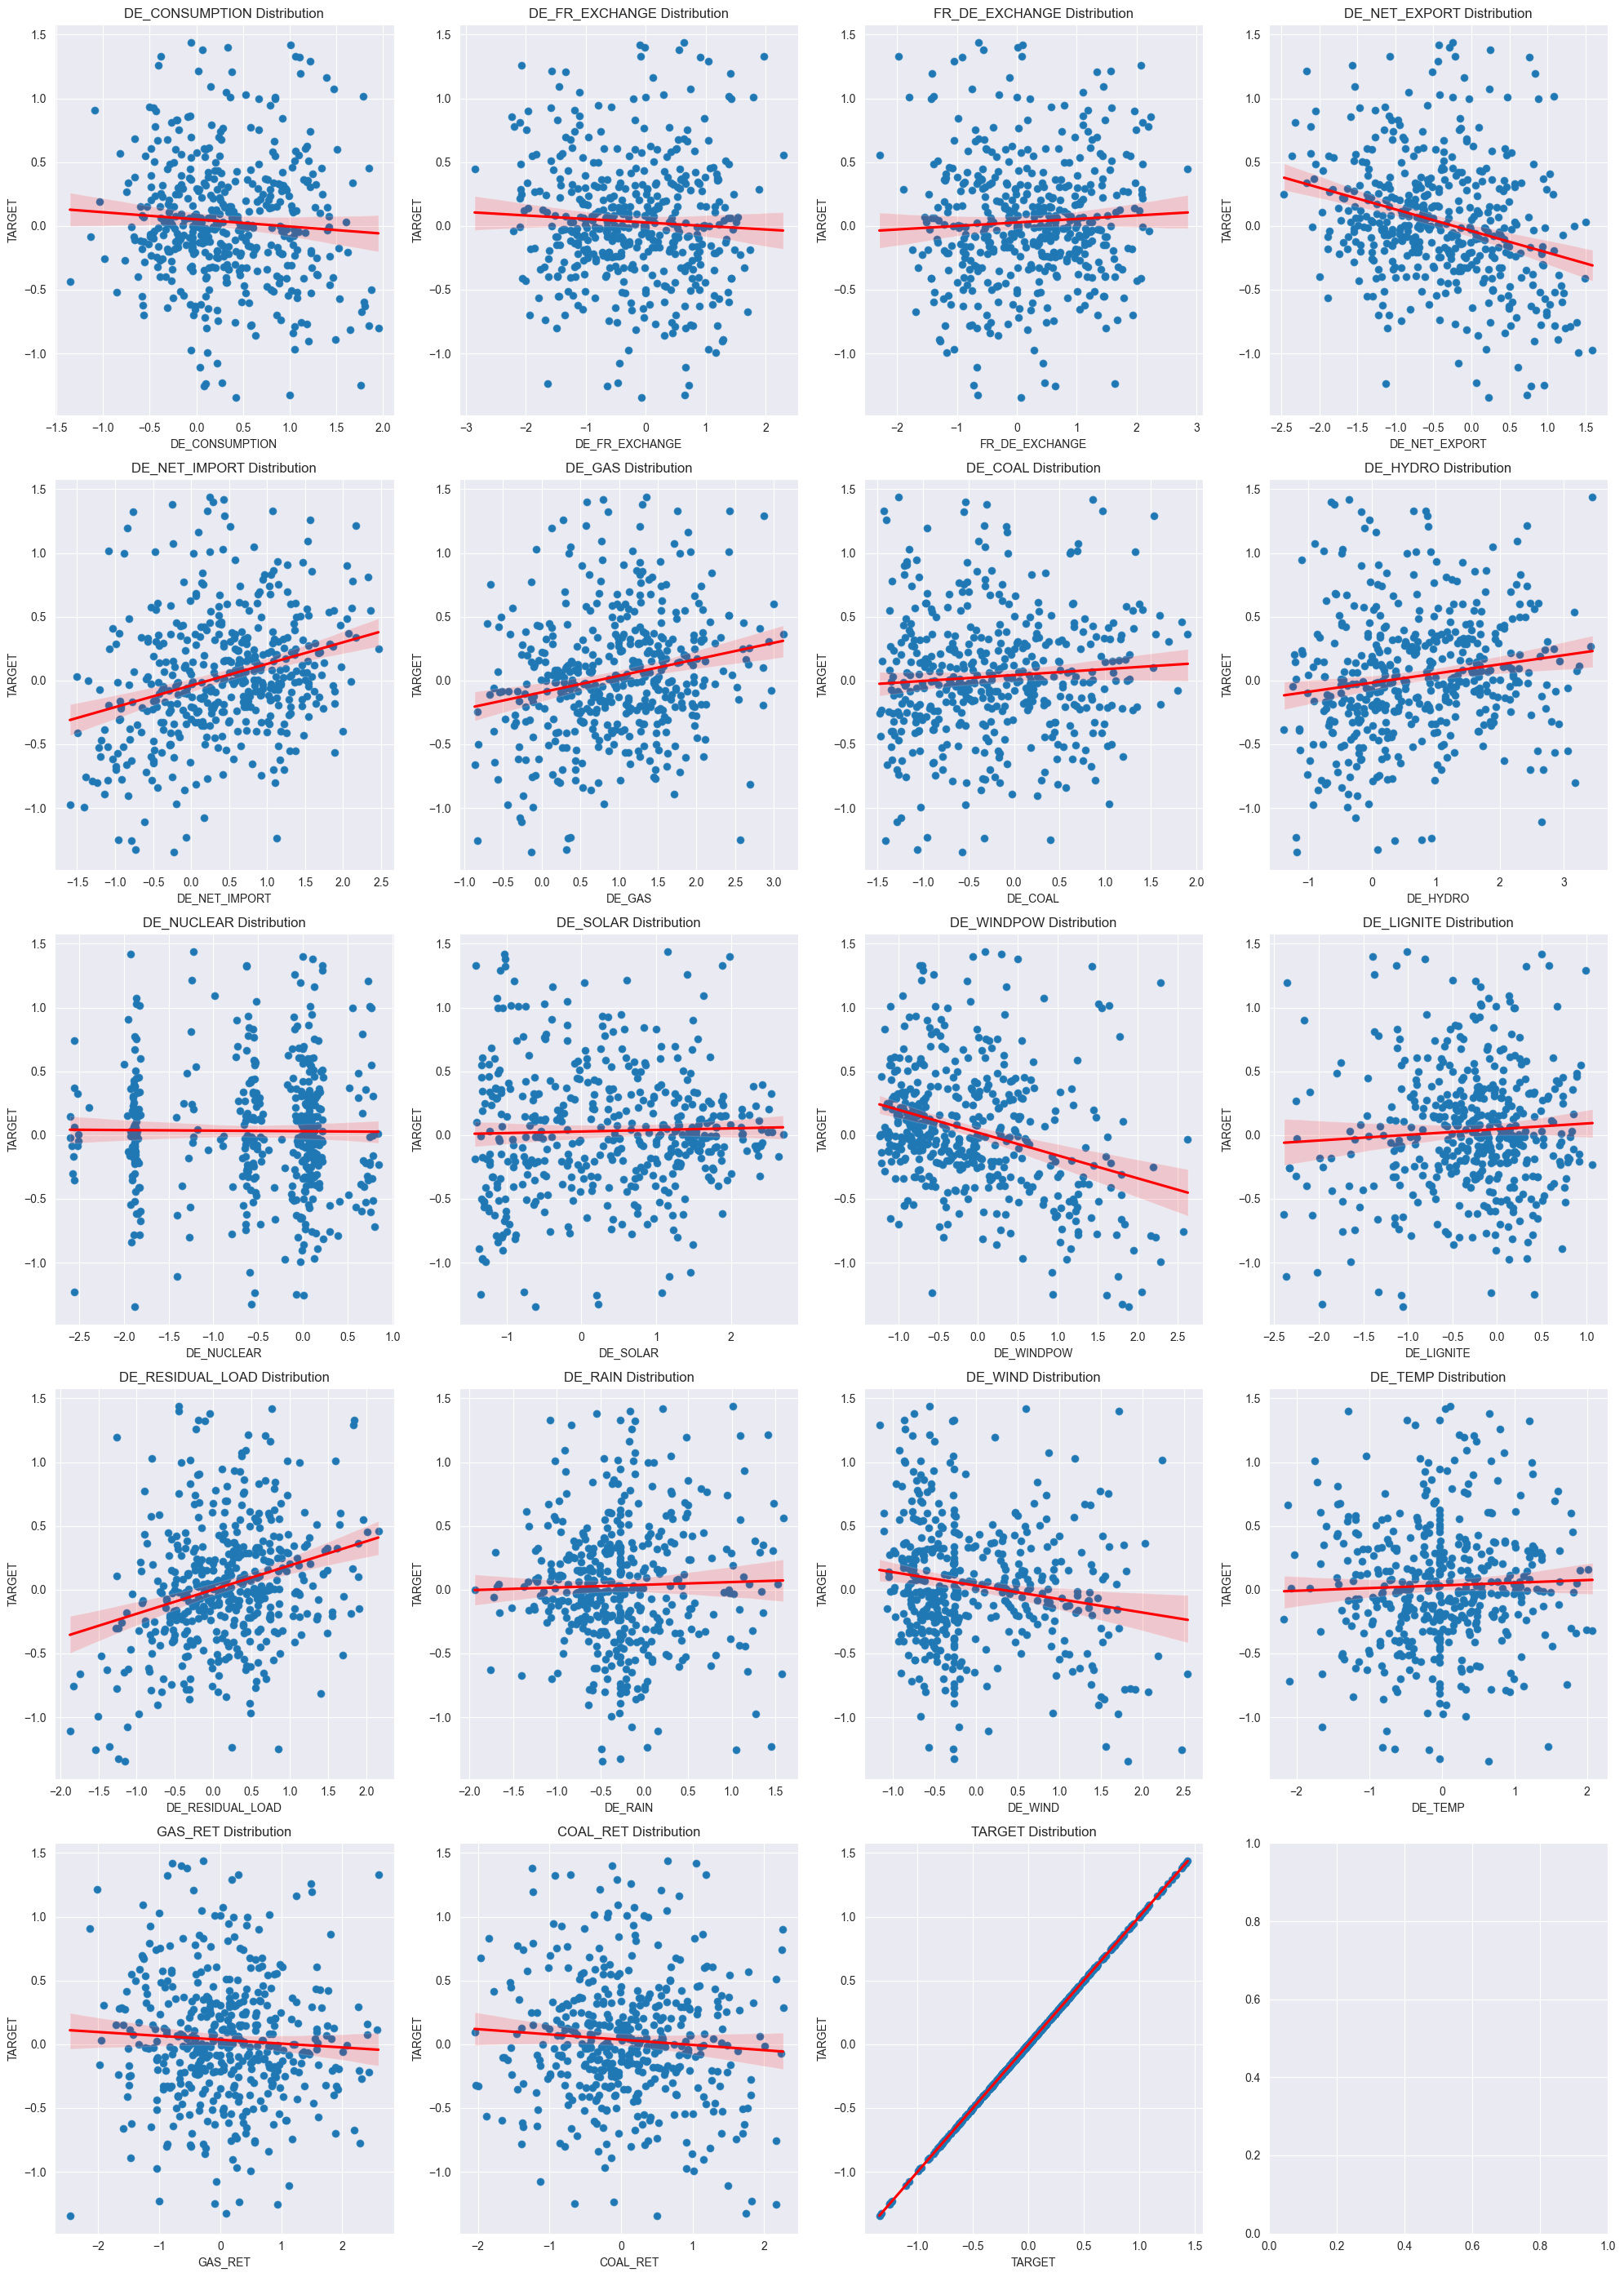

In [42]:
# POUR L'ALLEMAGNE

fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(20, 28))
for i, j in enumerate(data_DE.describe().columns):
    axes.flat[i].set_xlabel(j)
    sns.scatterplot(x=data_DE[j], y=data_DE.TARGET, ax=axes.flat[i])
    axes.flat[i].set_title(f'{j} Distribution')
    sns.regplot(x=data_DE[j], y=data_DE.TARGET, ax=axes.flat[i], line_kws={"color": "red"})

plt.tight_layout()
plt.show(block=True)

Pour l'Allemagne, à l'aide des diagrammes de dispersion on voit que les variables DE_NET_IMPORT, DE_GAS, DE_HYDRO et DE_RESIDUAL ont une relation positive avec TARGET. En effet, sur chacun des diagrammes de dispersion de ces derniers, les points se déplacent de manière ascendante de gauche à droite. De plus, on peut distinguer que des groupements de points sont assez proche de la ligne de tendance (notamment pour DE_HYDRO) ce qui implique qu'il y a bien une relation entre les variables. Cependant, sur ces diagrammes, on peut voir quelques points aberrants (notamment pour DE_GAS, DE_HYDRO et DE_NET_IMPORT). En revanche, comme ces derniers ne sont pas très nombreux, on peut quand même conclure que ces variables ont une relation avec TARGET et sont donc corrélés avec celle-ci. Il sera donc intéressant d'analyser la matrice de corrélation de l'Allemagne pour avoir plus de détails sur ces variables.

D'autres variables auraient également une relation négative avec TARGET. C'est notamment le cas de DE_NET_EXPORT et DE_WINDOW, où les points se déplacent de manière descendante de gauche à droite cette fois-ci. De plus, si nous regardons plus en détails les dispersions sur les diagrammes, on constate que pour DE_NET_EXPORT, les points sont assez proches de la ligne de tendance contrairement à DE_WINDOW où une grosse partie de ces derniers se concentre davantage vers le début de la ligne de tendance (amas de point du côté gauche du graphe). Concernant les points aberrants, les deux diagrammes en ont bien que DE_WINDOW en possèdent plus que DE_NET_EXPORT. Ici, il serait donc intéressant d'analyser la matrice de corrélation de l'Allemagne pour avoir davantage de détails sur la variable DE_NET_EXPORT ainsi que DE_WINDOW.

Enfin, le reste des variables non citées ont tout simplement un graphe qui met en évidence le fait qu'il y ait une absence de relation entre les variables. Sur le graphe de ces derniers, généralement, les points sont répartis de manière aléatoire sans suivre de tendance particulière. De plus, sur ces diagrammes, la plupart des points sont trop dispersés (trop éloigné de la droite de tendance générale). On peut prendre l'exemple de DE_NUCLEAR et de DE_SOLAR. Dans le cas de DE_NUCLEAR, on distingue que les points ne suivent pas notre droite de tendance (ligne rouge horizontale) allant jusqu'à former trois lignes verticales distinctes. Cette forme particulière implique que les points soient dispersés (éloigné de la droite de tendance) et donc qu'il y ait des valeurs aberrantes (points s'éloignant extrêmement de la tendance générale). Dans le cas de DE_SOLAR, on constate que la droite de tendance est une constante, ce qui prouve que les points sont répartis aléatoirement sur notre graphe. De plus, étant dispersés, ces points s'éloignent de la droite de tendance (droite rouge horizontale) ce qui montre qu'il y a une très faible corrélation entre les variables au mieux. On peut donc en conclure qu'ici aussi, DE_SOLAR n'a pas de relation avec TARGET.

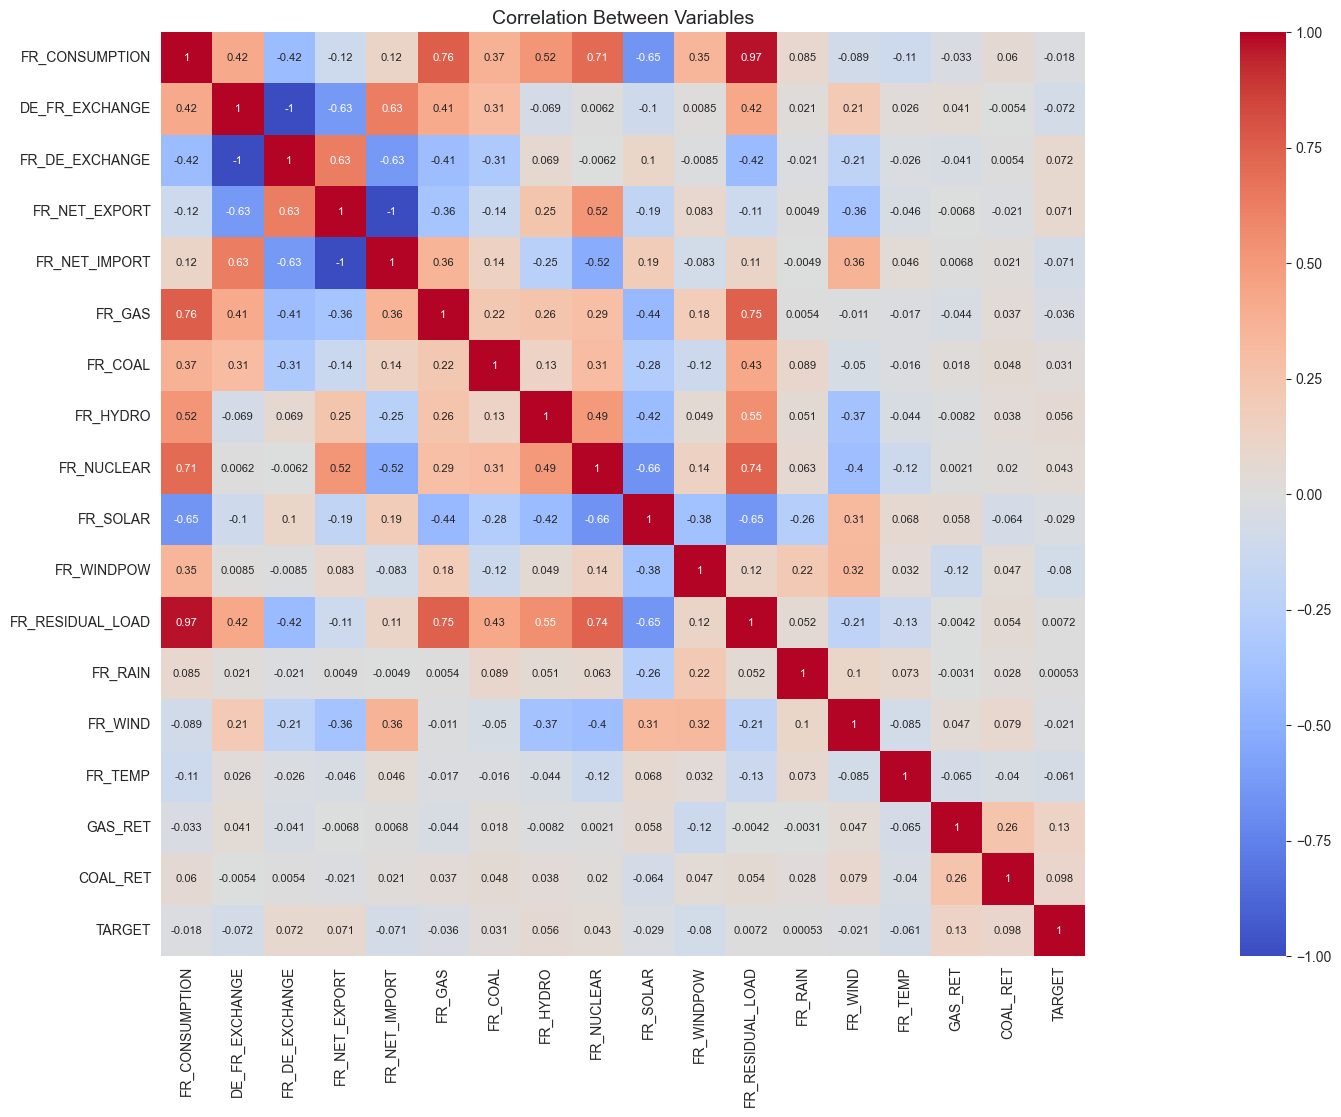

In [43]:
# MATRICE DE CORRELATION

# POUR LA FRANCE
correlation_metrics_1 = data_FR.corr()

# Créer la heatmap avec une taille plus grande, une police plus petite et une palette de couleurs adaptée
fig1 = plt.figure(figsize=(40, 12))
sns.heatmap(correlation_metrics_1, square=True, annot=True, annot_kws={"size": 8}, vmax=1, vmin=-1, cmap='coolwarm')
plt.title('Correlation Between Variables', size=14)
plt.show()

Pour la France, on aperçoit de très forte corrélation entre FR_DE_EXCHANGE et DE_FR_EXCHANGE (-1), FR_DE_EXCHANGE et FR_NET_EXPORT (0.64), FR_NET_IMPORT et FR_NET_EXPORT (-1),  FR_GAS et FR_CONSUMPTION (0.78), FR_COAL et FR_CONSUMPTION (0.56), FR_HYDRO et FR_CONSUMPTION (0.62), FR_NUCLEAR et FR_CONSUMPTION (0.72), FR_SOLAR et FR_CONSUMPTION (-0.66), FR_RESIDUAL_LOAD et FR_CONSUMPTION (0.97).

Au niveau des corrélations des variables et TARGET, nous en avons très peu les plus grandes sont dans l'ordre décroissant :

-FR_HYDRO et TARGET (0.07)
-GAS_RET et TARGET (0. 058)
-FR_NET_IMPORT et TARGET (0.042)
-FR_RESIDUAL_LOAD et TARGET (0.038)
-DE_FR_EXCHANGE et TARGET (0.034)
-FR_COAL et TARGET (0.032)
-FR_WIND et TARGET (-0.033)
-FR_TEMP et TARGET (-0.033)
-FR_DE_EXCHANGE et TARGET (-0.034)
-FR_RAIN et TARGET (-0.039)
-FR_NET_EXPORT et TARGET (-0.042)
-FR_WINDPOW et TARGET (-0.11)

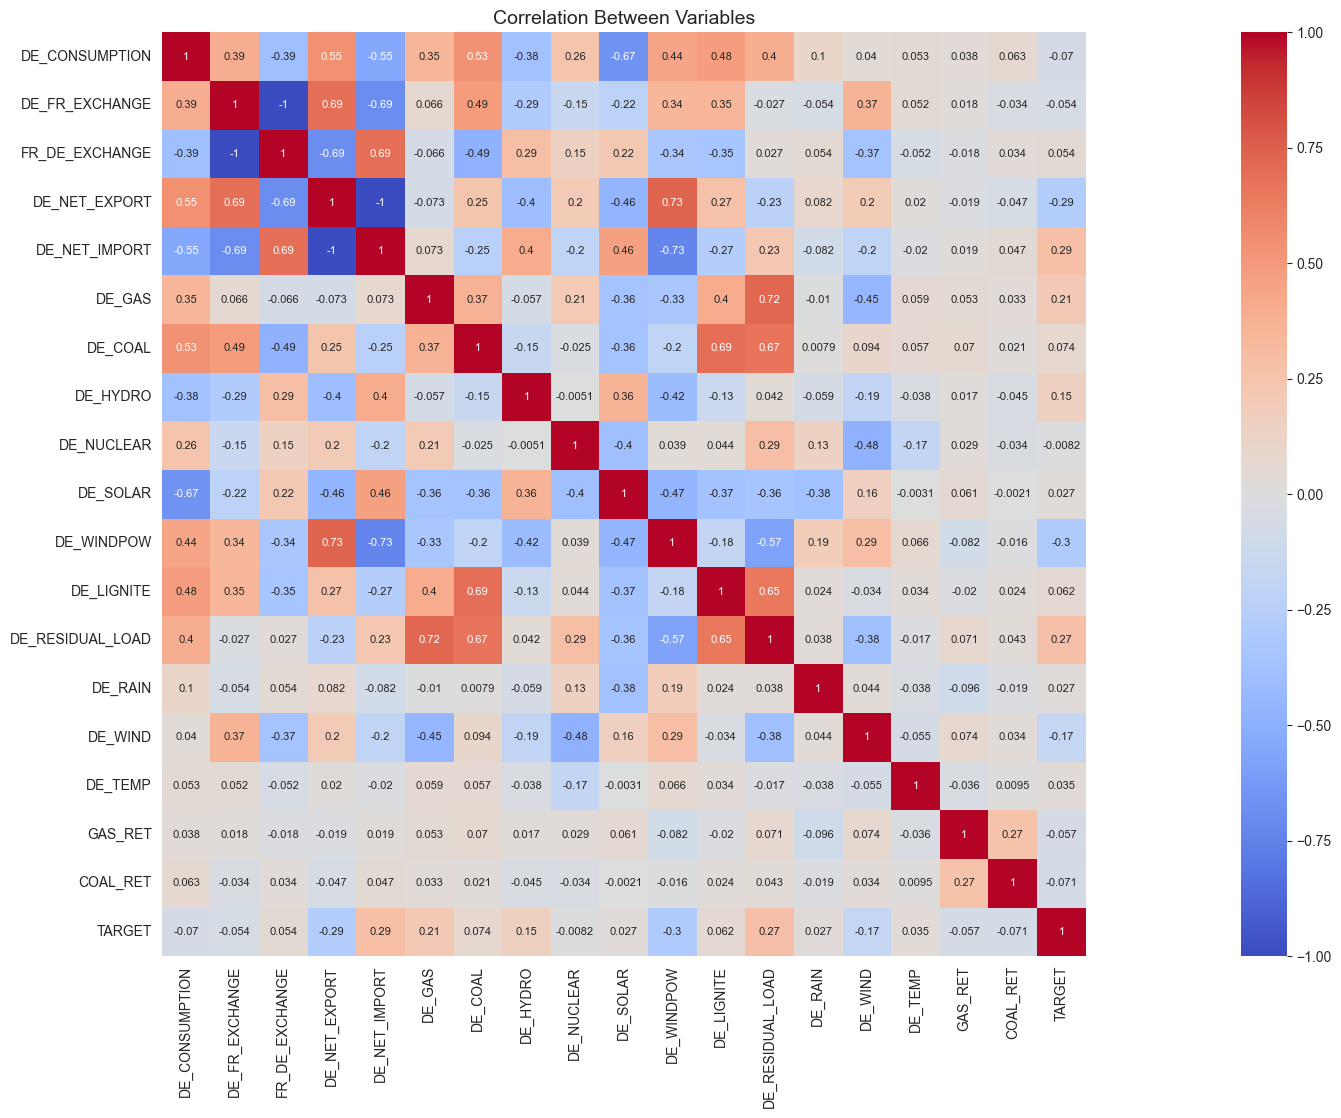

In [44]:
# POUR L'ALLEMAGNE
correlation_metrics_2 = data_DE.corr()

# Créer la heatmap avec une taille plus grande, une police plus petite et une palette de couleurs adaptée
fig2 = plt.figure(figsize=(40, 12))
sns.heatmap(correlation_metrics_2, square=True, annot=True, annot_kws={"size": 8}, vmax=1, vmin=-1, cmap='coolwarm')
plt.title('Correlation Between Variables', size=14)
plt.show()

Pour l'Allemagne, on s'aperçoit que les corrélations ne sont pas fortes, mais il y a quelque variables qui possèdent des corrélations positives plus grandes que 0 entre les différentes variables et TARGET tels que dans l'ordre décroissant :

-DE_NET_IMPORT et TARGET (0.29)
-DE_RESIDUAL_LOAD et TARGET (0.27)
-DE_GAS et TARGET (0.21)
-DE_HYDRO et TARGET (0.15)
-FR_DE_EXCHANGE et TARGET (0.054)
-DE_COAL et TARGET (0.074)
-DE_FR_EXCHANGE et TARGET (-0.054)
-DE_WIND et TARGET (-0.17)
-DE_NET_EXPORT et TARGET (-0.29)
-DE_WINDPOW et TARGET (-0.3)


Sinon, on aperçoit de très forte corrélation entre FR_DE_EXCHANGE et DE_FR_EXCHANGE (-1), DE_NET_EXPORT et DE_FR_EXCHANGE (0.69), DE_NET_IMPORT et DE_NET_EXPORT (-1), DE_SOLAR et DE_CONSUMPTION (-0.67), DE_WINDPOW et DE_NET_EXPORT (0.73), DE_RESIDUAL_LOAD et DE_GAS (0.72), DE_COAL et DE_CONSUMPTION (0.53), DE_LIGNITE et DE_COAL (0.69).

Nous avons ensuite nettoyé nos données d'entrée.

L'important ici a été de suivre 3 étapes :

1 - Lorsque deux colonnes sont très fortement corrélées entre elles, une des deux doit être supprimée.

2 - Le choix de celle à supprimer se base sur la corrélation des colonnes vis à vis de TARGET

3 - On garde la colonne la plus corrélée à TARGET. Si elles ont la même valeur de corrélation, on garde la corrélation positive.

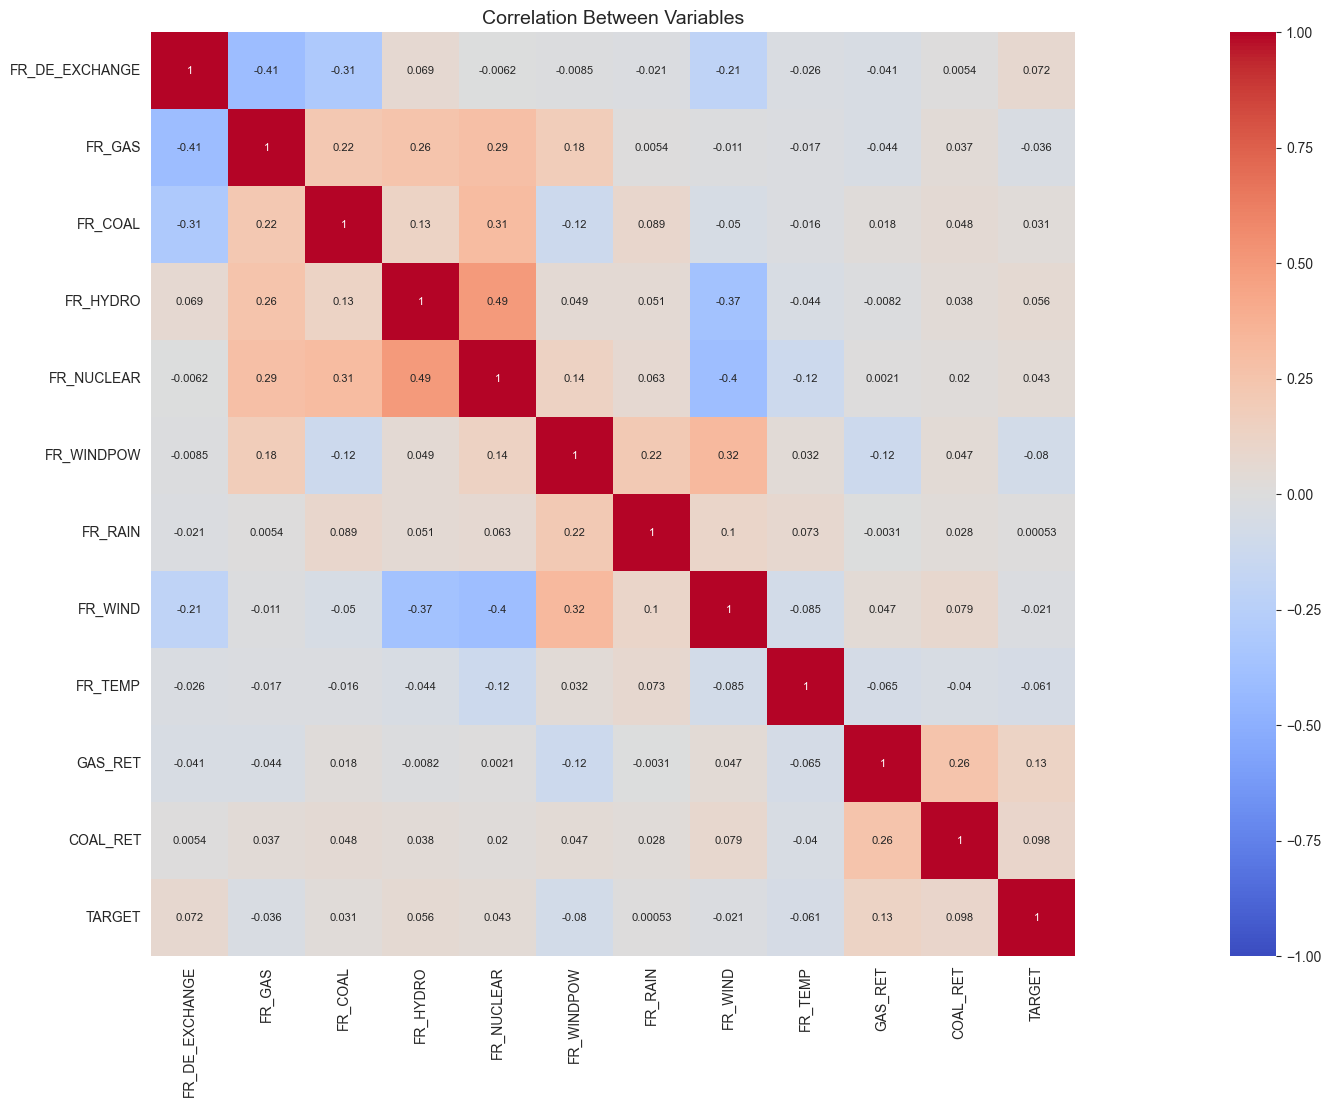

In [45]:
# Pour la France

#On supprime FR_NET_IMPORT

data_FR = data_FR.drop('FR_NET_IMPORT', axis=1)

#On supprime FR_CONSUMPTION

data_FR = data_FR.drop('FR_CONSUMPTION', axis=1)

#On supprime FR_NET_EXPORT

data_FR = data_FR.drop('FR_NET_EXPORT', axis=1)

#On supprime FR_RESIDUAL_LOAD

data_FR = data_FR.drop('FR_RESIDUAL_LOAD', axis=1)

#On supprime FR_SOLAR

data_FR = data_FR.drop('FR_SOLAR', axis=1)

#On supprime DE_FR_EXCHANGE

data_FR = data_FR.drop('DE_FR_EXCHANGE', axis=1)

# On refait la nouvelle matrice de corrélation

fig1 = plt.figure(figsize=(40, 12))
correlation_metrics_1 = data_FR.corr()
sns.heatmap(correlation_metrics_1, square=True, annot=True, annot_kws={"size": 8}, vmax=1, vmin=-1, cmap='coolwarm')
plt.title('Correlation Between Variables', size=14)
plt.show()

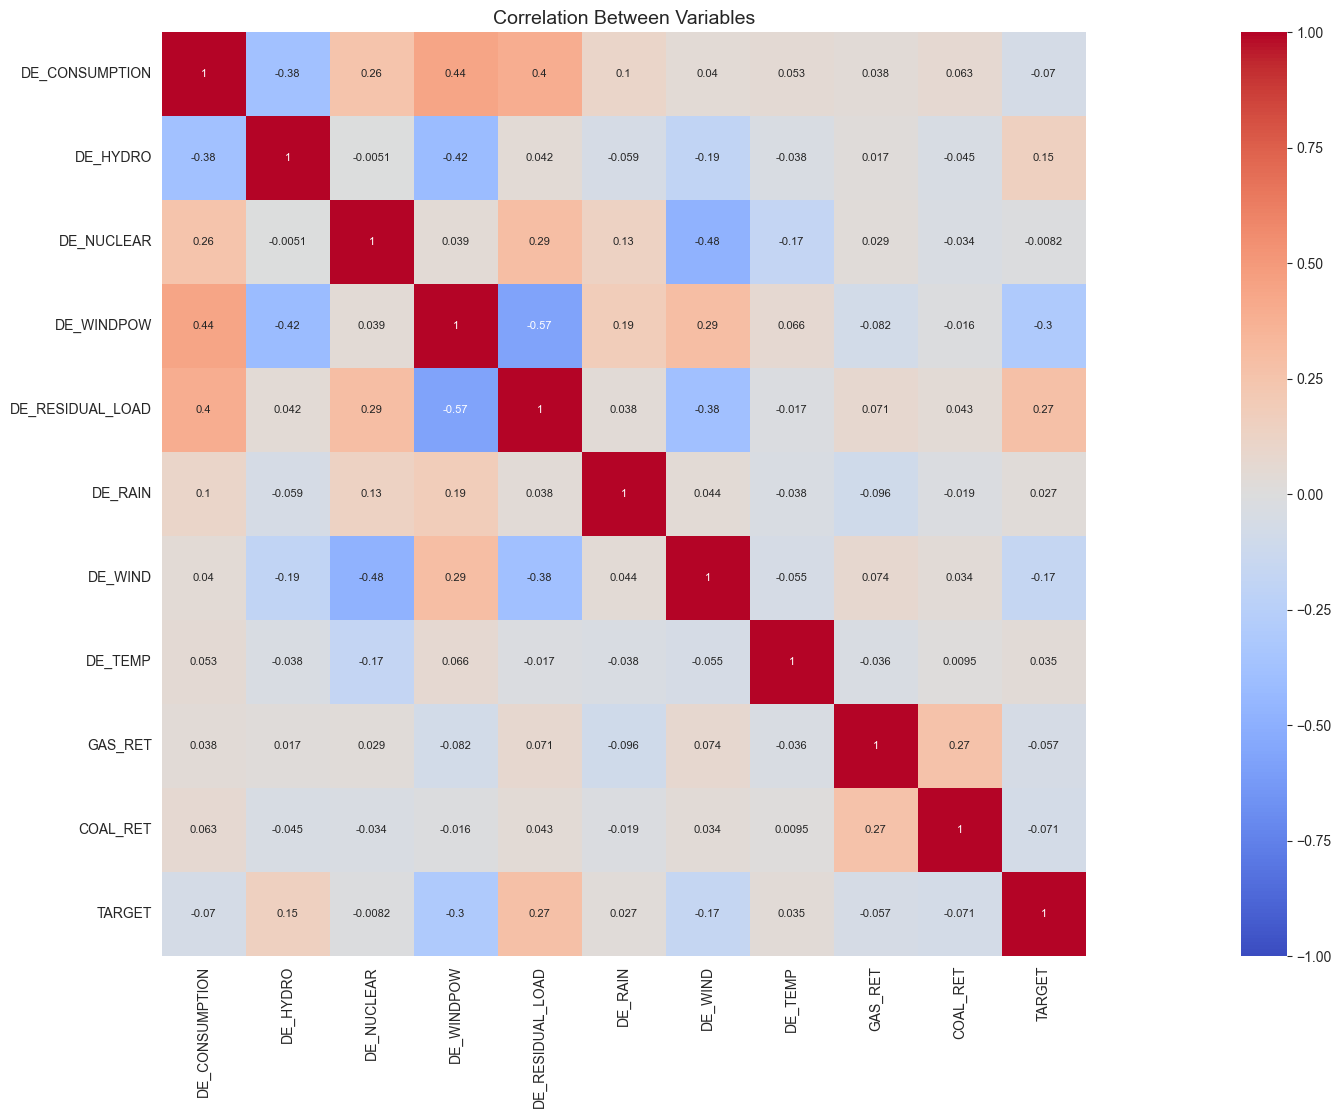

In [46]:
# Pour l'Allemagne

#On supprime DE_FR_EXCHANGE

data_DE = data_DE.drop('DE_FR_EXCHANGE', axis=1)

#On supprime DE_SOLAR

data_DE = data_DE.drop('DE_SOLAR', axis=1)

#On supprime DE_NET_EXPORT

data_DE = data_DE.drop('DE_NET_EXPORT', axis=1)

#On supprime FR_DE_EXCHANGE

data_DE = data_DE.drop('FR_DE_EXCHANGE', axis=1)

#On supprime DE_NET_IMPORT

data_DE = data_DE.drop('DE_NET_IMPORT', axis=1)

#On supprime DE_GAS

data_DE = data_DE.drop('DE_GAS', axis=1)

#On supprime DE_LIGNITE

data_DE = data_DE.drop('DE_LIGNITE', axis=1)

#On supprime DE_COAL

data_DE = data_DE.drop('DE_COAL', axis=1)

# On refait la nouvelle matrice de corrélation

fig1 = plt.figure(figsize=(40, 12))
correlation_metrics_2 = data_DE.corr()
sns.heatmap(correlation_metrics_2, square=True, annot=True, annot_kws={"size": 8}, vmax=1, vmin=-1, cmap='coolwarm')
plt.title('Correlation Between Variables', size=14)
plt.show()

C) Modélisation des données

La régression linéaire est une méthode de machine learning pour trouver la relation entre une variable appelée la variable cible et une ou plusieurs variables appelées les variables indépendantes (ou les variables explicatives). Cette méthode suppose que la relation entre les variables est linéaire, c'est-à-dire que la variable dépendante peut être exprimée comme une combinaison linéaire des variables indépendantes.

Le but de la régression linéaire est de trouver la droite qui représente au mieux la relation entre les variables.

La corrélation de Spearman moyenne est : 0.112
Moyenne des scores R2 obtenus : -0.85%
Meilleur score R2 obtenu : 3.45%


Score du modèle de régression : 3.45%
MSE : 0.05
RMSE : 0.23
R^2 : 0.03


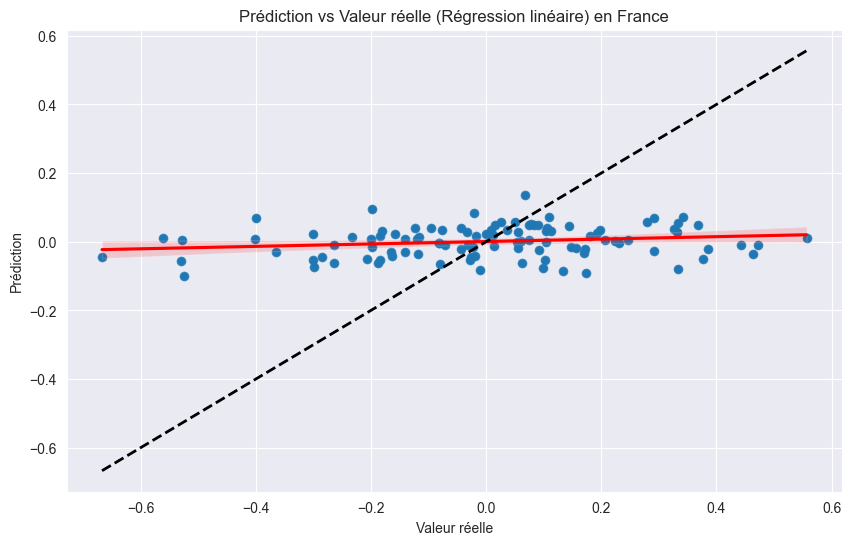

In [47]:
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from scipy.stats import spearmanr
from sklearn.metrics import r2_score

# REGRESSION LINEAIRE

# POUR LA FRANCE

FR_X_LR = data_FR.drop('TARGET', axis=1)
FR_Y_LR = data_FR['TARGET']


"""
# Création des poids basés sur les corrélations avec la variable cible
correlation_with_target = correlation_metrics_2['TARGET'].abs()
variable_weights = correlation_with_target[selected_variables]
variable_weights /= variable_weights.sum()

# Appliquer les poids aux variables
X_weighted = X * variable_weights

"""

# Répétition du processus avec différentes valeurs de random_state pour les clusters=
scores_R2 = []
scores_SPR = []
random_state_values_done = []

for random_state_train_test in range(20):

    # Séparation des données train/test avec un unique random_state
    X_train, X_test, Y_train, Y_test = train_test_split(FR_X_LR, FR_Y_LR, test_size=0.2, random_state=random_state_train_test)

    regression_model = LinearRegression()
    regression_model.fit(X_train, Y_train)

    Y_pred = regression_model.predict(X_test)
    accuracy = regression_model.score(X_test, Y_test)

    # Calculer la corrélation de Spearman entre les prédictions et les vraies valeurs de la variable cible
    spearman_corr, _ = spearmanr(Y_pred, Y_test)



    scores_R2.append(accuracy)
    scores_SPR.append(spearman_corr)
    random_state_values_done.append(random_state_train_test)

# Calcul de la moyenne des scores
mean_score_R2 = np.mean(scores_R2)

# Affichage des résultats
best_index = np.argmax(scores_R2)
best_test_random_state = random_state_values_done[best_index]

# Afficher la corrélation de Spearman
print('La corrélation de Spearman moyenne est : {:.3f}'.format(np.mean(scores_SPR)))
print("Moyenne des scores R2 obtenus : {:.2f}%".format(mean_score_R2 * 100))
print("Meilleur score R2 obtenu : {:.2f}%".format(max(scores_R2) * 100))

X_train, X_test, Y_train, Y_test = train_test_split(FR_X_LR, FR_Y_LR, test_size=0.2, random_state=best_test_random_state)

regression_model = LinearRegression()
regression_model.fit(X_train, Y_train)

Y_pred = regression_model.predict(X_test)
accuracy = regression_model.score(X_test, Y_test)
mse = mean_squared_error(Y_test, Y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(Y_test, Y_pred)

# Affichage des résultats
print("\n\nScore du modèle de régression : {:.2f}%".format(accuracy * 100))
print("MSE : {:.2f}".format(mse))
print("RMSE : {:.2f}".format(rmse))
print("R^2 : {:.2f}".format(r2))

plt.figure(figsize=(10, 6))
sns.scatterplot(x=Y_test.values.flatten(), y=Y_pred.flatten())
sns.regplot(x=Y_test.values.flatten(), y=Y_pred.flatten()   , line_kws={"color": "red"})
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'k--', lw=2)
plt.xlabel('Valeur réelle')
plt.ylabel('Prédiction')
plt.title('Prédiction vs Valeur réelle (Régression linéaire) en France')
plt.show()

La corrélation de Spearman moyenne est : 0.304
Moyenne des scores R2 obtenus : 7.23%
Meilleur score R2 obtenu : 21.97%


Score du modèle de régression : 21.97%
MSE : 0.20
RMSE : 0.45
R^2 : 0.22


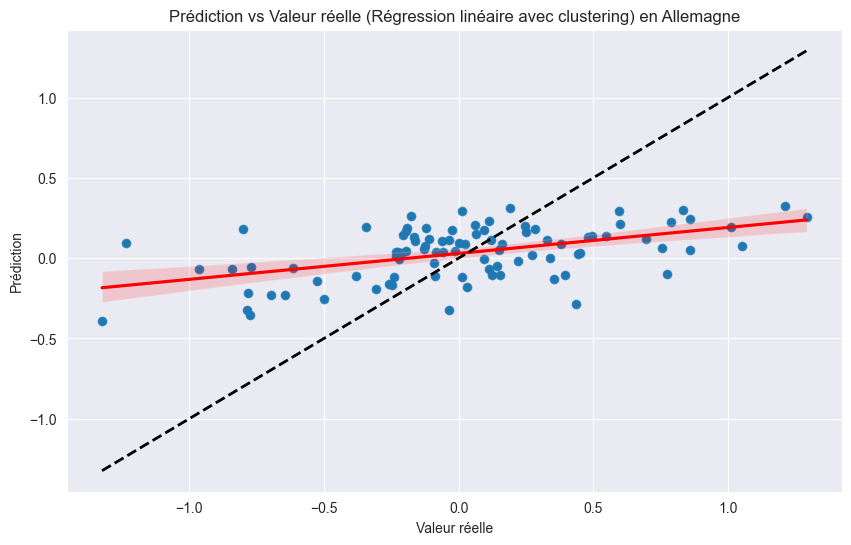

In [48]:
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# REGRESSION LINEAIRE

# POUR L'ALLEMAGNE

DE_X_LR = data_DE.drop('TARGET', axis=1)
DE_Y_LR = data_DE['TARGET']

"""

# Création des poids basés sur les corrélations avec la variable cible
correlation_with_target = correlation_metrics_2['TARGET'].abs()
variable_weights = correlation_with_target[selected_variables]
variable_weights /= variable_weights.sum()

# Appliquer les poids aux variables
X_weighted = X * variable_weights

"""

# Répétition du processus avec différentes valeurs de random_state pour les clusters=
scores_R2 = []
scores_SPR = []
random_state_values_done = []

for random_state_train_test in range(20):

    # Séparation des données train/test avec un unique random_state
    X_train, X_test, Y_train, Y_test = train_test_split(DE_X_LR, DE_Y_LR, test_size=0.2, random_state=random_state_train_test)

    regression_model = LinearRegression()
    regression_model.fit(X_train, Y_train)

    Y_pred = regression_model.predict(X_test)
    accuracy = regression_model.score(X_test, Y_test)

    # Calculer la corrélation de Spearman entre les prédictions et les vraies valeurs de la variable cible
    spearman_corr, _ = spearmanr(Y_pred, Y_test)



    scores_R2.append(accuracy)
    scores_SPR.append(spearman_corr)
    random_state_values_done.append(random_state_train_test)

# Calcul de la moyenne des scores
mean_score_R2 = np.mean(scores_R2)

# Affichage des résultats
best_index = np.argmax(scores_R2)
best_test_random_state = random_state_values_done[best_index]

# Afficher la corrélation de Spearman
print('La corrélation de Spearman moyenne est : {:.3f}'.format(np.mean(scores_SPR)))
print("Moyenne des scores R2 obtenus : {:.2f}%".format(mean_score_R2 * 100))
print("Meilleur score R2 obtenu : {:.2f}%".format(max(scores_R2) * 100))

X_train, X_test, Y_train, Y_test = train_test_split(DE_X_LR, DE_Y_LR, test_size=0.2, random_state=best_test_random_state)

regression_model = LinearRegression()
regression_model.fit(X_train, Y_train)

Y_pred = regression_model.predict(X_test)
accuracy = regression_model.score(X_test, Y_test)
mse = mean_squared_error(Y_test, Y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(Y_test, Y_pred)

# Affichage des résultats
print("\n\nScore du modèle de régression : {:.2f}%".format(accuracy * 100))
print("MSE : {:.2f}".format(mse))
print("RMSE : {:.2f}".format(rmse))
print("R^2 : {:.2f}".format(r2))

plt.figure(figsize=(10, 6))
sns.scatterplot(x=Y_test.values.flatten(), y=Y_pred.flatten())
sns.regplot(x=Y_test.values.flatten(), y=Y_pred.flatten()   , line_kws={"color": "red"})
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'k--', lw=2)
plt.xlabel('Valeur réelle')
plt.ylabel('Prédiction')
plt.title('Prédiction vs Valeur réelle (Régression linéaire avec clustering) en Allemagne')
plt.show()

La régression ridge est une méthode de régression linéaire qui vise à réduire la variance du modèle en ajoutant une pénalité (appelée régularisation) aux coefficients de régression. Cette pénalité est contrôlée par un hyperparamètre appelé alpha, qui peut être ajusté pour trouver le meilleur compromis entre ajustement aux données et généralisation à de nouvelles données.

En ajoutant une pénalité aux coefficients, la régression ridge peut réduire le risque d'overfitting, c'est-à-dire le risque de créer un modèle qui est trop complexe et qui s'adapte trop étroitement aux données d'entraînement. Cela peut améliorer les performances de prédiction du modèle sur de nouvelles données.

Afin de savoir quel alpha prendre lors des algorithmes de régression linéaire régularisée, on crée un algorithme qui va tester l'algorithme ridge sur différentes valeurs d'alpha.

In [49]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score

# RECHERCHE D'ALPHA POUR RIDGE

# POUR LA FRANCE

# Séparation des features (X) de la target (y)
FR_X_AlphaRidge = data_FR.drop('TARGET', axis=1)
FR_Y_AlphaRidge = data_FR['TARGET']

# Normalisation des features en utilisant StandardScaler
scaler = StandardScaler()
FR_X_AlphaRidge = scaler.fit_transform(FR_X_AlphaRidge)

for alpha in [0.001, 0.01, 0.1, 1.0, 1.5, 2.0, 5.0, 10.0, 15.0, 50.0, 100.0, 150.0, 250.0, 500.0, 1000.0]:
    score = []
    for i in range(30):

        # Split du dataset en jeu d'entraînement et jeu de test
        X_train, X_test, y_train, y_test = train_test_split(FR_X_AlphaRidge, FR_Y_AlphaRidge, test_size=0.2, random_state=i)

        # Régression Ridge avec différentes valeurs d'alpha

        # Initialisation de l'objet Ridge avec l'alpha courant
        rid = Ridge(alpha=alpha)
        # Entraînement du modèle sur le jeu d'entraînement
        rid.fit(X_train, y_train)
        # Prédiction des valeurs pour le jeu de test
        y_pred = rid.predict(X_test)

        score.append(r2_score(y_test, y_pred))

    print("Alpha : ",alpha)
    print("Moyenne du score R2: ",np.mean(score))

Alpha :  0.001
Moyenne du score R2:  -0.002676400824978242
Alpha :  0.01
Moyenne du score R2:  -0.00267498013504663
Alpha :  0.1
Moyenne du score R2:  -0.0026607838384270573
Alpha :  1.0
Moyenne du score R2:  -0.0025198734033143916
Alpha :  1.5
Moyenne du score R2:  -0.0024424077712326317
Alpha :  2.0
Moyenne du score R2:  -0.0023655183484228275
Alpha :  5.0
Moyenne du score R2:  -0.0019159401755924343
Alpha :  10.0
Moyenne du score R2:  -0.001208850020595383
Alpha :  15.0
Moyenne du score R2:  -0.0005500405271973004
Alpha :  50.0
Moyenne du score R2:  0.0030279696813493517
Alpha :  100.0
Moyenne du score R2:  0.006149781088561509
Alpha :  150.0
Moyenne du score R2:  0.007981707224706052
Alpha :  250.0
Moyenne du score R2:  0.009707576442004465
Alpha :  500.0
Moyenne du score R2:  0.009935875382740626
Alpha :  1000.0
Moyenne du score R2:  0.0073744162669283665


Nous prenons la valeur de l'alpha qui permet un R2 score le plus élevé. Pour la France, nous avons alpha = 500.0.

In [50]:
# RECHERCHE D'ALPHA POUR RIDGE

# POUR L'ALLEMAGNE

# Séparation des features (X) de la target (y)
DE_X_AlphaRidge = data_DE.drop('TARGET', axis=1)
DE_Y_AlphaRidge = data_DE['TARGET']

# Normalisation des features en utilisant StandardScaler
scaler = StandardScaler()
DE_X_AlphaRidge = scaler.fit_transform(DE_X_AlphaRidge)

for alpha in [0.001, 0.01, 0.1, 1.0, 1.5, 2.0, 5.0, 10.0, 15.0, 50.0, 100.0, 150.0, 250.0]:
    score = []
    for i in range(30):

        # Split du dataset en jeu d'entraînement et jeu de test
        X_train, X_test, y_train, y_test = train_test_split(DE_X_AlphaRidge, DE_Y_AlphaRidge, test_size=0.2, random_state=i)

        # Régression Ridge avec différentes valeurs d'alpha

        # Initialisation de l'objet Ridge avec l'alpha courant
        rid = Ridge(alpha=alpha)
        # Entraînement du modèle sur le jeu d'entraînement
        rid.fit(X_train, y_train)
        # Prédiction des valeurs pour le jeu de test
        y_pred = rid.predict(X_test)

        score.append(r2_score(y_test, y_pred))

    print("Alpha : ",alpha)
    print("Moyenne du score R2 : ",np.mean(score))

Alpha :  0.001
Moyenne du score R2 :  0.08420394741282128
Alpha :  0.01
Moyenne du score R2 :  0.08420824770591648
Alpha :  0.1
Moyenne du score R2 :  0.08425096811789085
Alpha :  1.0
Moyenne du score R2 :  0.0846523226533675
Alpha :  1.5
Moyenne du score R2 :  0.08485746036254967
Alpha :  2.0
Moyenne du score R2 :  0.08505175601320521
Alpha :  5.0
Moyenne du score R2 :  0.08604738882946775
Alpha :  10.0
Moyenne du score R2 :  0.08731846333135546
Alpha :  15.0
Moyenne du score R2 :  0.08833377370406258
Alpha :  50.0
Moyenne du score R2 :  0.09276397398063593
Alpha :  100.0
Moyenne du score R2 :  0.09549990034265558
Alpha :  150.0
Moyenne du score R2 :  0.09612406701192523
Alpha :  250.0
Moyenne du score R2 :  0.09435577506709719


Pour l'Allemagne, nous avons alpha = 150 pour le meilleur résultat.

La corrélation de Spearman moyenne est : 0.142
Moyenne des scores R2 obtenus : 0.88%
Meilleur score R2 obtenu : 3.24%


Score du modèle de régression : 3.24%
MSE : 0.05
RMSE : 0.23
R^2 : 0.03


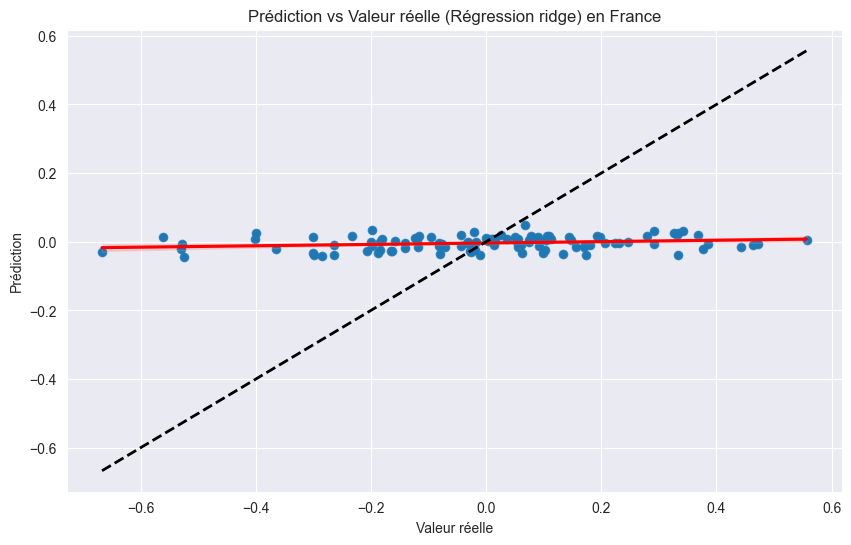

In [51]:
import matplotlib.pyplot as plt

# REGRESSION RIDGE

# POUR LA FRANCE

# Sélection des variables qui nous intéressent
FR_X_RR = data_FR.drop('TARGET', axis=1)
FR_Y_RR = data_FR['TARGET']

"""
# Création des poids basés sur les corrélations avec la variable cible
correlation_with_target = correlation_metrics_2['TARGET'].abs()
variable_weights = correlation_with_target[selected_variables]
variable_weights /= variable_weights.sum()

# Appliquer les poids aux variables
X_weighted = X * variable_weights
"""

# Répétition du processus avec différentes valeurs de random_state pour les clusters=
scores_R2 = []
scores_SPR = []
random_state_values_done = []

for random_state_train_test in range(20):

    # Séparation des données train/test avec un unique random_state
    X_train, X_test, Y_train, Y_test = train_test_split(FR_X_RR, FR_Y_RR, test_size=0.2, random_state=random_state_train_test)

    regression_model = Ridge(alpha=500)
    regression_model.fit(X_train, Y_train)

    Y_pred = regression_model.predict(X_test)
    accuracy = regression_model.score(X_test, Y_test)

    # Calculer la corrélation de Spearman entre les prédictions et les vraies valeurs de la variable cible
    spearman_corr, _ = spearmanr(Y_pred, Y_test)



    scores_R2.append(accuracy)
    scores_SPR.append(spearman_corr)
    random_state_values_done.append(random_state_train_test)

# Calcul de la moyenne des scores
mean_score_R2 = np.mean(scores_R2)

# Affichage des résultats
best_index = np.argmax(scores_R2)
best_test_random_state = random_state_values_done[best_index]

# Afficher la corrélation de Spearman
print('La corrélation de Spearman moyenne est : {:.3f}'.format(np.mean(scores_SPR)))
print("Moyenne des scores R2 obtenus : {:.2f}%".format(mean_score_R2 * 100))
print("Meilleur score R2 obtenu : {:.2f}%".format(max(scores_R2) * 100))


X_train, X_test, Y_train, Y_test = train_test_split(FR_X_RR, FR_Y_RR, test_size=0.2, random_state=best_test_random_state)

regression_model = Ridge(alpha=500)
regression_model.fit(X_train, Y_train)

Y_pred = regression_model.predict(X_test)
accuracy = regression_model.score(X_test, Y_test)
mse = mean_squared_error(Y_test, Y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(Y_test, Y_pred)

# Affichage des résultats
print("\n\nScore du modèle de régression : {:.2f}%".format(accuracy * 100))
print("MSE : {:.2f}".format(mse))
print("RMSE : {:.2f}".format(rmse))
print("R^2 : {:.2f}".format(r2))

plt.figure(figsize=(10, 6))
sns.scatterplot(x=Y_test.values.flatten(), y=Y_pred.flatten())
sns.regplot(x=Y_test.values.flatten(), y=Y_pred.flatten()   , line_kws={"color": "red"})
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'k--', lw=2)
plt.xlabel('Valeur réelle')
plt.ylabel('Prédiction')
plt.title('Prédiction vs Valeur réelle (Régression ridge) en France')
plt.show()

La corrélation de Spearman moyenne est : 0.312
Moyenne des scores R2 obtenus : 8.58%
Meilleur score R2 obtenu : 17.85%


Score du modèle de régression : 17.85%
MSE : 0.21
RMSE : 0.46
R^2 : 0.18


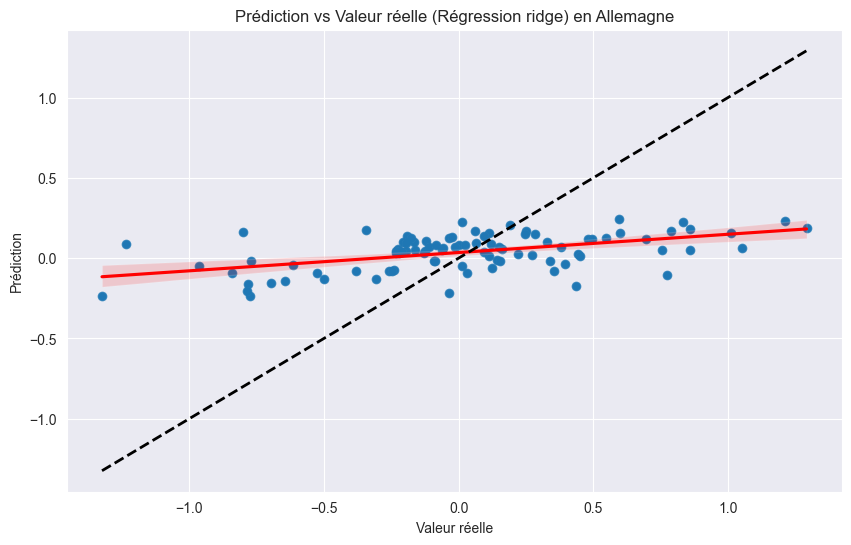

In [52]:
# REGRESSION RIDGE

# POUR L'ALLEMAGNE

# Sélection des variables qui nous intéressent
DE_X_RR = data_DE.drop('TARGET', axis=1)
DE_Y_RR = data_DE['TARGET']

"""
# Création des poids basés sur les corrélations avec la variable cible
correlation_with_target = correlation_metrics_2['TARGET'].abs()
variable_weights = correlation_with_target[selected_variables]
variable_weights /= variable_weights.sum()

# Appliquer les poids aux variables
X_weighted = X * variable_weights
"""

# Répétition du processus avec différentes valeurs de random_state pour les clusters=
scores_R2 = []
scores_SPR = []
random_state_values_done = []

for random_state_train_test in range(20):

    # Séparation des données train/test avec un unique random_state
    X_train, X_test, Y_train, Y_test = train_test_split(DE_X_RR, DE_Y_RR, test_size=0.2, random_state=random_state_train_test)

    regression_model = Ridge(alpha=150)
    regression_model.fit(X_train, Y_train)

    Y_pred = regression_model.predict(X_test)
    accuracy = regression_model.score(X_test, Y_test)

    # Calculer la corrélation de Spearman entre les prédictions et les vraies valeurs de la variable cible
    spearman_corr, _ = spearmanr(Y_pred, Y_test)



    scores_R2.append(accuracy)
    scores_SPR.append(spearman_corr)
    random_state_values_done.append(random_state_train_test)

# Calcul de la moyenne des scores
mean_score_R2 = np.mean(scores_R2)

# Affichage des résultats
best_index = np.argmax(scores_R2)
best_test_random_state = random_state_values_done[best_index]

# Afficher la corrélation de Spearman
print('La corrélation de Spearman moyenne est : {:.3f}'.format(np.mean(scores_SPR)))
print("Moyenne des scores R2 obtenus : {:.2f}%".format(mean_score_R2 * 100))
print("Meilleur score R2 obtenu : {:.2f}%".format(max(scores_R2) * 100))


X_train, X_test, Y_train, Y_test = train_test_split(DE_X_RR, DE_Y_RR, test_size=0.2, random_state=best_test_random_state)

regression_model = Ridge(alpha=150)
regression_model.fit(X_train, Y_train)

Y_pred = regression_model.predict(X_test)
accuracy = regression_model.score(X_test, Y_test)
mse = mean_squared_error(Y_test, Y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(Y_test, Y_pred)

# Affichage des résultats
print("\n\nScore du modèle de régression : {:.2f}%".format(accuracy * 100))
print("MSE : {:.2f}".format(mse))
print("RMSE : {:.2f}".format(rmse))
print("R^2 : {:.2f}".format(r2))

plt.figure(figsize=(10, 6))
sns.scatterplot(x=Y_test.values.flatten(), y=Y_pred.flatten())
sns.regplot(x=Y_test.values.flatten(), y=Y_pred.flatten()   , line_kws={"color": "red"})
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'k--', lw=2)
plt.xlabel('Valeur réelle')
plt.ylabel('Prédiction')
plt.title('Prédiction vs Valeur réelle (Régression ridge) en Allemagne')
plt.show()

Il est possible d'avoir un mauvais coefficient de ridge en même temps que d'avoir des points alignés selon la ligne régression.
En effet, la ligne de régression peut être influencée par des valeurs aberrantes ou des points qui sont très proches les uns des autres. Dans ce cas, la ligne de régression peut sembler bien alignée sur les données, mais cela ne signifie pas nécessairement que le modèle est bon ou que les coefficients de Ridge sont optimaux.

La régression Lasso est une technique de régression linéaire qui permet de sélectionner les variables les plus pertinentes pour prédire une variable cible. Elle fonctionne en ajoutant une pénalité à la somme des valeurs absolues des coefficients de la régression. Cette pénalité contraint les coefficients à être proches de zéro et permet donc de réduire le nombre de variables qui ont un impact négligeable sur la prédiction de la variable cible.

La régression Lasso est particulièrement utile dans des situations où il y a un grand nombre de variables explicatives potentielles, dont certaines sont redondantes ou peu informatives. Elle permet ainsi de réduire le nombre de variables à inclure dans le modèle final, ce qui peut améliorer la précision des prédictions et faciliter l'interprétation du modèle.

In [53]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score

# RECHERCHE D'ALPHA POUR LASSO

# POUR LA FRANCE

# Séparation des features (X) de la target (y)
FR_X_AlphaLasso = data_FR.drop('TARGET', axis=1)
FR_Y_AlphaLasso = data_FR['TARGET']

# Normalisation des features en utilisant StandardScaler
scaler = StandardScaler()
FR_X_AlphaLasso = scaler.fit_transform(FR_X_AlphaLasso)

for alpha in [0.001, 0.01, 0.1, 1.0, 1.5, 2.0, 5.0, 10.0, 15.0, 50.0, 100.0, 150.0, 250.0, 500.0, 1000.0]:
    score = []
    for i in range(30):

        # Split du dataset en jeu d'entraînement et jeu de test
        X_train, X_test, y_train, y_test = train_test_split(FR_X_AlphaLasso, FR_Y_AlphaLasso, test_size=0.2, random_state=i)

        # Régression Ridge avec différentes valeurs d'alpha

        # Initialisation de l'objet Ridge avec l'alpha courant
        rid = Lasso(alpha=alpha)
        # Entraînement du modèle sur le jeu d'entraînement
        rid.fit(X_train, y_train)
        # Prédiction des valeurs pour le jeu de test
        y_pred = rid.predict(X_test)

        score.append(r2_score(y_test, y_pred))

    print("Alpha : ",alpha)
    print("Moyenne du score R2: ",np.mean(score))

Alpha :  0.001
Moyenne du score R2:  -0.00013099602044560992
Alpha :  0.01
Moyenne du score R2:  0.004824559446114437
Alpha :  0.1
Moyenne du score R2:  -0.0059752140845718525
Alpha :  1.0
Moyenne du score R2:  -0.0059752140845718525
Alpha :  1.5
Moyenne du score R2:  -0.0059752140845718525
Alpha :  2.0
Moyenne du score R2:  -0.0059752140845718525
Alpha :  5.0
Moyenne du score R2:  -0.0059752140845718525
Alpha :  10.0
Moyenne du score R2:  -0.0059752140845718525
Alpha :  15.0
Moyenne du score R2:  -0.0059752140845718525
Alpha :  50.0
Moyenne du score R2:  -0.0059752140845718525
Alpha :  100.0
Moyenne du score R2:  -0.0059752140845718525
Alpha :  150.0
Moyenne du score R2:  -0.0059752140845718525
Alpha :  250.0
Moyenne du score R2:  -0.0059752140845718525
Alpha :  500.0
Moyenne du score R2:  -0.0059752140845718525
Alpha :  1000.0
Moyenne du score R2:  -0.0059752140845718525


Notre alpha idéal pour la France est donc alpha = 0.1



In [54]:
# RECHERCHE D'ALPHA POUR LASSO

# POUR L'ALLEMAGNE

# Séparation des features (X) de la target (y)
DE_X_AlphaLasso = data_DE.drop('TARGET', axis=1)
DE_Y_AlphaLasso = data_DE['TARGET']

# Normalisation des features en utilisant StandardScaler
scaler = StandardScaler()
DE_X_AlphaLasso = scaler.fit_transform(DE_X_AlphaLasso)

for alpha in [0.0001, 0.001, 0.01, 0.1, 1.0, 1.5, 2.0, 5.0, 10.0, 15.0, 50.0, 100.0, 150.0, 250.0, 500.0, 1000.0]:
    score = []
    for i in range(30):

        # Split du dataset en jeu d'entraînement et jeu de test
        X_train, X_test, y_train, y_test = train_test_split(DE_X_AlphaLasso, DE_Y_AlphaLasso, test_size=0.2, random_state=i)

        # Régression Ridge avec différentes valeurs d'alpha

        # Initialisation de l'objet Ridge avec l'alpha courant
        rid = Lasso(alpha=alpha)
        # Entraînement du modèle sur le jeu d'entraînement
        rid.fit(X_train, y_train)
        # Prédiction des valeurs pour le jeu de test
        y_pred = rid.predict(X_test)

        score.append(r2_score(y_test, y_pred))

    print("Alpha : ",alpha)
    print("Moyenne du score R2 : ",np.mean(score))

Alpha :  0.0001
Moyenne du score R2 :  0.08431628474367242
Alpha :  0.001
Moyenne du score R2 :  0.08490817601399221
Alpha :  0.01
Moyenne du score R2 :  0.08327532319918084
Alpha :  0.1
Moyenne du score R2 :  0.04126964342230884
Alpha :  1.0
Moyenne du score R2 :  -0.007425149614947631
Alpha :  1.5
Moyenne du score R2 :  -0.007425149614947631
Alpha :  2.0
Moyenne du score R2 :  -0.007425149614947631
Alpha :  5.0
Moyenne du score R2 :  -0.007425149614947631
Alpha :  10.0
Moyenne du score R2 :  -0.007425149614947631
Alpha :  15.0
Moyenne du score R2 :  -0.007425149614947631
Alpha :  50.0
Moyenne du score R2 :  -0.007425149614947631
Alpha :  100.0
Moyenne du score R2 :  -0.007425149614947631
Alpha :  150.0
Moyenne du score R2 :  -0.007425149614947631
Alpha :  250.0
Moyenne du score R2 :  -0.007425149614947631
Alpha :  500.0
Moyenne du score R2 :  -0.007425149614947631
Alpha :  1000.0
Moyenne du score R2 :  -0.007425149614947631


Notre meilleur alpha pour l'Allemagne est de : 0.001

La corrélation de Spearman moyenne est : nan
Moyenne des scores R2 obtenus : -0.67%
Meilleur score R2 obtenu : -0.00%


Score du modèle de régression : -0.00%
MSE : 0.05
RMSE : 0.22
R^2 : -0.00


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/scipy/stats/_stats_py.py:4916: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/scipy/stats/_stats_py.py:4916: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/scipy/stats/_stats_py.py:4916: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/scipy/stats/_stats_py.py:4916: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.Cons

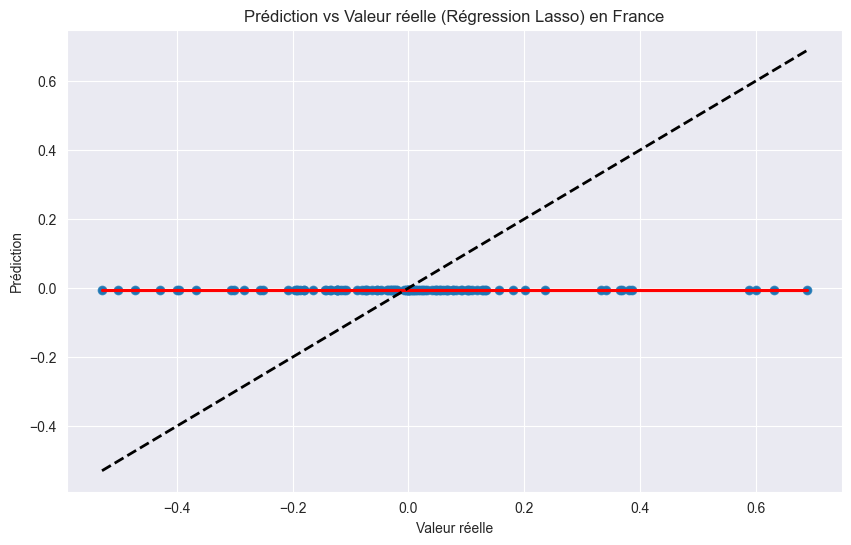

In [55]:
# REGRESSION LASSO

# POUR LA FRANCE

# Sélection des variables qui nous intéressent
FR_X_RL = data_FR.drop('TARGET', axis=1)
FR_Y_RL = data_FR['TARGET']

"""
# Création des poids basés sur les corrélations avec la variable cible
correlation_with_target = correlation_metrics_2['TARGET'].abs()
variable_weights = correlation_with_target[selected_variables]
variable_weights /= variable_weights.sum()

# Appliquer les poids aux variables
X_weighted = X * variable_weights
"""

# Répétition du processus avec différentes valeurs de random_state pour les clusters=
scores_R2 = []
scores_SPR = []
random_state_values_done = []

for random_state_train_test in range(20):

    # Séparation des données train/test avec un unique random_state
    X_train, X_test, Y_train, Y_test = train_test_split(FR_X_RL, FR_Y_RL, test_size=0.2, random_state=random_state_train_test)

    regression_model = Lasso(alpha=0.1)
    regression_model.fit(X_train, Y_train)

    Y_pred = regression_model.predict(X_test)
    accuracy = regression_model.score(X_test, Y_test)

    # Calculer la corrélation de Spearman entre les prédictions et les vraies valeurs de la variable cible
    spearman_corr, _ = spearmanr(Y_pred, Y_test)



    scores_R2.append(accuracy)
    scores_SPR.append(spearman_corr)
    random_state_values_done.append(random_state_train_test)

# Calcul de la moyenne des scores
mean_score_R2 = np.mean(scores_R2)

# Affichage des résultats
best_index = np.argmax(scores_R2)
best_test_random_state = random_state_values_done[best_index]

# Afficher la corrélation de Spearman
print('La corrélation de Spearman moyenne est : {:.3f}'.format(np.mean(scores_SPR)))
print("Moyenne des scores R2 obtenus : {:.2f}%".format(mean_score_R2 * 100))
print("Meilleur score R2 obtenu : {:.2f}%".format(max(scores_R2) * 100))


X_train, X_test, Y_train, Y_test = train_test_split(FR_X_RL, FR_Y_RL, test_size=0.2, random_state=best_test_random_state)

regression_model = Lasso(alpha=0.1)
regression_model.fit(X_train, Y_train)

Y_pred = regression_model.predict(X_test)
accuracy = regression_model.score(X_test, Y_test)
mse = mean_squared_error(Y_test, Y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(Y_test, Y_pred)

# Affichage des résultats
print("\n\nScore du modèle de régression : {:.2f}%".format(accuracy * 100))
print("MSE : {:.2f}".format(mse))
print("RMSE : {:.2f}".format(rmse))
print("R^2 : {:.2f}".format(r2))

plt.figure(figsize=(10, 6))
sns.scatterplot(x=Y_test.values.flatten(), y=Y_pred.flatten())
sns.regplot(x=Y_test.values.flatten(), y=Y_pred.flatten()   , line_kws={"color": "red"})
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'k--', lw=2)
plt.xlabel('Valeur réelle')
plt.ylabel('Prédiction')
plt.title('Prédiction vs Valeur réelle (Régression Lasso) en France')
plt.show()

La corrélation de Spearman moyenne est : 0.113
Moyenne des scores R2 obtenus : -0.50%
Meilleur score R2 obtenu : 3.67%


Score du modèle de régression : 13.77%
MSE : 0.23
RMSE : 0.47
R^2 : 0.14


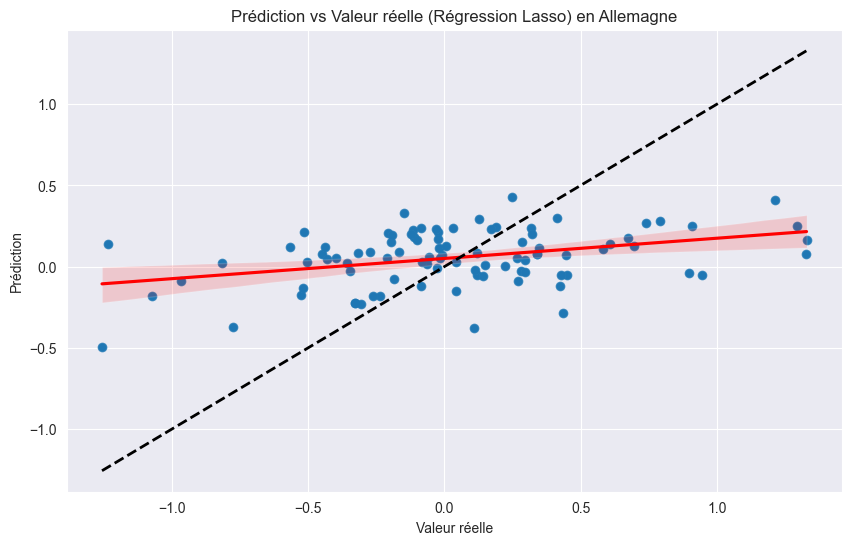

In [56]:
# REGRESSION LASSO

# POUR L'ALLEMAGNE

# Sélection des variables qui nous intéressent
DE_X_RL = data_DE.drop('TARGET', axis=1)
DE_Y_RL = data_DE['TARGET']

"""
# Création des poids basés sur les corrélations avec la variable cible
correlation_with_target = correlation_metrics_2['TARGET'].abs()
variable_weights = correlation_with_target[selected_variables]
variable_weights /= variable_weights.sum()

# Appliquer les poids aux variables
X_weighted = X * variable_weights
"""

# Répétition du processus avec différentes valeurs de random_state pour les clusters=
scores_R2 = []
scores_SPR = []
random_state_values_done = []

for random_state_train_test in range(20):

    # Séparation des données train/test avec un unique random_state
    X_train, X_test, Y_train, Y_test = train_test_split(FR_X_RL, FR_Y_RL, test_size=0.2, random_state=random_state_train_test)

    regression_model = Lasso(alpha=0.001)
    regression_model.fit(X_train, Y_train)

    Y_pred = regression_model.predict(X_test)
    accuracy = regression_model.score(X_test, Y_test)

    # Calculer la corrélation de Spearman entre les prédictions et les vraies valeurs de la variable cible
    spearman_corr, _ = spearmanr(Y_pred, Y_test)



    scores_R2.append(accuracy)
    scores_SPR.append(spearman_corr)
    random_state_values_done.append(random_state_train_test)

# Calcul de la moyenne des scores
mean_score_R2 = np.mean(scores_R2)

# Affichage des résultats
best_index = np.argmax(scores_R2)
best_test_random_state = random_state_values_done[best_index]

# Afficher la corrélation de Spearman
print('La corrélation de Spearman moyenne est : {:.3f}'.format(np.mean(scores_SPR)))
print("Moyenne des scores R2 obtenus : {:.2f}%".format(mean_score_R2 * 100))
print("Meilleur score R2 obtenu : {:.2f}%".format(max(scores_R2) * 100))


X_train, X_test, Y_train, Y_test = train_test_split(DE_X_RL, DE_Y_RL, test_size=0.2, random_state=best_test_random_state)

regression_model = Lasso(alpha=0.001)
regression_model.fit(X_train, Y_train)

Y_pred = regression_model.predict(X_test)
accuracy = regression_model.score(X_test, Y_test)
mse = mean_squared_error(Y_test, Y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(Y_test, Y_pred)

# Affichage des résultats
print("\n\nScore du modèle de régression : {:.2f}%".format(accuracy * 100))
print("MSE : {:.2f}".format(mse))
print("RMSE : {:.2f}".format(rmse))
print("R^2 : {:.2f}".format(r2))

plt.figure(figsize=(10, 6))
sns.scatterplot(x=Y_test.values.flatten(), y=Y_pred.flatten())
sns.regplot(x=Y_test.values.flatten(), y=Y_pred.flatten()   , line_kws={"color": "red"})
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'k--', lw=2)
plt.xlabel('Valeur réelle')
plt.ylabel('Prédiction')
plt.title('Prédiction vs Valeur réelle (Régression Lasso) en Allemagne')
plt.show()

Lasso et Ridge sont deux techniques de régularisation pour la régression linéaire, qui permettent de réduire la complexité d'un modèle pour éviter le sur-apprentissage.

La principale différence entre Lasso et Ridge est que Lasso utilise une pénalité L1 (norme L1), qui a pour effet de pousser certains coefficients du modèle à zéro, ce qui permet de sélectionner les variables les plus importantes et de faire de la sélection de variable automatique. En revanche, Ridge utilise une pénalité L2 (norme L2), qui ne force pas les coefficients à zéro mais les diminue pour éviter le sur-apprentissage.

Ainsi, si l'on souhaite sélectionner les variables les plus importantes et faire de la sélection de variables automatique, Lasso est généralement plus adapté. Si l'on souhaite simplement réduire la complexité du modèle pour éviter le sur-apprentissage, Ridge peut être une meilleure option.

KNN (k-Nearest Neighbors) est un algorithme d'apprentissage automatique qui peut être utilisé pour la classification et la régression.
Pour la classification, l'algorithme cherche les k points les plus proches d'un point d'entrée non étiqueté (par exemple, un point dans un espace à n dimensions) à partir d'un ensemble de données étiqueté. Les étiquettes de ces k points les plus proches sont utilisées pour déterminer l'étiquette du point d'entrée. Pour la régression, l'algorithme est similaire, mais au lieu de trouver les étiquettes, il prend la moyenne des k valeurs de sortie des points les plus proches.


Effectuons maintenant une régression KNN :

Valeur pour K = 8 : 
MSE train = 0.0 
RMSE train = 0.0 
MSE Test = 0.20751249149666398 
RMSE Test = 0.4555353899497425
[-0.01716117  0.02961092 -0.02488522]
Valeur de R2: -0.014900309696411096


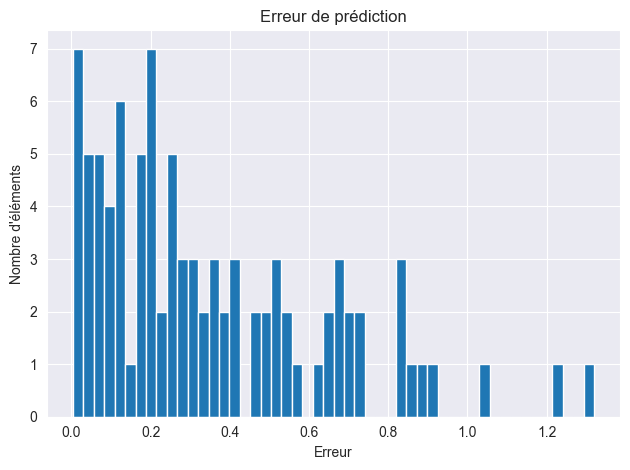

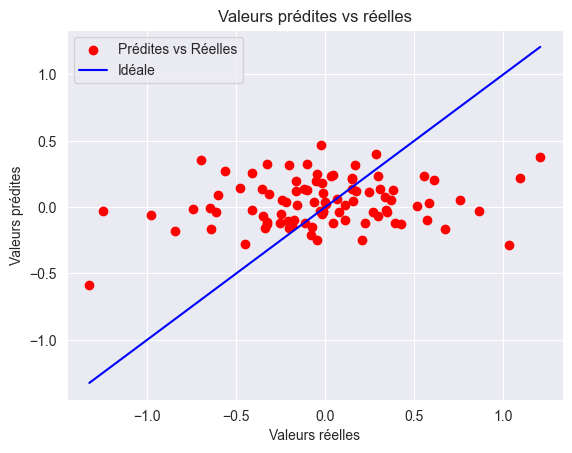

RMSE avec K = 1 : 0.6136562363219182
RMSE avec K = 2 : 0.5544333409087653
RMSE avec K = 3 : 0.5008445500715502
RMSE avec K = 4 : 0.483289212229587
RMSE avec K = 5 : 0.4667892038585418
RMSE avec K = 6 : 0.46171506253113437
RMSE avec K = 7 : 0.46624836760619687
RMSE avec K = 8 : 0.4555353899497425
RMSE avec K = 9 : 0.45335596462634575
RMSE avec K = 10 : 0.4500827422206463
RMSE avec K = 11 : 0.44786225187260537
RMSE avec K = 12 : 0.4443114878131029
RMSE avec K = 13 : 0.4469932997491735
RMSE avec K = 14 : 0.44955447126172854
RMSE avec K = 15 : 0.4441424791608096
RMSE avec K = 16 : 0.44187492992154676
RMSE avec K = 17 : 0.44420497964684713
RMSE avec K = 18 : 0.4441419487228558
RMSE avec K = 19 : 0.4419531923520482
RMSE avec K = 20 : 0.44171212724883546
RMSE avec K = 21 : 0.4402373454946248
RMSE avec K = 22 : 0.4410107803870442
RMSE avec K = 23 : 0.4396627192680568
RMSE avec K = 24 : 0.4371395000095595
RMSE avec K = 25 : 0.43622699846925755
RMSE avec K = 26 : 0.4383174681009013
RMSE avec K =

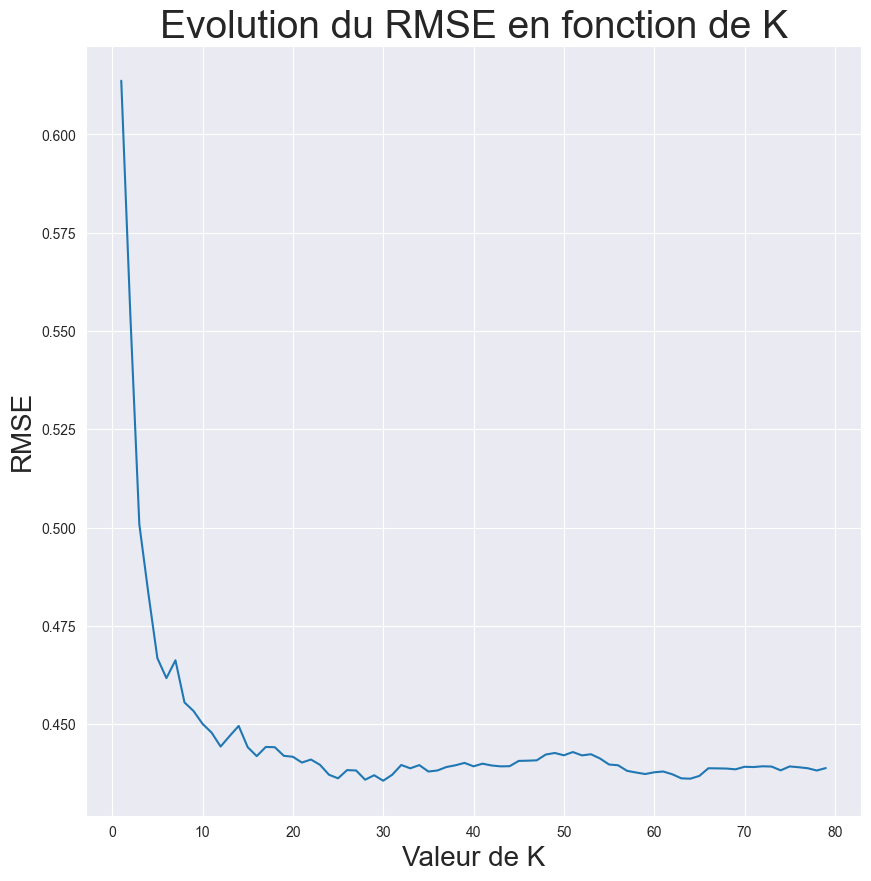

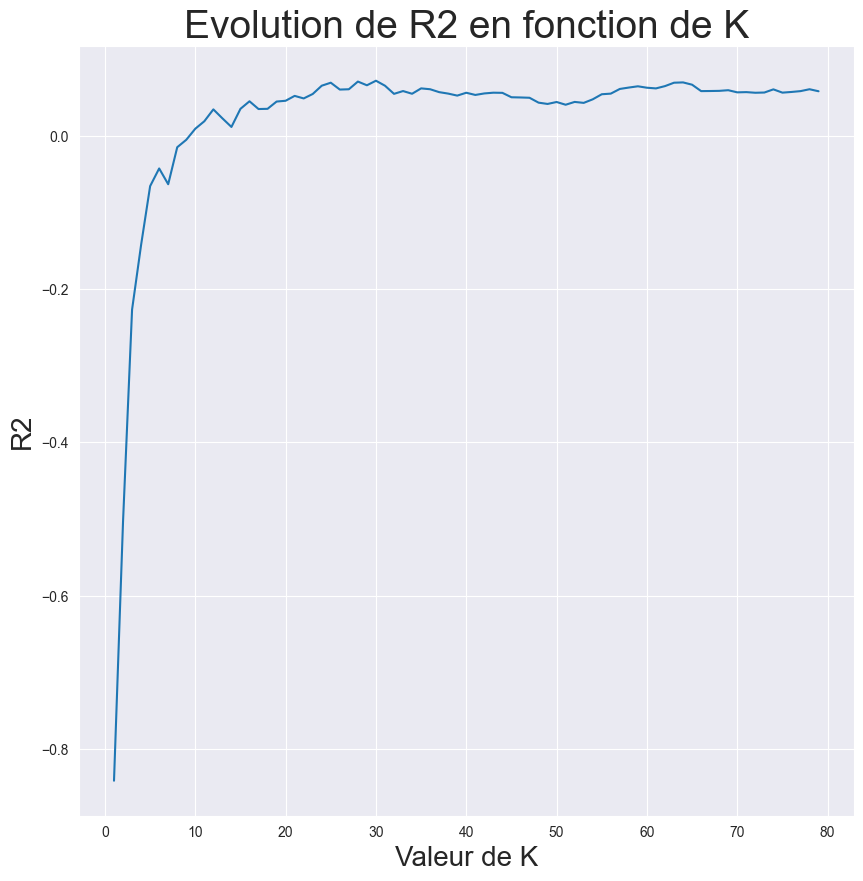



Spearman avec K = 1 : 0.0919799781281676
Spearman avec K = 2 : 0.006473190203905491
Spearman avec K = 3 : 0.07766287008923754
Spearman avec K = 4 : 0.11247938597167208
Spearman avec K = 5 : 0.14708012884730978
Spearman avec K = 6 : 0.12274401615215078
Spearman avec K = 7 : 0.09088667293435877
Spearman avec K = 8 : 0.12883189741534762
Spearman avec K = 9 : 0.1428725552147712
Spearman avec K = 10 : 0.17486860965121834
Spearman avec K = 11 : 0.15228950572569083
Spearman avec K = 12 : 0.18562643527580414
Spearman avec K = 13 : 0.1538307414885255
Spearman avec K = 14 : 0.1590247060092782
Spearman avec K = 15 : 0.18084860441101672
Spearman avec K = 16 : 0.16184516745526564
Spearman avec K = 17 : 0.1389115793042862
Spearman avec K = 18 : 0.12007767828244686
Spearman avec K = 19 : 0.14837476688809087
Spearman avec K = 20 : 0.15332213368679007
Spearman avec K = 21 : 0.1624000123298861
Spearman avec K = 22 : 0.15591140976835227
Spearman avec K = 23 : 0.16979794399149237
Spearman avec K = 24 : 

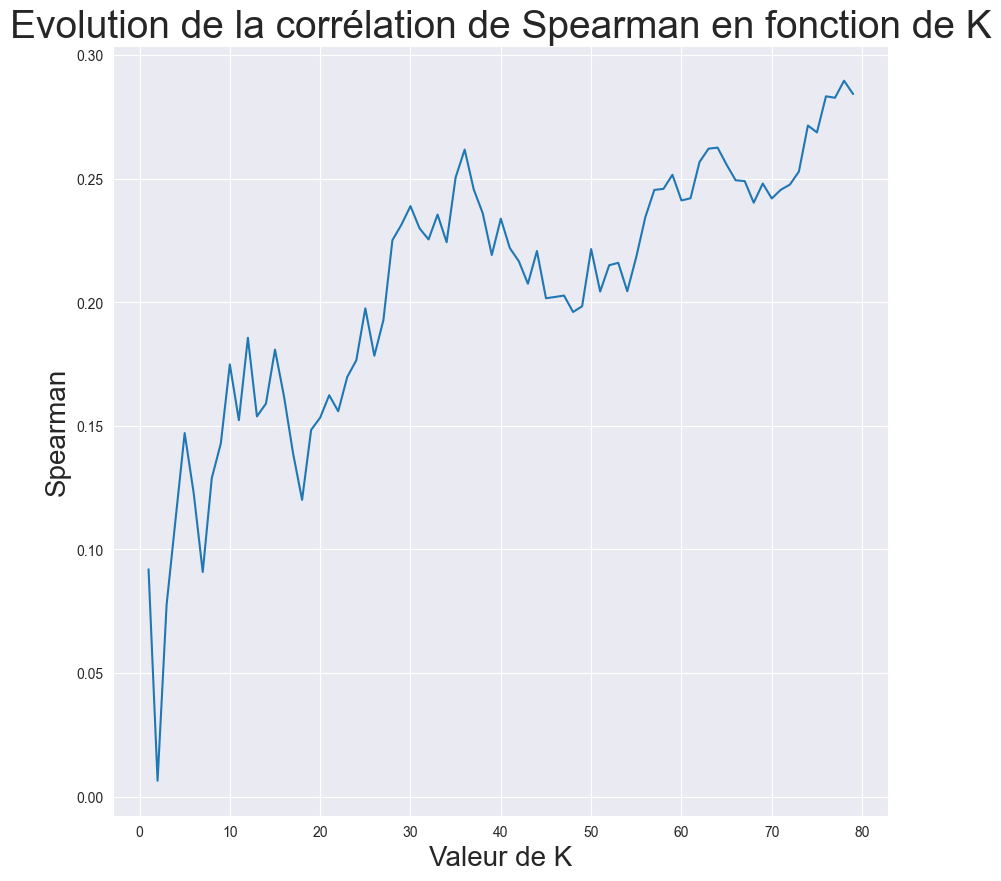



Train RMSE: 0.4452475446270927
RMSE test: 0.4552594665328333
R2 Value: -0.013671206723549822


RMSE: 0.4517448001728952
R2 Value: 0.0019197431390890474
Meilleur K : 8 
Meilleur poids : uniform 
Meilleur algorithme : auto 
Meilleur p : 2




In [57]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.ensemble import BaggingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV


# Régression KNN

# pour l'Allemagne


# Sélection des variables qui nous intéressent
DE_X_KNN = data_DE.drop('TARGET', axis=1)
DE_Y_KNN = data_DE['TARGET']

X_train, X_test, y_train, y_test = train_test_split(DE_X_KNN, DE_Y_KNN, test_size=0.2, random_state=40)

K=8
knn_model = KNeighborsRegressor(n_neighbors=K, weights='distance', algorithm='auto', p=2, metric_params=None, n_jobs=None)
knn_model.fit(X_train, y_train)


train_preds = knn_model.predict(X_train)
mset = mean_squared_error(y_train, train_preds)
rmset = sqrt(mset)

test_preds = knn_model.predict(X_test)
msep = mean_squared_error(y_test, test_preds)
rmsep = sqrt(msep)


print("Valeur pour K =", K, ": \nMSE train =",mset,"\nRMSE train =",rmset,"\nMSE Test =",msep,"\nRMSE Test =",rmsep)


print(cross_val_score(KNeighborsRegressor(n_neighbors=K, weights='distance', algorithm='auto', p=2, metric_params=None, n_jobs=None), X_test, y_test, cv=3, scoring='r2'))
print("Valeur de R2:", r2_score(y_test,test_preds))

err_hist = np.abs(y_test - test_preds)
plt.hist(err_hist, bins=50)
plt.title('Erreur de prédiction')
plt.xlabel('Erreur')
plt.ylabel("Nombre d'éléments")
plt.tight_layout()
plt.show()

# Tracer les valeurs réelles
plt.scatter(y_test, test_preds, color='r', label='Prédites vs Réelles')
# Tracer la droite d'identité (y = x)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='b', label='Idéale')
# Ajouter les légendes et les titres
plt.legend()
plt.title('Valeurs prédites vs réelles')
plt.xlabel('Valeurs réelles')
plt.ylabel('Valeurs prédites')
# Afficher le graphe
plt.show()

fig1,ax=plt.subplots(figsize=(10,10))
k_list=np.arange(1,80,1)
knn_dict={} # To store k and rmse pairs
for i in k_list:
    #Knn Model Creation
    knn=knn_model = KNeighborsRegressor(n_neighbors=int(i), weights='distance', algorithm='auto', p=2, metric_params=None, n_jobs=None)
    model_knn=knn.fit(X_train,y_train)
    y_knn_pred=model_knn.predict(X_test)
    #Storing RMSE
    rmse=sqrt(mean_squared_error(y_test,y_knn_pred))
    knn_dict[i]=rmse
    print("RMSE avec K =", str(i), ":", knn_dict[i])
#Plotting the results
ax.set_xlabel('Valeur de K', fontsize=20)
ax.set_ylabel('RMSE' ,fontsize=20)
ax.set_title('Evolution du RMSE en fonction de K' ,fontsize=28)
ax.plot(knn_dict.keys(),knn_dict.values())
print("\n")

fig,ax=plt.subplots(figsize=(10,10))
k_list=np.arange(1,80,1)
knn_dict={} # To store k and R2 pairs
for i in k_list:
    #Knn Model Creation
    knn=knn_model = KNeighborsRegressor(n_neighbors=int(i), weights='distance', algorithm='auto', p=2, metric_params=None, n_jobs=None)
    model_knn=knn.fit(X_train,y_train)
    y_knn_pred=model_knn.predict(X_test)
    #Storing R2
    r2=r2_score(y_test,y_knn_pred)
    knn_dict[i]=r2
    print("R2 avec K =", str(i), ":", knn_dict[i])
#Plotting the results
ax.set_xlabel('Valeur de K', fontsize=20)
ax.set_ylabel('R2' ,fontsize=20)
ax.set_title('Evolution de R2 en fonction de K' ,fontsize=28)
ax.plot(knn_dict.keys(),knn_dict.values())
plt.show()
print("\n")

fig,ax=plt.subplots(figsize=(10,10))
k_list=np.arange(1,80,1)
knn_dict={} # To store k and R2 pairs
for i in k_list:
    #Knn Model Creation
    knn=knn_model = KNeighborsRegressor(n_neighbors=int(i), weights='distance', algorithm='auto', p=2, metric_params=None, n_jobs=None)
    model_knn=knn.fit(X_train,y_train)
    y_knn_pred=model_knn.predict(X_test)
    #Storing Spearman
    # Calculer la corrélation de Spearman entre les prédictions et les vraies valeurs de la variable cible
    spearman_corr, _ = spearmanr(y_knn_pred, y_test)
    knn_dict[i]=spearman_corr
    print("Spearman avec K =", str(i), ":", knn_dict[i])
#Plotting the results
ax.set_xlabel('Valeur de K', fontsize=20)
ax.set_ylabel('Spearman' ,fontsize=20)
ax.set_title('Evolution de la corrélation de Spearman en fonction de K' ,fontsize=28)
ax.plot(knn_dict.keys(),knn_dict.values())
plt.show()
print("\n")

param = {"n_neighbors": range(1, 10), "weights": ["uniform", "distance"], "algorithm": ["auto", "ball_tree", "kd_tree", "brute"], "p": [1, 2]}
grids = GridSearchCV(KNeighborsRegressor(), param)
grids.fit(X_train, y_train)
train_preds_grid = grids.predict(X_train)
train_mse = mean_squared_error(y_train, train_preds_grid)
train_rmse = sqrt(train_mse)
test_preds_grid = grids.predict(X_test)
test_mse = mean_squared_error(y_test, test_preds_grid)
test_rmse = sqrt(test_mse)
print("Train RMSE:",train_rmse)
print("RMSE test:",test_rmse)
print("R2 Value:", r2_score(y_test,test_preds_grid))

print("\n")


parametre = {"n_neighbors": range(1, 10), "weights": ["uniform", "distance"], "algorithm": ["auto", "ball_tree", "kd_tree", "brute"], "p": [1, 2]}
gridsrch = GridSearchCV(KNeighborsRegressor(), parametre)
gridsrch.fit(X_train, y_train.ravel())  # Utiliser ravel() pour remodeler y_train

best_k = gridsrch.best_params_["n_neighbors"]
best_weights = gridsrch.best_params_["weights"]
best_algo = gridsrch.best_params_["algorithm"]
best_p = gridsrch.best_params_["p"]
bagged_knn = KNeighborsRegressor(n_neighbors=best_k, weights=best_weights, algorithm=best_algo)

bagging_model = BaggingRegressor(bagged_knn, n_estimators=100, random_state=1000)
bagging_model.fit(X_train, y_train.ravel())  # Utiliser ravel() pour remodeler y_train

test_preds_grid_opti = bagging_model.predict(X_test)
test_mse = mean_squared_error(y_test.ravel(), test_preds_grid_opti)  # Utiliser ravel() pour remodeler y_test
test_rmse = sqrt(test_mse)

print("RMSE:", test_rmse)
print("R2 Value:", r2_score(y_test.ravel(), test_preds_grid_opti))  # Utiliser ravel() pour remodeler y_test
print("Meilleur K :", best_k, "\nMeilleur poids :", best_weights, "\nMeilleur algorithme :", best_algo,"\nMeilleur p :",best_p)
print("\n")

Valeur pour K = 8 : 
MSE train = 0.0 
RMSE train = 0.0 
MSE Test = 0.06494448423008024 
RMSE Test = 0.2548420770400372
[ 0.00355916 -0.06397869 -0.14052983]
Valeur de R2: -0.05556849583042056


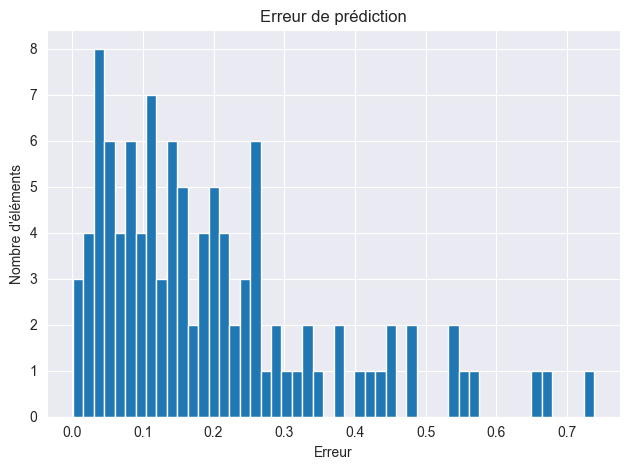

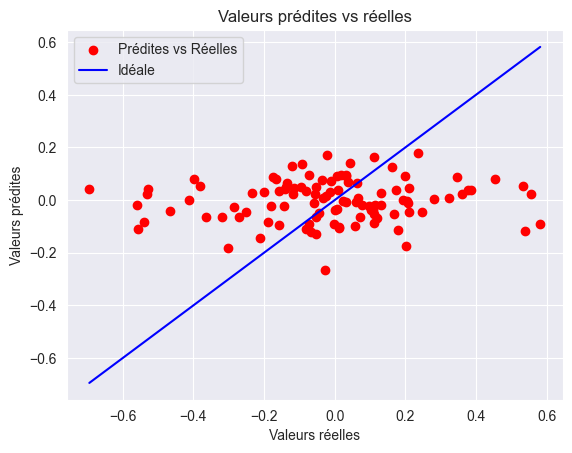

RMSE avec K = 1 : 0.34820287953047574
RMSE avec K = 2 : 0.2967107319921598
RMSE avec K = 3 : 0.27772758349845394
RMSE avec K = 4 : 0.27124961251954033
RMSE avec K = 5 : 0.26435783228060417
RMSE avec K = 6 : 0.25378496719355514
RMSE avec K = 7 : 0.25730404614860736
RMSE avec K = 8 : 0.2548420770400372
RMSE avec K = 9 : 0.2552476628499149
RMSE avec K = 10 : 0.2546325769016043
RMSE avec K = 11 : 0.25425756104223945
RMSE avec K = 12 : 0.2537606580667285
RMSE avec K = 13 : 0.25228756824585674
RMSE avec K = 14 : 0.250651738914401
RMSE avec K = 15 : 0.2520371574149758
RMSE avec K = 16 : 0.2511341424983788
RMSE avec K = 17 : 0.2512010960269827
RMSE avec K = 18 : 0.25187790729796783
RMSE avec K = 19 : 0.25085514204445825
RMSE avec K = 20 : 0.2500198327801426
RMSE avec K = 21 : 0.24991636693323074
RMSE avec K = 22 : 0.24886260757639012
RMSE avec K = 23 : 0.2492806598400127
RMSE avec K = 24 : 0.24785332374992847
RMSE avec K = 25 : 0.24890306235427373
RMSE avec K = 26 : 0.2484420971027073
RMSE ave

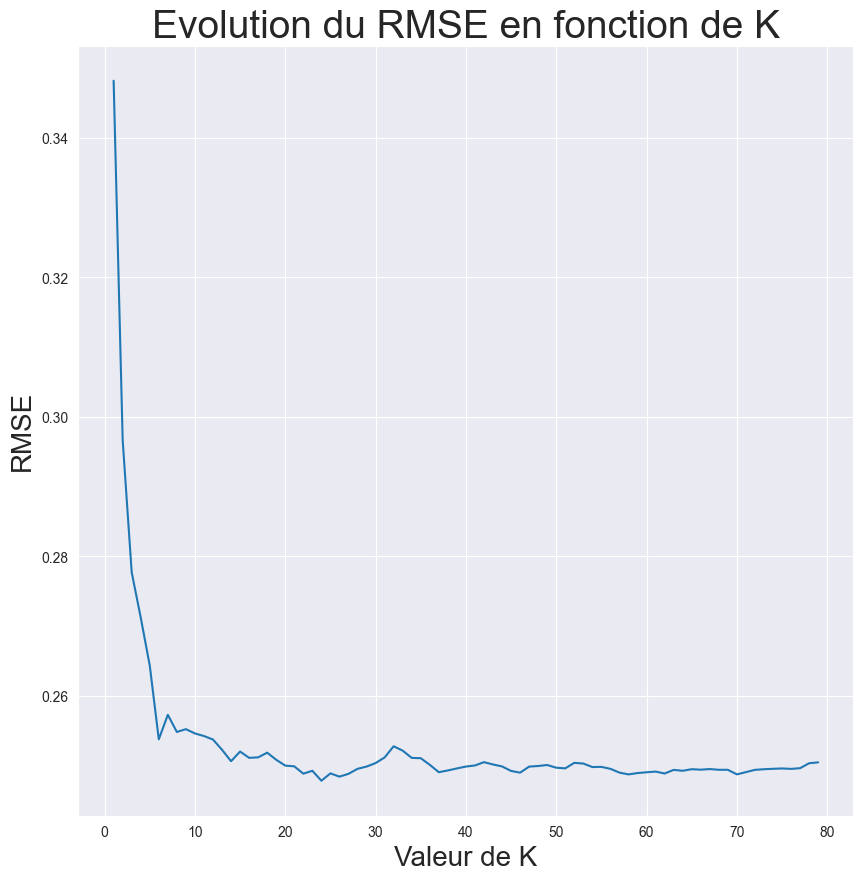

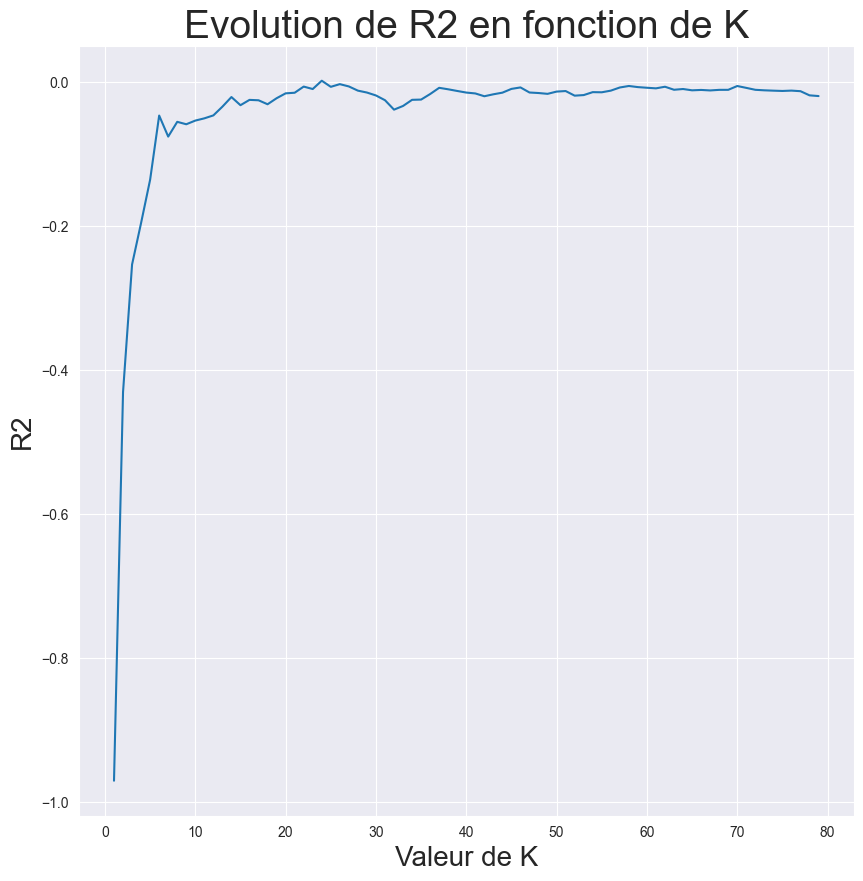



Spearman avec K = 1 : -0.032458060804209155
Spearman avec K = 2 : -0.06010025946545079
Spearman avec K = 3 : -0.06396956948887825
Spearman avec K = 4 : -0.06161170869335215
Spearman avec K = 5 : -0.04018943496989697
Spearman avec K = 6 : 0.06446330956999269
Spearman avec K = 7 : 0.03701539159130413
Spearman avec K = 8 : 0.06217598307176865
Spearman avec K = 9 : 0.03997783207799078
Spearman avec K = 10 : 0.04943950424465325
Spearman avec K = 11 : 0.043706073506814117
Spearman avec K = 12 : 0.04452225608988085
Spearman avec K = 13 : 0.06340529511046174
Spearman avec K = 14 : 0.0789832984860317
Spearman avec K = 15 : 0.0718391818021513
Spearman avec K = 16 : 0.057772627654482704
Spearman avec K = 17 : 0.05511247701337633
Spearman avec K = 18 : 0.057530795778018486
Spearman avec K = 19 : 0.08675214751744464
Spearman avec K = 20 : 0.10567549185076959
Spearman avec K = 21 : 0.09915610751442175
Spearman avec K = 22 : 0.09476282842532181
Spearman avec K = 23 : 0.08249993702294885
Spearman av

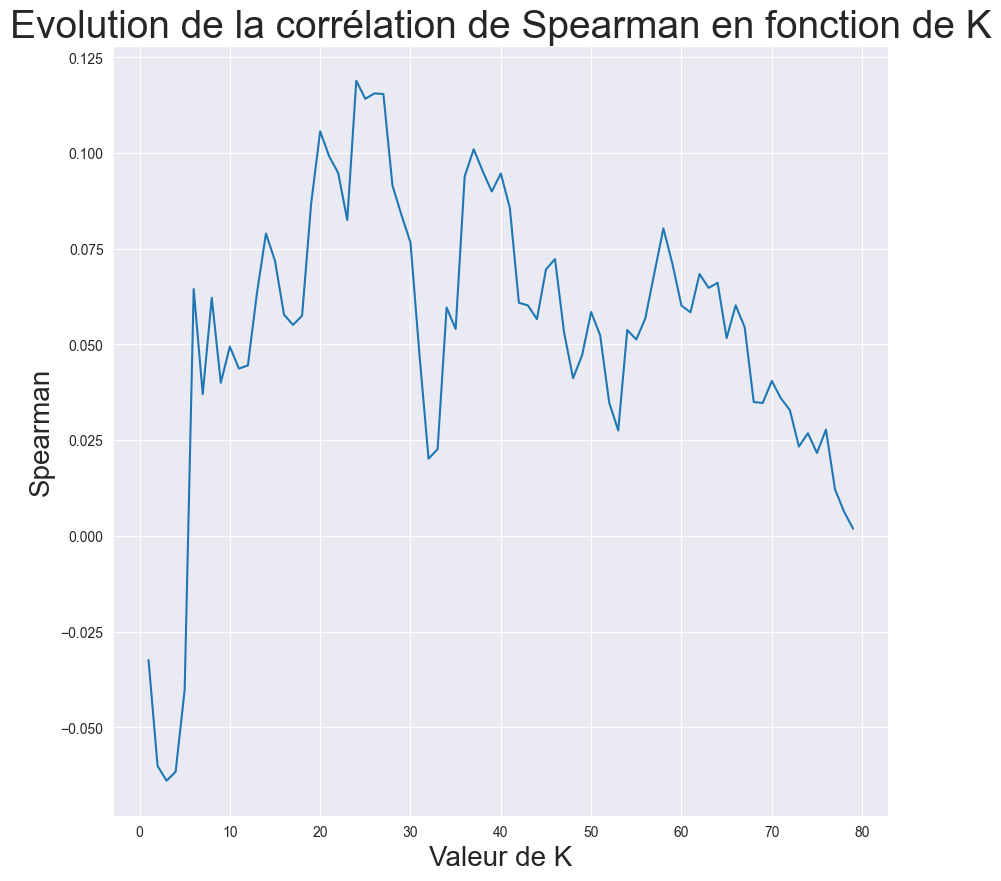



Train RMSE: 0.22658801949283272
RMSE test: 0.25556765627124806
R2 Value: -0.061587822851325136


RMSE: 0.2535712385087529
R2 Value: -0.04506699337704689
Meilleur K : 9 
Meilleur poids : uniform 
Meilleur algorithme : auto 
Meilleur p : 1




In [58]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.ensemble import BaggingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV


# Régression KNN

# POUR LA FRANCE

# Sélection des variables qui nous intéressent
FR_X_KNN = data_FR.drop('TARGET', axis=1)
FR_Y_KNN = data_FR['TARGET']

X_train, X_test, y_train, y_test = train_test_split(FR_X_KNN, FR_Y_KNN, test_size=0.2, random_state=40)

K=8
knn_model = KNeighborsRegressor(n_neighbors=K, weights='distance', algorithm='auto', p=2, metric_params=None, n_jobs=None)
knn_model.fit(X_train, y_train)


train_preds = knn_model.predict(X_train)
mset = mean_squared_error(y_train, train_preds)
rmset = sqrt(mset)

test_preds = knn_model.predict(X_test)
msep = mean_squared_error(y_test, test_preds)
rmsep = sqrt(msep)


print("Valeur pour K =", K, ": \nMSE train =",mset,"\nRMSE train =",rmset,"\nMSE Test =",msep,"\nRMSE Test =",rmsep)


print(cross_val_score(KNeighborsRegressor(n_neighbors=K, weights='distance', algorithm='auto', p=2, metric_params=None, n_jobs=None), X_test, y_test, cv=3, scoring='r2'))
print("Valeur de R2:", r2_score(y_test,test_preds))

err_hist = np.abs(y_test - test_preds)
plt.hist(err_hist, bins=50)
plt.title('Erreur de prédiction')
plt.xlabel('Erreur')
plt.ylabel("Nombre d'éléments")
plt.tight_layout()
plt.show()

# Tracer les valeurs réelles
plt.scatter(y_test, test_preds, color='r', label='Prédites vs Réelles')
# Tracer la droite d'identité (y = x)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='b', label='Idéale')
# Ajouter les légendes et les titres
plt.legend()
plt.title('Valeurs prédites vs réelles')
plt.xlabel('Valeurs réelles')
plt.ylabel('Valeurs prédites')
# Afficher le graphe
plt.show()

fig1,ax=plt.subplots(figsize=(10,10))
k_list=np.arange(1,80,1)
knn_dict={} # To store k and rmse pairs
for i in k_list:
    #Knn Model Creation
    knn=knn_model = KNeighborsRegressor(n_neighbors=int(i), weights='distance', algorithm='auto', p=2, metric_params=None, n_jobs=None)
    model_knn=knn.fit(X_train,y_train)
    y_knn_pred=model_knn.predict(X_test)
    #Storing RMSE
    rmse=sqrt(mean_squared_error(y_test,y_knn_pred))
    knn_dict[i]=rmse
    print("RMSE avec K =", str(i), ":", knn_dict[i])
#Plotting the results
ax.set_xlabel('Valeur de K', fontsize=20)
ax.set_ylabel('RMSE' ,fontsize=20)
ax.set_title('Evolution du RMSE en fonction de K' ,fontsize=28)
ax.plot(knn_dict.keys(),knn_dict.values())
print("\n")

fig,ax=plt.subplots(figsize=(10,10))
k_list=np.arange(1,80,1)
knn_dict={} # To store k and R2 pairs
for i in k_list:
    #Knn Model Creation
    knn=knn_model = KNeighborsRegressor(n_neighbors=int(i), weights='distance', algorithm='auto', p=2, metric_params=None, n_jobs=None)
    model_knn=knn.fit(X_train,y_train)
    y_knn_pred=model_knn.predict(X_test)
    #Storing R2
    r2=r2_score(y_test,y_knn_pred)
    knn_dict[i]=r2
    print("R2 avec K =", str(i), ":", knn_dict[i])
#Plotting the results
ax.set_xlabel('Valeur de K', fontsize=20)
ax.set_ylabel('R2' ,fontsize=20)
ax.set_title('Evolution de R2 en fonction de K' ,fontsize=28)
ax.plot(knn_dict.keys(),knn_dict.values())
plt.show()
print("\n")


fig,ax=plt.subplots(figsize=(10,10))
k_list=np.arange(1,80,1)
knn_dict={} # To store k and R2 pairs
for i in k_list:
    #Knn Model Creation
    knn=knn_model = KNeighborsRegressor(n_neighbors=int(i), weights='distance', algorithm='auto', p=2, metric_params=None, n_jobs=None)
    model_knn=knn.fit(X_train,y_train)
    y_knn_pred=model_knn.predict(X_test)
    #Storing Spearman
    # Calculer la corrélation de Spearman entre les prédictions et les vraies valeurs de la variable cible
    spearman_corr, _ = spearmanr(y_knn_pred, y_test)
    knn_dict[i]=spearman_corr
    print("Spearman avec K =", str(i), ":", knn_dict[i])
#Plotting the results
ax.set_xlabel('Valeur de K', fontsize=20)
ax.set_ylabel('Spearman' ,fontsize=20)
ax.set_title('Evolution de la corrélation de Spearman en fonction de K' ,fontsize=28)
ax.plot(knn_dict.keys(),knn_dict.values())
plt.show()
print("\n")


param = {"n_neighbors": range(1, 10), "weights": ["uniform", "distance"], "algorithm": ["auto", "ball_tree", "kd_tree", "brute"], "p": [1, 2]}
grids = GridSearchCV(KNeighborsRegressor(), param)
grids.fit(X_train, y_train)
train_preds_grid = grids.predict(X_train)
train_mse = mean_squared_error(y_train, train_preds_grid)
train_rmse = sqrt(train_mse)
test_preds_grid = grids.predict(X_test)
test_mse = mean_squared_error(y_test, test_preds_grid)
test_rmse = sqrt(test_mse)
print("Train RMSE:",train_rmse)
print("RMSE test:",test_rmse)
print("R2 Value:", r2_score(y_test,test_preds_grid))

print("\n")


parametre = {"n_neighbors": range(1, 10), "weights": ["uniform", "distance"], "algorithm": ["auto", "ball_tree", "kd_tree", "brute"], "p": [1, 2]}
gridsrch = GridSearchCV(KNeighborsRegressor(), parametre)
gridsrch.fit(X_train, y_train.ravel())  # Utiliser ravel() pour remodeler y_train

best_k = gridsrch.best_params_["n_neighbors"]
best_weights = gridsrch.best_params_["weights"]
best_algo = gridsrch.best_params_["algorithm"]
best_p = gridsrch.best_params_["p"]
bagged_knn = KNeighborsRegressor(n_neighbors=best_k, weights=best_weights, algorithm=best_algo)

bagging_model = BaggingRegressor(bagged_knn, n_estimators=100, random_state=1000)
bagging_model.fit(X_train, y_train.ravel())  # Utiliser ravel() pour remodeler y_train

test_preds_grid_opti = bagging_model.predict(X_test)
test_mse = mean_squared_error(y_test.ravel(), test_preds_grid_opti)  # Utiliser ravel() pour remodeler y_test
test_rmse = sqrt(test_mse)

print("RMSE:", test_rmse)
print("R2 Value:", r2_score(y_test.ravel(), test_preds_grid_opti))  # Utiliser ravel() pour remodeler y_test
print("Meilleur K :", best_k, "\nMeilleur poids :", best_weights, "\nMeilleur algorithme :", best_algo,"\nMeilleur p :",best_p)
print("\n")

Un arbre de décision de régression est un modèle qui permet de prédire une valeur cible continue en utilisant une séquence de décisions basées sur les caractéristiques des données d'entrée. Il est construit en divisant récursivement les données en sous-ensembles homogènes en termes de valeurs de la variable cible, en maximisant la réduction d'erreur à chaque étape. L'arbre résultant peut être utilisé pour prédire la valeur cible pour de nouvelles observations en suivant le chemin de l'arbre en fonction de leurs caractéristiques.

La corrélation de Spearman moyenne est : 0.056
Moyenne des scores R2 obtenus : -100.66%
Meilleur score R2 obtenu : -39.39%
Score du modèle de régression : -51.73%
MSE : 0.11
RMSE : 0.33
R^2 : -0.52


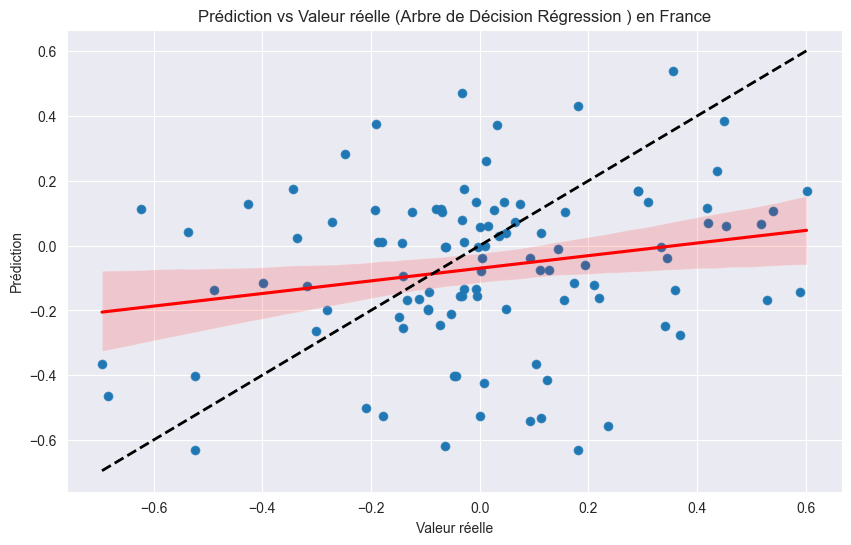

In [59]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score


# ARBRE DE DECISION DE REGRESSION

# POUR LA FRANCE

# Sélection des variables qui nous intéressent
FR_X_RT = data_FR.drop('TARGET', axis=1)
FR_Y_RT = data_FR['TARGET']

"""
# Création des poids basés sur les corrélations avec la variable cible
correlation_with_target = correlation_metrics_2['TARGET'].abs()
variable_weights = correlation_with_target[selected_variables]
variable_weights /= variable_weights.sum()

# Appliquer les poids aux variables
X_weighted = X * variable_weights
"""

tree_model = DecisionTreeRegressor()

tree_model = DecisionTreeRegressor()

# Répétition du processus avec différentes valeurs de random_state pour les clusters=
scores_R2 = []
scores_SPR = []
random_state_values_done = []

for random_state_train_test in range(20):

    # Séparation des données train/test avec un unique random_state
    X_train, X_test, Y_train, Y_test = train_test_split(FR_X_RT, FR_Y_RT, test_size=0.2, random_state=random_state_train_test)



    tree_model.fit(X_train, Y_train)

    Y_pred = tree_model.predict(X_test)
    accuracy = tree_model.score(X_test, Y_test)

    # Calculer la corrélation de Spearman entre les prédictions et les vraies valeurs de la variable cible
    spearman_corr, _ = spearmanr(Y_test, Y_pred)

    scores_R2.append(accuracy)
    scores_SPR.append(spearman_corr)
    random_state_values_done.append(random_state_train_test)

# Calcul de la moyenne des scores
mean_score_R2 = np.mean(scores_R2)

# Affichage des résultats
best_index = np.argmax(scores_R2)
best_test_random_state = random_state_values_done[best_index]

# Afficher la corrélation de Spearman
print('La corrélation de Spearman moyenne est : {:.3f}'.format(np.mean(scores_SPR)))
print("Moyenne des scores R2 obtenus : {:.2f}%".format(mean_score_R2 * 100))
print("Meilleur score R2 obtenu : {:.2f}%".format(max(scores_R2) * 100))


X_train, X_test, Y_train, Y_test = train_test_split(FR_X_RT, FR_Y_RT, test_size=0.2, random_state=best_test_random_state)

# Entraînez le modèle sur les données d'apprentissage
tree_model.fit(X_train, Y_train)

# Faites des prédictions sur les données de test
Y_pred = tree_model.predict(X_test)

accuracy = tree_model.score(X_test, Y_test)

mse = mean_squared_error(Y_test, Y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(Y_test, Y_pred)

# Affichage des résultats
print("Score du modèle de régression : {:.2f}%".format(accuracy * 100))
print("MSE : {:.2f}".format(mse))
print("RMSE : {:.2f}".format(rmse))
print("R^2 : {:.2f}".format(r2))

plt.figure(figsize=(10, 6))
sns.scatterplot(x=Y_test.values.flatten(), y=Y_pred.flatten())
sns.regplot(x=Y_test.values.flatten(), y=Y_pred.flatten()   , line_kws={"color": "red"})
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'k--', lw=2)
plt.xlabel('Valeur réelle')
plt.ylabel('Prédiction')
plt.title('Prédiction vs Valeur réelle (Arbre de Décision Régression ) en France')
plt.show()


La corrélation de Spearman moyenne est : 0.162
Moyenne des scores R2 obtenus : -75.87%
Meilleur score R2 obtenu : -20.48%
Score du modèle de régression : -9.35%
MSE : 0.28
RMSE : 0.53
R^2 : -0.09


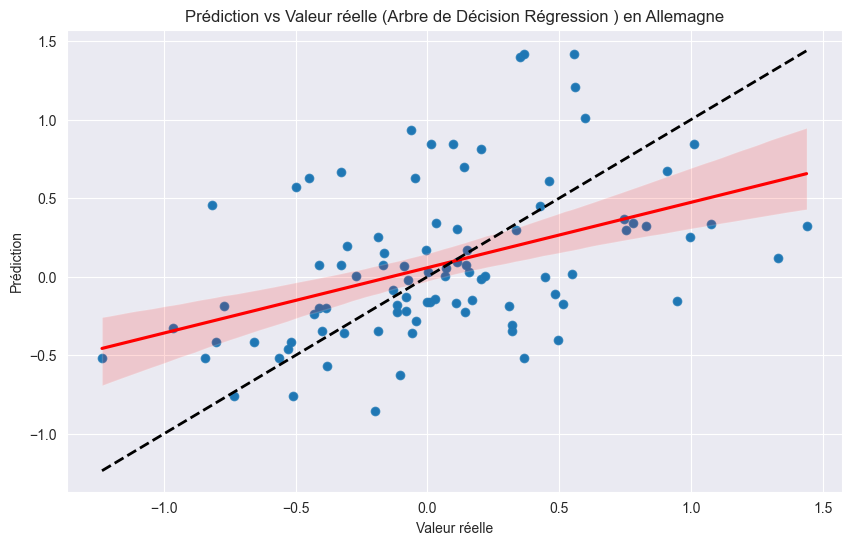

In [60]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score


# ARBRE DE DECISION DE REGRESSION

# POUR L'ALLEMAGNE

# Sélection des variables qui nous intéressent
DE_X_RT = data_DE.drop('TARGET', axis=1)
DE_Y_RT = data_DE['TARGET']

"""
# Création des poids basés sur les corrélations avec la variable cible
correlation_with_target = correlation_metrics_2['TARGET'].abs()
variable_weights = correlation_with_target[selected_variables]
variable_weights /= variable_weights.sum()

# Appliquer les poids aux variables
X_weighted = X * variable_weights
"""

tree_model = DecisionTreeRegressor()

# Répétition du processus avec différentes valeurs de random_state pour les clusters=
scores_R2 = []
scores_SPR = []
random_state_values_done = []

for random_state_train_test in range(20):

    # Séparation des données train/test avec un unique random_state
    X_train, X_test, Y_train, Y_test = train_test_split(DE_X_RT, DE_Y_RT, test_size=0.2, random_state=random_state_train_test)



    tree_model.fit(X_train, Y_train)

    Y_pred = tree_model.predict(X_test)
    accuracy = tree_model.score(X_test, Y_test)

    # Calculer la corrélation de Spearman entre les prédictions et les vraies valeurs de la variable cible
    spearman_corr, _ = spearmanr(Y_test, Y_pred)

    scores_R2.append(accuracy)
    scores_SPR.append(spearman_corr)
    random_state_values_done.append(random_state_train_test)

# Calcul de la moyenne des scores
mean_score_R2 = np.mean(scores_R2)

# Affichage des résultats
best_index = np.argmax(scores_R2)
best_test_random_state = random_state_values_done[best_index]

# Afficher la corrélation de Spearman
print('La corrélation de Spearman moyenne est : {:.3f}'.format(np.mean(scores_SPR)))
print("Moyenne des scores R2 obtenus : {:.2f}%".format(mean_score_R2 * 100))
print("Meilleur score R2 obtenu : {:.2f}%".format(max(scores_R2) * 100))


X_train, X_test, Y_train, Y_test = train_test_split(DE_X_RT, DE_Y_RT, test_size=0.2, random_state=best_test_random_state)

# Entraînez le modèle sur les données d'apprentissage
tree_model.fit(X_train, Y_train)

# Faites des prédictions sur les données de test
Y_pred = tree_model.predict(X_test)

accuracy = tree_model.score(X_test, Y_test)

mse = mean_squared_error(Y_test, Y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(Y_test, Y_pred)

# Affichage des résultats
print("Score du modèle de régression : {:.2f}%".format(accuracy * 100))
print("MSE : {:.2f}".format(mse))
print("RMSE : {:.2f}".format(rmse))
print("R^2 : {:.2f}".format(r2))

plt.figure(figsize=(10, 6))
sns.scatterplot(x=Y_test.values.flatten(), y=Y_pred.flatten())
sns.regplot(x=Y_test.values.flatten(), y=Y_pred.flatten()   , line_kws={"color": "red"})
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'k--', lw=2)
plt.xlabel('Valeur réelle')
plt.ylabel('Prédiction')
plt.title('Prédiction vs Valeur réelle (Arbre de Décision Régression ) en Allemagne')
plt.show()

D) Evaluation des modèles

Spearman est une mesure de corrélation non-paramétrique qui évalue la relation entre deux variables en termes de leur association monotone, c'est-à-dire si les deux variables augmentent ou diminuent ensemble. Plus la valeur de Spearman est proche de 1, plus les variables sont corrélées de manière monotone positive, tandis qu'une valeur proche de -1 indique une corrélation monotone négative. Une valeur de 0 indique l'absence de corrélation monotone entre les deux variables.

R² est une mesure statistique qui indique la proportion de la variance de la variable dépendante (y) qui est expliquée par les variables indépendantes (x) dans un modèle de régression linéaire.

RMSE (Root Mean Square Error) est une mesure de l'erreur quadratique moyenne d'un modèle de régression. Elle mesure la distance entre les valeurs prédites par le modèle et les vraies valeurs cibles en calculant la racine carrée de la moyenne des carrés des différences entre les prédictions et les valeurs réelles. Une valeur de RMSE plus faible indique une meilleure performance du modèle.

Classement des réussites des algorithmes pour la France :

R^2 =
-0.04 pour la régression linéaire
-0.03 régression Ridge
-0.00 régression lasso
-(-0.58) régression arbre de décisions

Spearman =
-0.101 régression Ridge
-0.092 régression linéaire
-0.043 régression arbre de décisions
-nan régression lasso


Classement des réussites des algorithmes pour l'Allemagne :
R^2 =
-0.22 régression linéaire
-0.18 régression Ridge
-0.10 régression lasso
-(-0.06) régression arbre de décisions

Spearman =
-0.312 régression Ridge
-0.304 régression linéaire
-0.170 régression arbre de décisions
-0.092 régression lasso



Train RMSE: 0.4452475446270927
RMSE test: 0.4552594665328333
R2 Value: -0.013671206723549822


Valeur pour K = 8 :
MSE train = 0.0
RMSE train = 0.0
MSE Test = 0.20751249149666398
RMSE Test = 0.4555353899497425
[-0.01716117  0.02961092 -0.02488522]
Valeur de R2: -0.014900309696411096
KNNA

